In [24]:
import polars as pl
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data = pl.read_csv("../data/mitbih_train.csv", has_header=False)
data = data.rename({"column_188": "label"})

data.describe()

shape: (9, 189)
┌────────────┬──────────┬──────────┬──────────┬───┬────────────┬────────────┬───────────┬──────────┐
│ statistic  ┆ column_1 ┆ column_2 ┆ column_3 ┆ … ┆ column_185 ┆ column_186 ┆ column_18 ┆ label    │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---        ┆ ---        ┆ 7         ┆ ---      │
│ str        ┆ f64      ┆ f64      ┆ f64      ┆   ┆ f64        ┆ f64        ┆ ---       ┆ f64      │
│            ┆          ┆          ┆          ┆   ┆            ┆            ┆ f64       ┆          │
╞════════════╪══════════╪══════════╪══════════╪═══╪════════════╪════════════╪═══════════╪══════════╡
│ count      ┆ 87554.0  ┆ 87554.0  ┆ 87554.0  ┆ … ┆ 87554.0    ┆ 87554.0    ┆ 87554.0   ┆ 87554.0  │
│ null_count ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ mean       ┆ 0.89036  ┆ 0.75816  ┆ 0.423972 ┆ … ┆ 0.003221   ┆ 0.002945   ┆ 0.002807  ┆ 0.473376 │
│ std        ┆ 0.240909 ┆ 0.221813 ┆ 0.227305 ┆ … ┆ 0.034789   ┆ 0.032865   ┆ 0.031924  ┆ 1.143184 │
│ min        ┆ 0.0      ┆ 0.0      ┆ 0.0      ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ 25%        ┆ 0.921922 ┆ 0.682482 ┆ 0.250965 ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ 50%        ┆ 0.991342 ┆ 0.826019 ┆ 0.429477 ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ 75%        ┆ 1.0      ┆ 0.910506 ┆ 0.578767 ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ max        ┆ 1.0      ┆ 1.0      ┆ 1.0      ┆ … ┆ 1.0        ┆ 1.0        ┆ 1.0       ┆ 4.0      │
└────────────┴──────────┴──────────┴──────────┴───┴────────────┴────────────┴───────────┴──────────┘

In [26]:
train_data = pl.read_csv("../data/mitbih_train.csv", has_header=False)
train_data = train_data.rename({"column_188": "label"})

test_data = pl.read_csv("../data/mitbih_test.csv", has_header=False)
test_data = test_data.rename({"column_188": "label"})

In [27]:
normal_sample = data.filter(pl.col("label") == 0).sample(1)
atrial_premature_sample = data.filter(pl.col("label") == 1).sample(1)
ventricular_premature_sample = data.filter(pl.col("label") == 2).sample(1)
fusion_sample = data.filter(pl.col("label") == 3).sample(1)
paced_sample = data.filter(pl.col("label") == 4).sample(1)

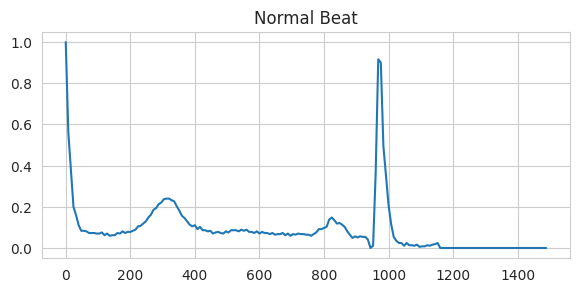

In [28]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=normal_sample.drop("label").to_numpy().flatten())
plt.title("Normal Beat")
plt.show()

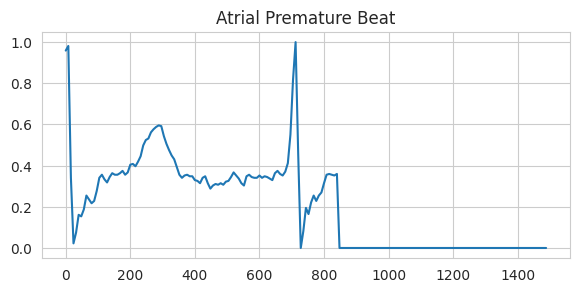

In [29]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=atrial_premature_sample.drop("label").to_numpy().flatten())
plt.title("Atrial Premature Beat")
plt.show()

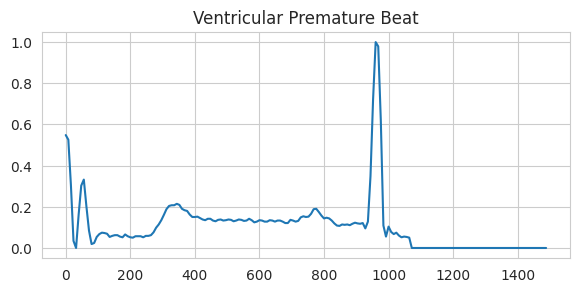

In [30]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=ventricular_premature_sample.drop("label").to_numpy().flatten())
plt.title("Ventricular Premature Beat")
plt.show()

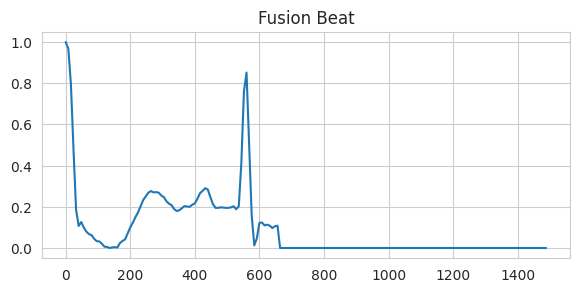

In [31]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=fusion_sample.drop("label").to_numpy().flatten())
plt.title("Fusion Beat")
plt.show()

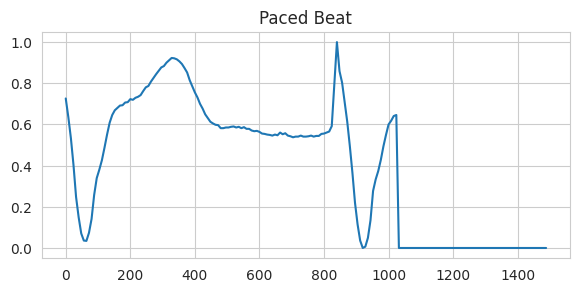

In [32]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=paced_sample.drop("label").to_numpy().flatten())
plt.title("Paced Beat")
plt.show()

# Data Augmentation


In [33]:
# import sys

# sys.path.append("..")
# from helpers.data_augmentation import (
#     GAN,
#     GANGenerator_LSTM,
#     GANDiscriminator_LSTM,
#     GANDiscriminator_FF,
#     GANGenerator_FF,
# )
# import models.ecg_cnn as cnn
# import helpers.data_helper as data_helper
# import torch
# from torch.utils.data import DataLoader, TensorDataset

# AUGMENTATION_CONFIG = {
#     "augmentation_technique": "rgan",  # Options: "smote", "base", "rgan" "none"
#     "sampling_strategy": {
#         0: 60000,
#         1: 60000,
#         2: 60000,
#         3: 60000,  # Reduce (too many synthetic → overprediction)
#         4: 60000,
#     },
#     "sampling_config": {
#         "jitter": True,
#         "jitter_rate": 0.8,  # 80% chance per sample
#         "jitter_sigma": 0.08,  # Gentler noise
#         "scale": True,
#         "scale_rate": 0.7,
#         "scale_low": 0.8,
#         "scale_high": 1.2,
#         "shift": True,
#         "shift_rate": 0.7,
#         "shift_max": 5,
#         "cutout": True,
#         "cutout_rate": 0.5,
#         "cutout_size": 10,
#     },
# }


# X = data.drop("label").to_numpy().astype(np.float32)
# y = data["label"].to_numpy().astype(np.int64)
# seed = 42

# generator = GANGenerator_LSTM(noise_dim=187, signal_length=X.shape[1], hidden_dim=128)
# discriminator = GANDiscriminator_LSTM(signal_length=X.shape[1], hidden_dim=128)
# print(X.shape)
# # Dataloader for class according to label
# label = 3
# label_dataset = TensorDataset(torch.tensor(X[y == label]), torch.tensor(y[y == label]))
# label_dataloader = DataLoader(
#     label_dataset, batch_size=X[y == label].shape[0] // 100, shuffle=True
# )
# rgan = GAN(
#     noise_dim=187,
#     signal_length=X.shape[1],
#     random_seed=seed,
#     generator=generator,
#     discriminator=discriminator,
# )


# # Train RGAN
# print(f"Training RGAN for class {label}")
# rgan.train(label_dataloader, num_epochs=1000, visualizer=True)

# # Generate synthetic samples
# num_samples = 10
# print(f"Generating {num_samples} samples for class {label}")
# X_samples = rgan.generate_samples(num_samples)

## Visualize GAN Samples


In [34]:
# print(X_samples[0] - X_samples[9])

In [35]:
# # Visualize 1D samples
# for i in range(1, 6):
#     normal_generated_sample = X_samples[i]
#     x_ms = np.array(range(187)) * 8
#     plt.figure(figsize=(15, 10))
#     plt.subplot(3, 2, i)
#     sns.lineplot(x=x_ms, y=normal_generated_sample.flatten())
#     plt.title("Normal Beat")
#     plt.show()

# Performance


In [36]:
results = pl.read_csv("../ecg_model_performance_results.csv")
results_grouped = results.group_by(["model_type", "num_conv_layers"]).agg(
    [
        pl.mean("test_accuracy").alias("mean_test_accuracy"),
        pl.mean("test_loss").alias("mean_test_loss"),
        pl.mean("f1_macro").alias("mean_f1_macro"),
        pl.mean("precision_macro").alias("mean_precision_macro"),
        pl.mean("recall_macro").alias("mean_recall_macro"),
        pl.mean("roc_auc_ovr").alias("mean_roc_auc_ovr"),
        pl.mean("roc_auc_ovo").alias("mean_roc_auc_ovo"),
    ]
)
results_grouped

shape: (10, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ model_typ ┆ num_conv_ ┆ mean_test ┆ mean_test ┆ … ┆ mean_prec ┆ mean_reca ┆ mean_roc_ ┆ mean_roc │
│ e         ┆ layers    ┆ _accuracy ┆ _loss     ┆   ┆ ision_mac ┆ ll_macro  ┆ auc_ovr   ┆ _auc_ovo │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ro        ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ i64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ f64       ┆ f64       ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ ECGCNN    ┆ 2         ┆ 0.806203  ┆ 0.512694  ┆ … ┆ 0.559138  ┆ 0.850072  ┆ 0.960267  ┆ 0.972098 │
│ ECGCNN    ┆ 3         ┆ 0.883848  ┆ 0.380753  ┆ … ┆ 0.620731  ┆ 0.881624  ┆ 0.973188  ┆ 0.981069 │
│ ECGCNN    ┆ 4         ┆ 0.864489  ┆ 0.395183  ┆ … ┆ 0.611117  ┆ 0.880541  ┆ 0.974517  ┆ 0.982163 │
│ ECGCNN    ┆ 5         ┆ 0.894857  ┆ 0.313469  ┆ … ┆ 0.646023  ┆ 0.887265  ┆ 0.97722   ┆ 0.983614 │
│ ECGCNN_VG ┆ 5         ┆ 0.877663  ┆ 0.40527   ┆ … ┆ 0.614724  ┆ 0.874075  ┆ 0.972223  ┆ 0.980923 │
│ G         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ECGCNN_VG ┆ 3         ┆ 0.870985  ┆ 0.365697  ┆ … ┆ 0.616315  ┆ 0.873585  ┆ 0.973109  ┆ 0.980371 │
│ G         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ECGCNN    ┆ 1         ┆ 0.771158  ┆ 0.614664  ┆ … ┆ 0.514439  ┆ 0.822834  ┆ 0.950711  ┆ 0.966504 │
│ ECGCNN_VG ┆ 2         ┆ 0.824584  ┆ 0.513825  ┆ … ┆ 0.560001  ┆ 0.84796   ┆ 0.959977  ┆ 0.973167 │
│ G         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ECGCNN_VG ┆ 4         ┆ 0.870674  ┆ 0.397537  ┆ … ┆ 0.610135  ┆ 0.869996  ┆ 0.969921  ┆ 0.979043 │
│ G         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ ECGCNN_VG ┆ 1         ┆ 0.749196  ┆ 0.643692  ┆ … ┆ 0.500268  ┆ 0.815287  ┆ 0.948827  ┆ 0.964796 │
│ G         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [37]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
def output_metrics(metric_filename):
    with open(metric_filename, "r") as f:
        metrics_data = json.load(f)

    # Set style
    sns.set_style("whitegrid")
    plt.rcParams["figure.figsize"] = (15, 10)

    # Extract data for easier manipulation
    seeds = [entry["seed"] for entry in metrics_data]
    accuracies = [entry["metrics"]["accuracy"] for entry in metrics_data]
    f1_macros = [entry["metrics"]["f1_macro"] for entry in metrics_data]
    losses = [entry["metrics"]["avg_loss"] for entry in metrics_data]
    training_times = [entry["training_time"] for entry in metrics_data]

    class_names = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"]

    # 1. Overall Performance Metrics
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    axes[0, 0].plot(seeds, accuracies, marker="o", linewidth=2, markersize=8)
    axes[0, 0].set_xlabel("Seed")
    axes[0, 0].set_ylabel("Accuracy")
    axes[0, 0].set_title("Test Accuracy by Seed")
    axes[0, 0].axhline(
        y=np.mean(accuracies),
        color="r",
        linestyle="--",
        label=f"Mean: {np.mean(accuracies):.4f}",
    )
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].plot(
        seeds, f1_macros, marker="s", linewidth=2, markersize=8, color="green"
    )
    axes[0, 1].set_xlabel("Seed")
    axes[0, 1].set_ylabel("F1 Macro")
    axes[0, 1].set_title("F1 Macro Score by Seed")
    axes[0, 1].axhline(
        y=np.mean(f1_macros),
        color="r",
        linestyle="--",
        label=f"Mean: {np.mean(f1_macros):.4f}",
    )
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    axes[1, 0].plot(
        seeds, losses, marker="^", linewidth=2, markersize=8, color="orange"
    )
    axes[1, 0].set_xlabel("Seed")
    axes[1, 0].set_ylabel("Loss")
    axes[1, 0].set_title("Test Loss by Seed")
    axes[1, 0].axhline(
        y=np.mean(losses),
        color="r",
        linestyle="--",
        label=f"Mean: {np.mean(losses):.4f}",
    )
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 1].bar(range(len(seeds)), training_times, color="purple", alpha=0.7)
    axes[1, 1].set_xlabel("Run Index")
    axes[1, 1].set_ylabel("Training Time (seconds)")
    axes[1, 1].set_title("Training Time per Run")
    axes[1, 1].set_xticks(range(len(seeds)))
    axes[1, 1].set_xticklabels([f"Seed {s}" for s in seeds], rotation=45)
    axes[1, 1].grid(True, alpha=0.3, axis="y")

    plt.tight_layout()
    plt.show()

    # 2. Aggregate Confusion Matrix
    confusion_matrices = [
        np.array(entry["metrics"]["confusion_matrix"]) for entry in metrics_data
    ]
    mean_cm = np.mean(confusion_matrices, axis=0)
    std_cm = np.std(confusion_matrices, axis=0)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Mean confusion matrix
    sns.heatmap(
        mean_cm,
        annot=True,
        fmt=".0f",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[0],
    )
    axes[0].set_title("Mean Confusion Matrix\n(Averaged across all seeds)")
    axes[0].set_ylabel("True Label")
    axes[0].set_xlabel("Predicted Label")

    # Std confusion matrix
    sns.heatmap(
        std_cm,
        annot=True,
        fmt=".1f",
        cmap="Reds",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[1],
    )
    axes[1].set_title(
        "Standard Deviation of Confusion Matrix\n(Variability across seeds)"
    )
    axes[1].set_ylabel("True Label")
    axes[1].set_xlabel("Predicted Label")

    plt.tight_layout()
    plt.show()

    # 3. Per-Class Performance
    f1_per_class = np.array(
        [entry["metrics"]["f1_per_class"] for entry in metrics_data]
    )
    precision_per_class = np.array(
        [entry["metrics"]["precision_per_class"] for entry in metrics_data]
    )
    recall_per_class = np.array(
        [entry["metrics"]["recall_per_class"] for entry in metrics_data]
    )

    mean_f1 = np.mean(f1_per_class, axis=0)
    std_f1 = np.std(f1_per_class, axis=0)
    mean_precision = np.mean(precision_per_class, axis=0)
    std_precision = np.std(precision_per_class, axis=0)
    mean_recall = np.mean(recall_per_class, axis=0)
    std_recall = np.std(recall_per_class, axis=0)

    x = np.arange(len(class_names))
    width = 0.2

    fig, ax = plt.subplots(figsize=(16, 6))

    bars1 = ax.bar(
        x - 1.5 * width,
        mean_f1,
        width,
        yerr=std_f1,
        label="F1 Score",
        capsize=5,
        alpha=0.8,
    )
    bars2 = ax.bar(
        x - 0.5 * width,
        mean_precision,
        width,
        yerr=std_precision,
        label="Precision",
        capsize=5,
        alpha=0.8,
    )
    bars3 = ax.bar(
        x + 0.5 * width,
        mean_recall,
        width,
        yerr=std_recall,
        label="Recall",
        capsize=5,
        alpha=0.8,
    )

    ax.set_xlabel("Class")
    ax.set_ylabel("Score")
    ax.set_title("Per-Class Performance Metrics (Mean ± Std)")
    ax.set_xticks(x)
    ax.set_xticklabels(class_names, rotation=45, ha="right")
    ax.legend()
    ax.grid(True, alpha=0.3, axis="y")
    ax.set_ylim([0.6, 1.0])

    plt.tight_layout()
    plt.show()

    # 4. Per-Class Performance Heatmap
    fig, axes = plt.subplots(1, 3, figsize=(24, 5))

    metrics_dict = {
        "F1 Score": mean_f1,
        "Precision": mean_precision,
        "Recall": mean_recall,
    }

    for idx, (metric_name, values) in enumerate(metrics_dict.items()):
        # Reshape for heatmap
        data = values.reshape(1, -1)
        sns.heatmap(
            data,
            annot=True,
            fmt=".3f",
            cmap="RdYlGn",
            xticklabels=class_names,
            yticklabels=[""],
            ax=axes[idx],
            vmin=0.7,
            vmax=1.0,
            cbar_kws={"label": "Score"},
        )
        axes[idx].set_title(f"{metric_name} by Class")

    plt.tight_layout()
    plt.show()

    # 5. ROC AUC Comparison
    roc_auc_ovr = [entry["metrics"]["roc_auc_ovr"] for entry in metrics_data]
    roc_auc_ovo = [entry["metrics"]["roc_auc_ovo"] for entry in metrics_data]

    fig, ax = plt.subplots(figsize=(10, 6))

    x_pos = np.arange(len(seeds))
    width = 0.35

    bars1 = ax.bar(
        x_pos - width / 2, roc_auc_ovr, width, label="One-vs-Rest", alpha=0.8
    )
    bars2 = ax.bar(x_pos + width / 2, roc_auc_ovo, width, label="One-vs-One", alpha=0.8)

    ax.set_xlabel("Seed")
    ax.set_ylabel("ROC AUC Score")
    ax.set_title("ROC AUC Scores by Seed (OvR vs OvO)")
    ax.set_xticks(x_pos)
    ax.set_xticklabels([f"Seed {s}" for s in seeds])
    ax.legend()
    ax.grid(True, alpha=0.3, axis="y")
    ax.set_ylim([0.98, 0.995])

    plt.tight_layout()
    plt.show()

    # 6. Summary Statistics Table
    summary_stats = pd.DataFrame(
        {
            "Metric": [
                "Accuracy",
                "F1 Macro",
                "Precision",
                "Recall",
                "Specificity",
                "Loss",
                "ROC AUC (OvR)",
                "ROC AUC (OvO)",
                "Training Time (s)",
            ],
            "Mean": [
                np.mean(accuracies),
                np.mean(f1_macros),
                np.mean(
                    [entry["metrics"]["precision_macro"] for entry in metrics_data]
                ),
                np.mean([entry["metrics"]["recall_macro"] for entry in metrics_data]),
                np.mean(
                    [entry["metrics"]["specificity_macro"] for entry in metrics_data]
                ),
                np.mean(losses),
                np.mean(roc_auc_ovr),
                np.mean(roc_auc_ovo),
                np.mean(training_times),
            ],
            "Std": [
                np.std(accuracies),
                np.std(f1_macros),
                np.std([entry["metrics"]["precision_macro"] for entry in metrics_data]),
                np.std([entry["metrics"]["recall_macro"] for entry in metrics_data]),
                np.std(
                    [entry["metrics"]["specificity_macro"] for entry in metrics_data]
                ),
                np.std(losses),
                np.std(roc_auc_ovr),
                np.std(roc_auc_ovo),
                np.std(training_times),
            ],
            "Min": [
                np.min(accuracies),
                np.min(f1_macros),
                np.min([entry["metrics"]["precision_macro"] for entry in metrics_data]),
                np.min([entry["metrics"]["recall_macro"] for entry in metrics_data]),
                np.min(
                    [entry["metrics"]["specificity_macro"] for entry in metrics_data]
                ),
                np.min(losses),
                np.min(roc_auc_ovr),
                np.min(roc_auc_ovo),
                np.min(training_times),
            ],
            "Max": [
                np.max(accuracies),
                np.max(f1_macros),
                np.max([entry["metrics"]["precision_macro"] for entry in metrics_data]),
                np.max([entry["metrics"]["recall_macro"] for entry in metrics_data]),
                np.max(
                    [entry["metrics"]["specificity_macro"] for entry in metrics_data]
                ),
                np.max(losses),
                np.max(roc_auc_ovr),
                np.max(roc_auc_ovo),
                np.max(training_times),
            ],
        }
    )

    print("\n" + "=" * 80)
    print("SUMMARY STATISTICS")
    print("=" * 80)
    print(summary_stats.to_string(index=False))
    print("=" * 80)

    # 7. Per-Class Metrics Table
    per_class_df = pd.DataFrame(
        {
            "Class": class_names,
            "F1 (mean±std)": [f"{m:.3f}±{s:.3f}" for m, s in zip(mean_f1, std_f1)],
            "Precision (mean±std)": [
                f"{m:.3f}±{s:.3f}" for m, s in zip(mean_precision, std_precision)
            ],
            "Recall (mean±std)": [
                f"{m:.3f}±{s:.3f}" for m, s in zip(mean_recall, std_recall)
            ],
        }
    )

    print("\n" + "=" * 80)
    print("PER-CLASS METRICS")
    print("=" * 80)
    print(per_class_df.to_string(index=False))
    print("=" * 80)

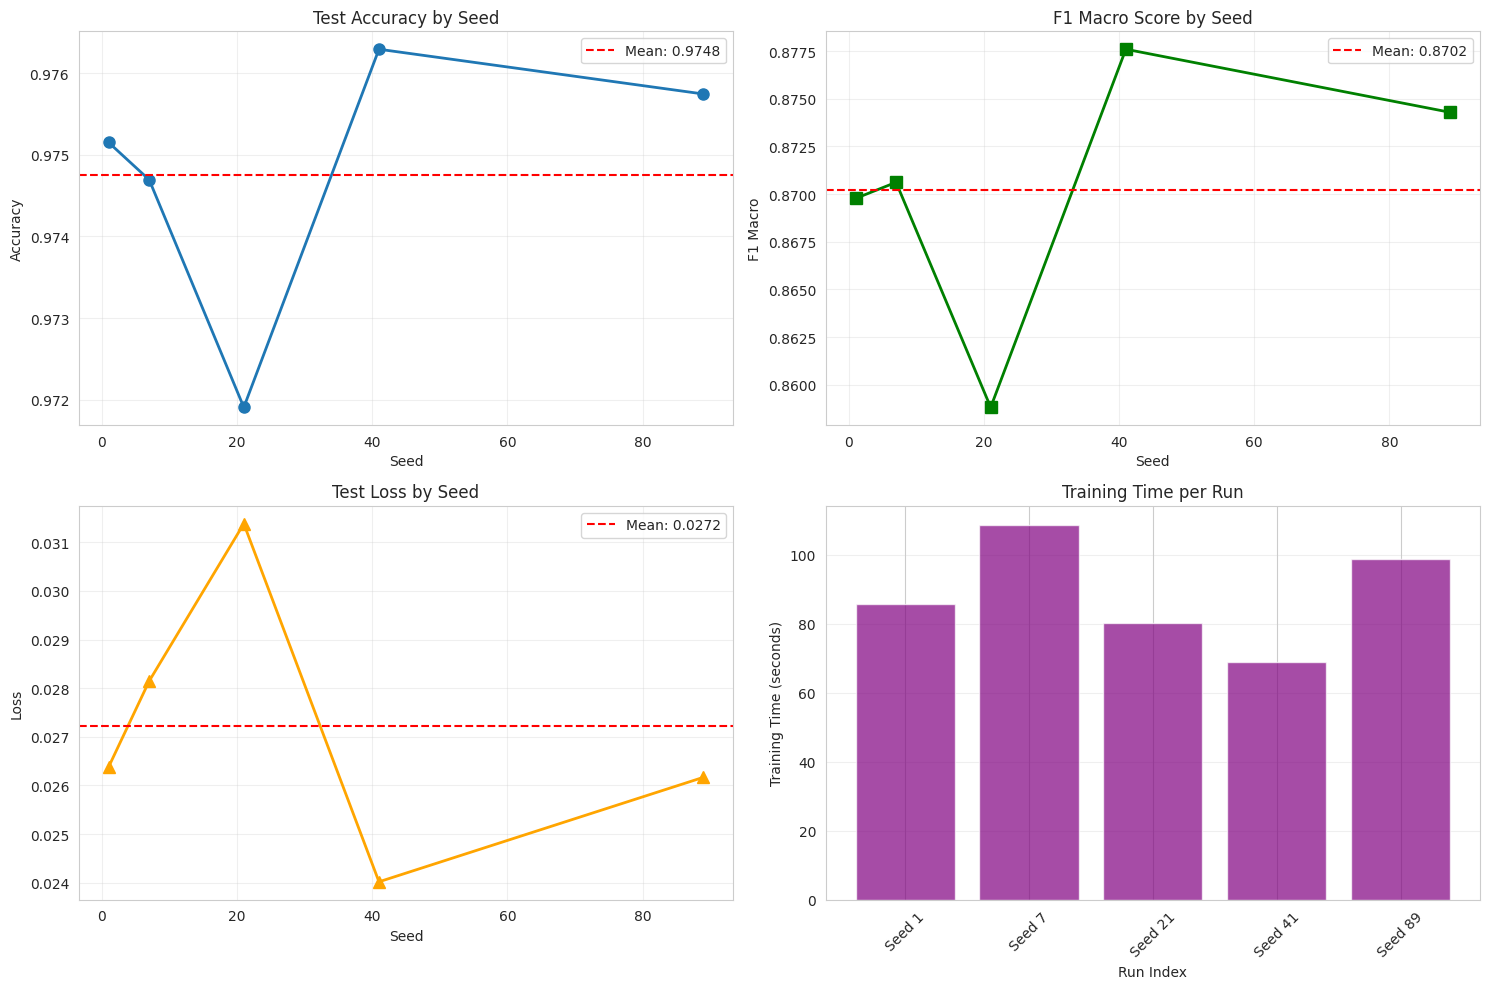

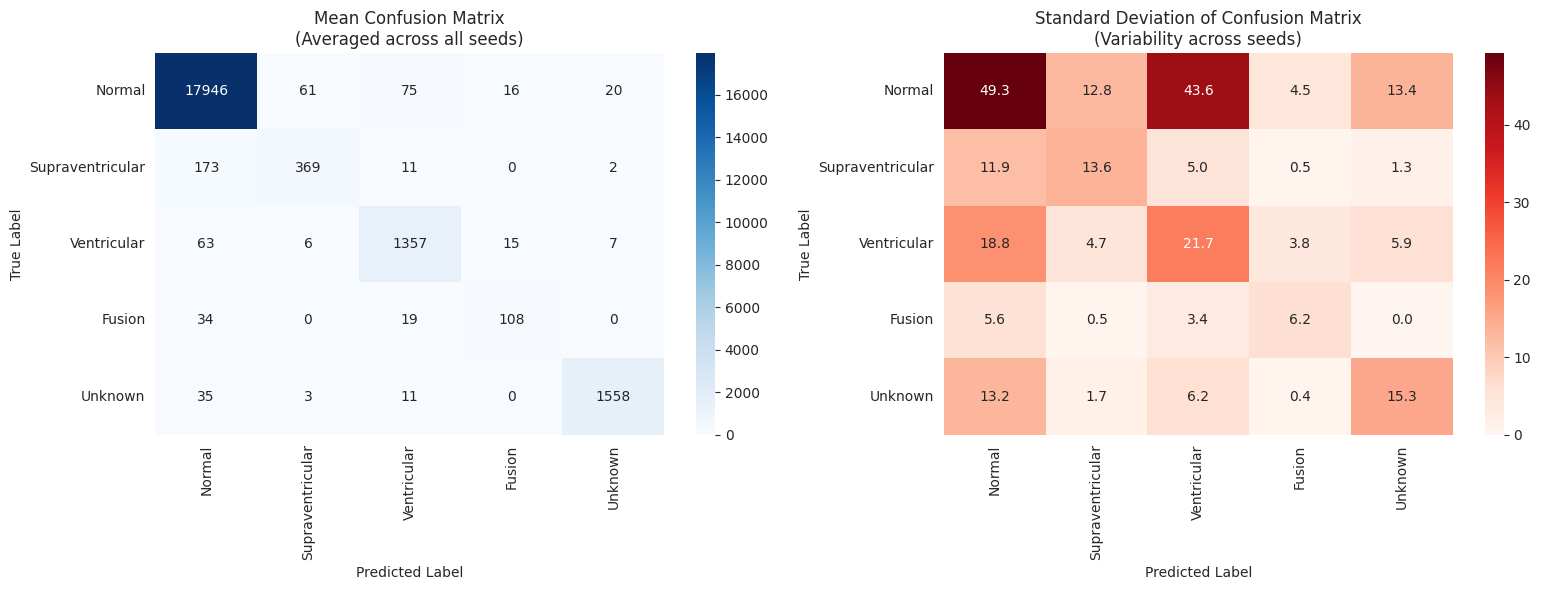

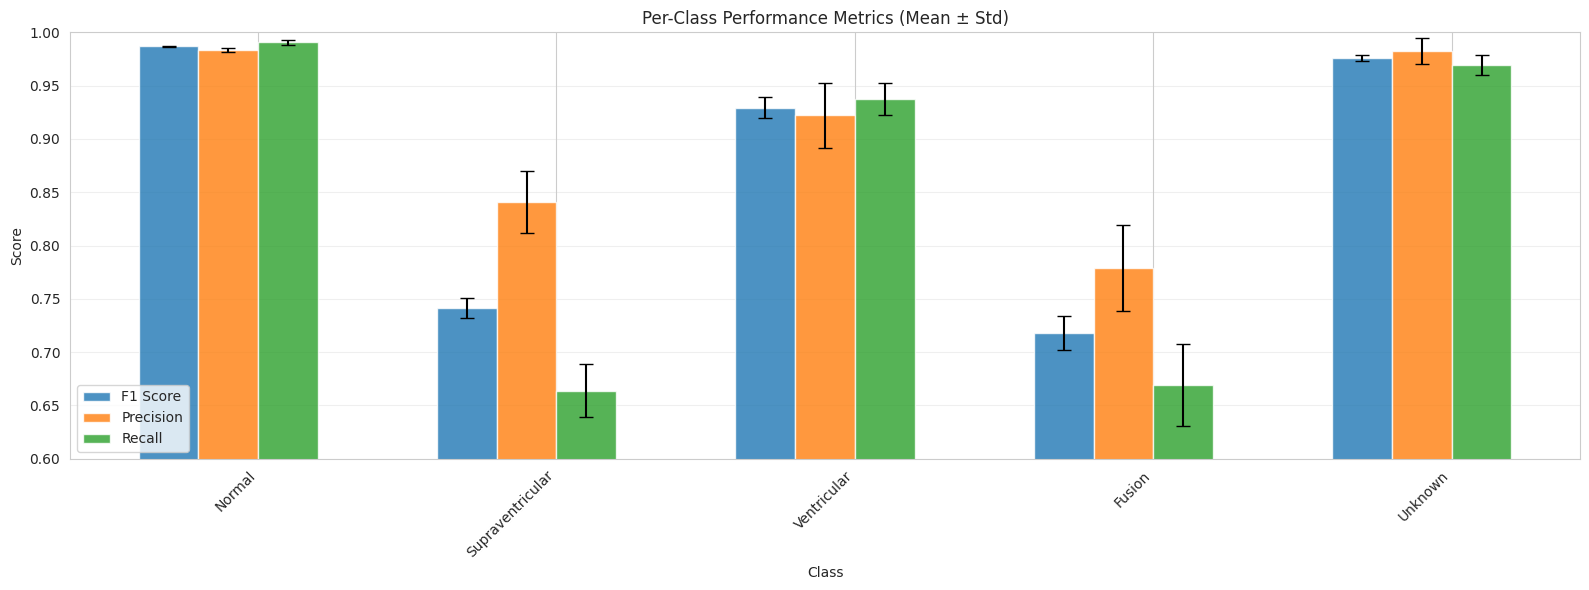

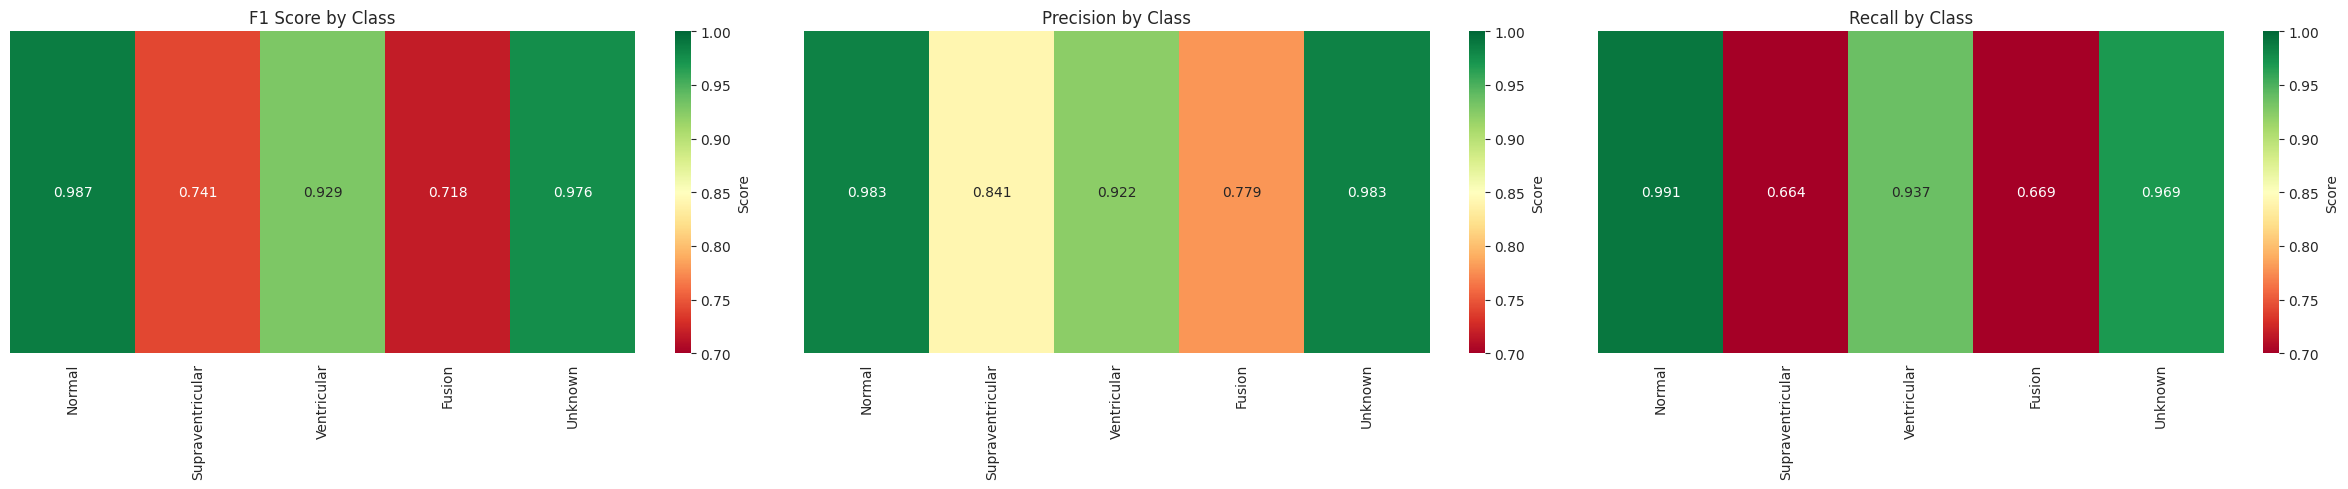

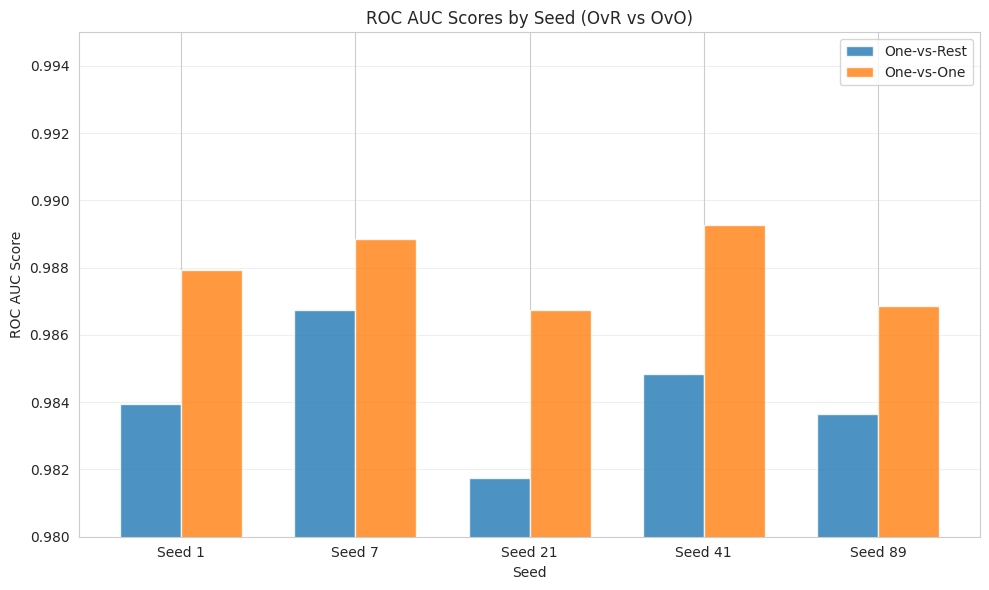


SUMMARY STATISTICS
           Metric      Mean       Std       Min        Max
         Accuracy  0.974758  0.001524  0.971908   0.976293
         F1 Macro  0.870217  0.006343  0.858821   0.877593
        Precision  0.901511  0.011054  0.882270   0.912191
           Recall  0.846051  0.006256  0.837464   0.856020
      Specificity  0.981451  0.001346  0.979034   0.983004
             Loss  0.027219  0.002460  0.024018   0.031383
    ROC AUC (OvR)  0.984187  0.001624  0.981750   0.986730
    ROC AUC (OvO)  0.987936  0.001016  0.986753   0.989269
Training Time (s) 88.430558 13.968887 68.848453 108.682496

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.987±0.001          0.983±0.002       0.991±0.003
Supraventricular   0.741±0.009          0.841±0.029       0.664±0.024
     Ventricular   0.929±0.010          0.922±0.030       0.937±0.015
          Fusion   0.718±0.016          0.779±0.040       0.669±0.038
         Unknown   0.

In [38]:
output_metrics("../metrics_ECGCNN.json")

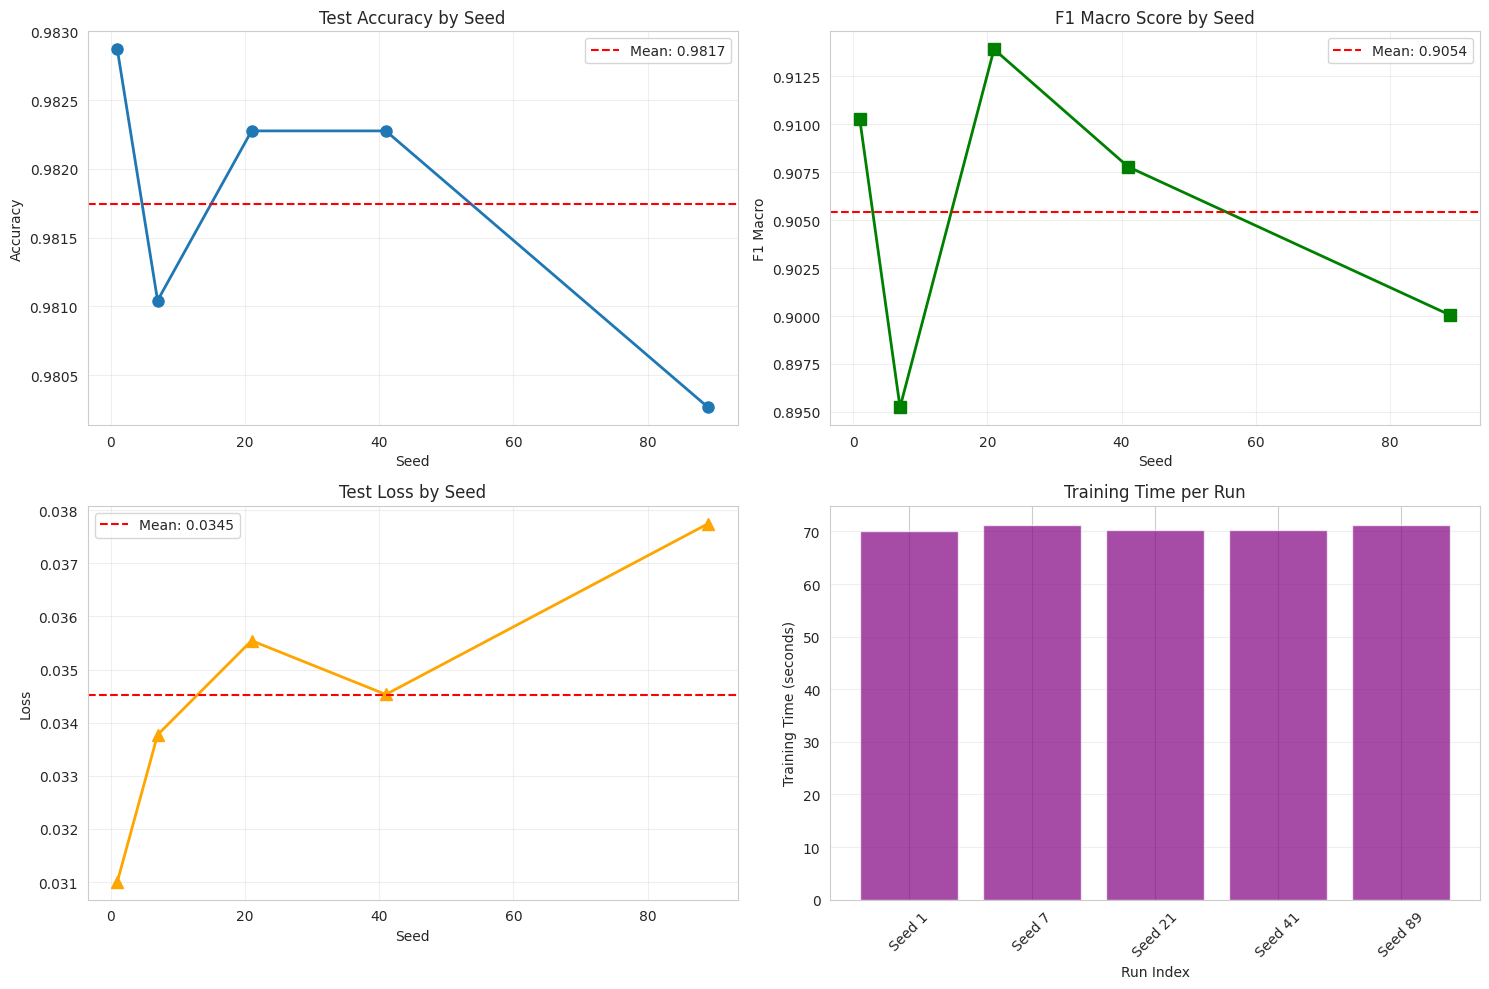

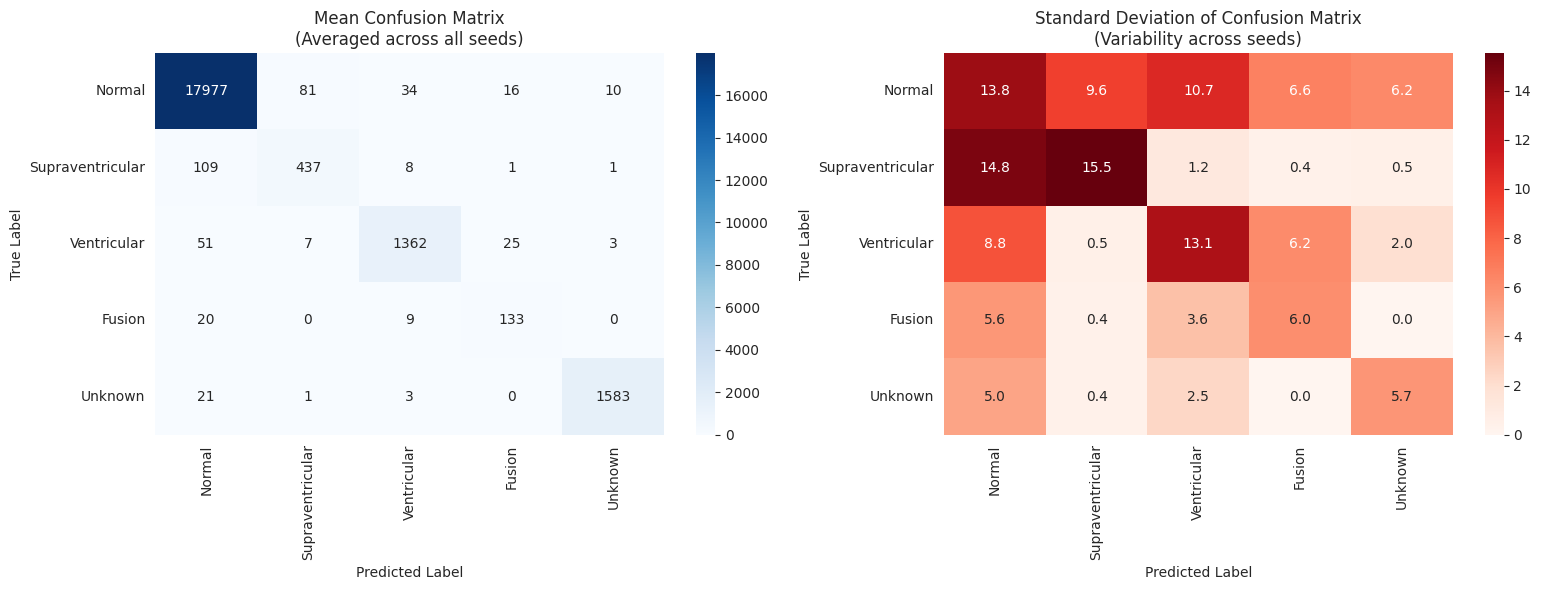

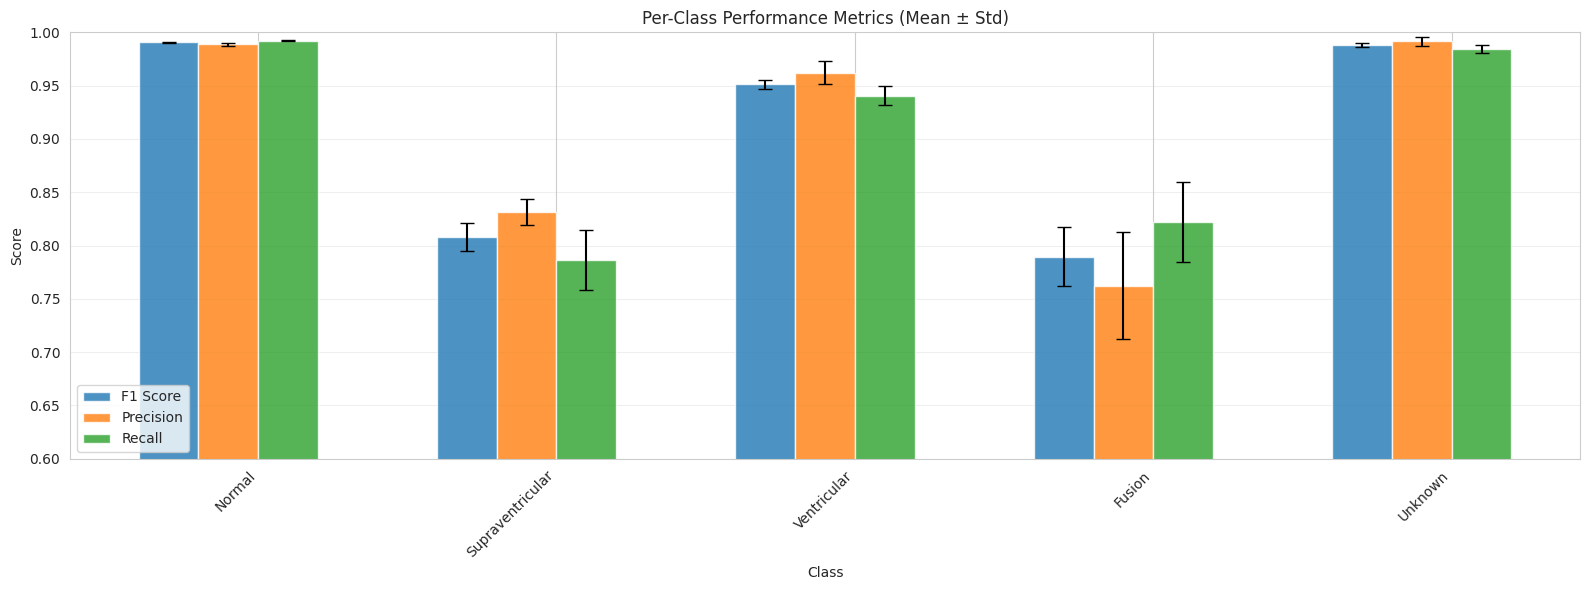

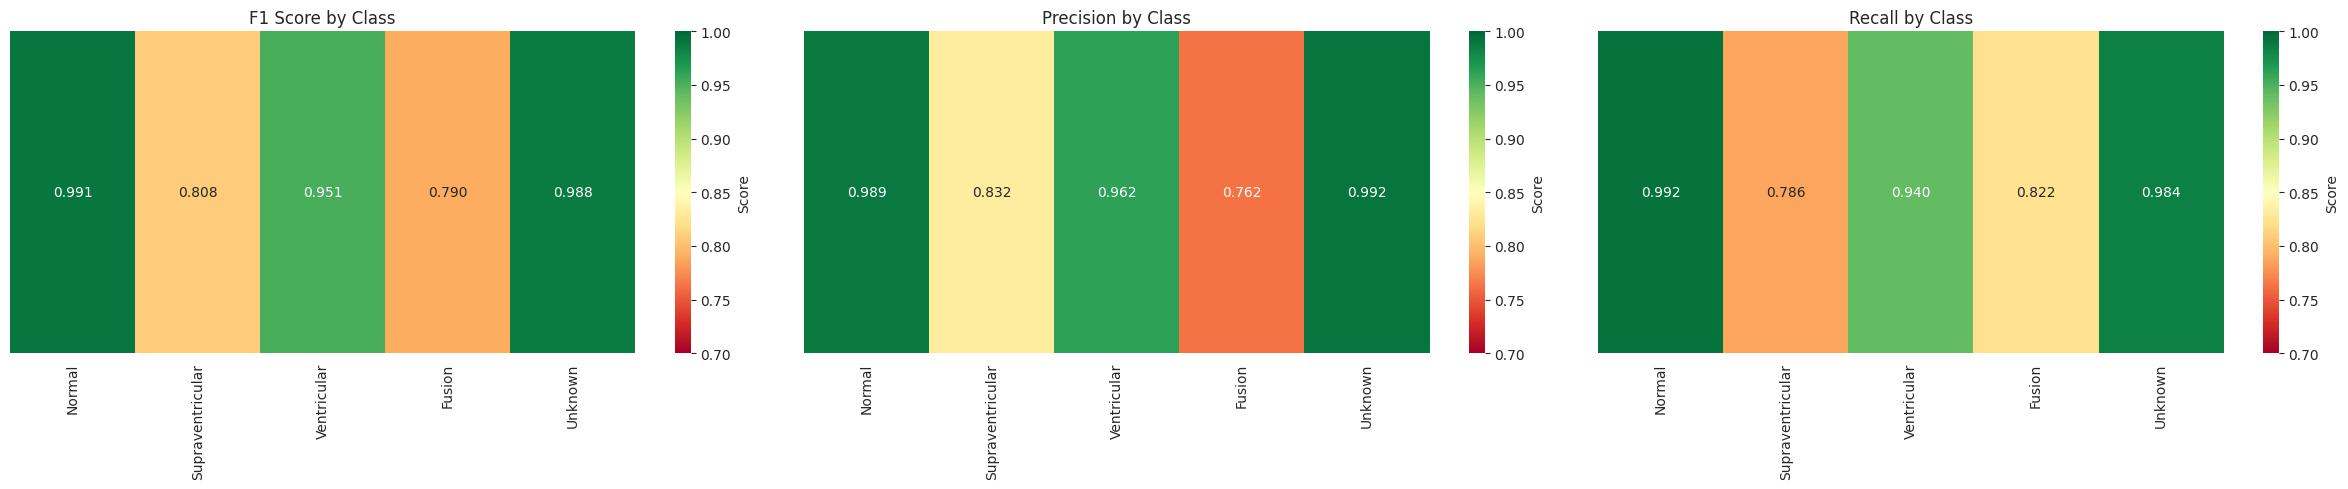

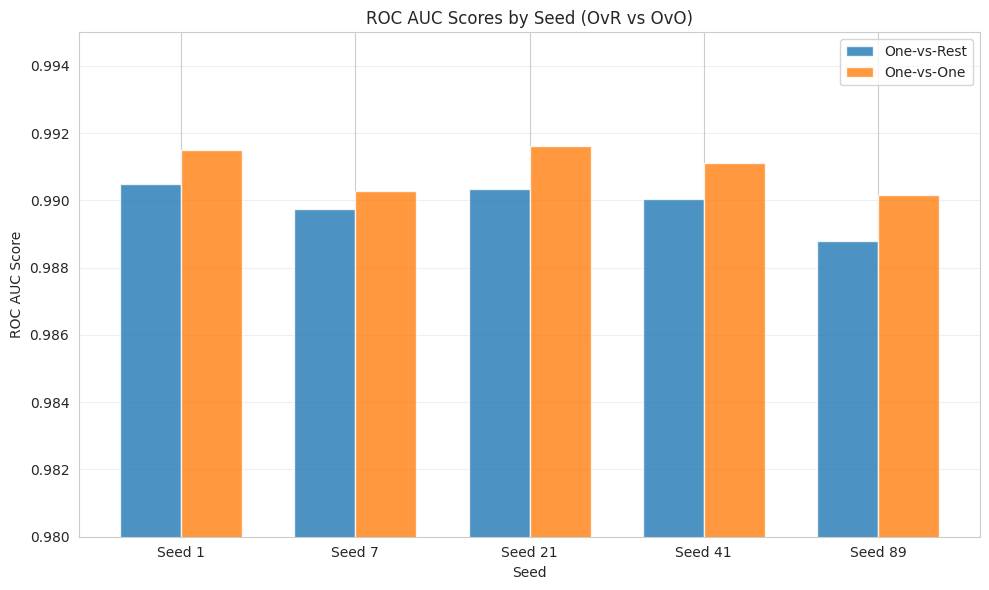


SUMMARY STATISTICS
           Metric      Mean      Std       Min       Max
         Accuracy  0.981747 0.000950  0.980267  0.982870
         F1 Macro  0.905450 0.006838  0.895241  0.913915
        Precision  0.907340 0.007594  0.899779  0.921261
           Recall  0.905141 0.012974  0.888775  0.920027
      Specificity  0.987456 0.001370  0.985544  0.989355
             Loss  0.034520 0.002207  0.031006  0.037745
    ROC AUC (OvR)  0.989881 0.000597  0.988795  0.990481
    ROC AUC (OvO)  0.990936 0.000610  0.990154  0.991616
Training Time (s) 70.648170 0.488026 70.153174 71.300998

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.991±0.001          0.989±0.001       0.992±0.001
Supraventricular   0.808±0.013          0.832±0.013       0.786±0.028
     Ventricular   0.951±0.004          0.962±0.011       0.940±0.009
          Fusion   0.790±0.027          0.762±0.050       0.822±0.037
         Unknown   0.988±0.002          0

In [39]:
output_metrics("../metrics_ECGCNN_1M.json")

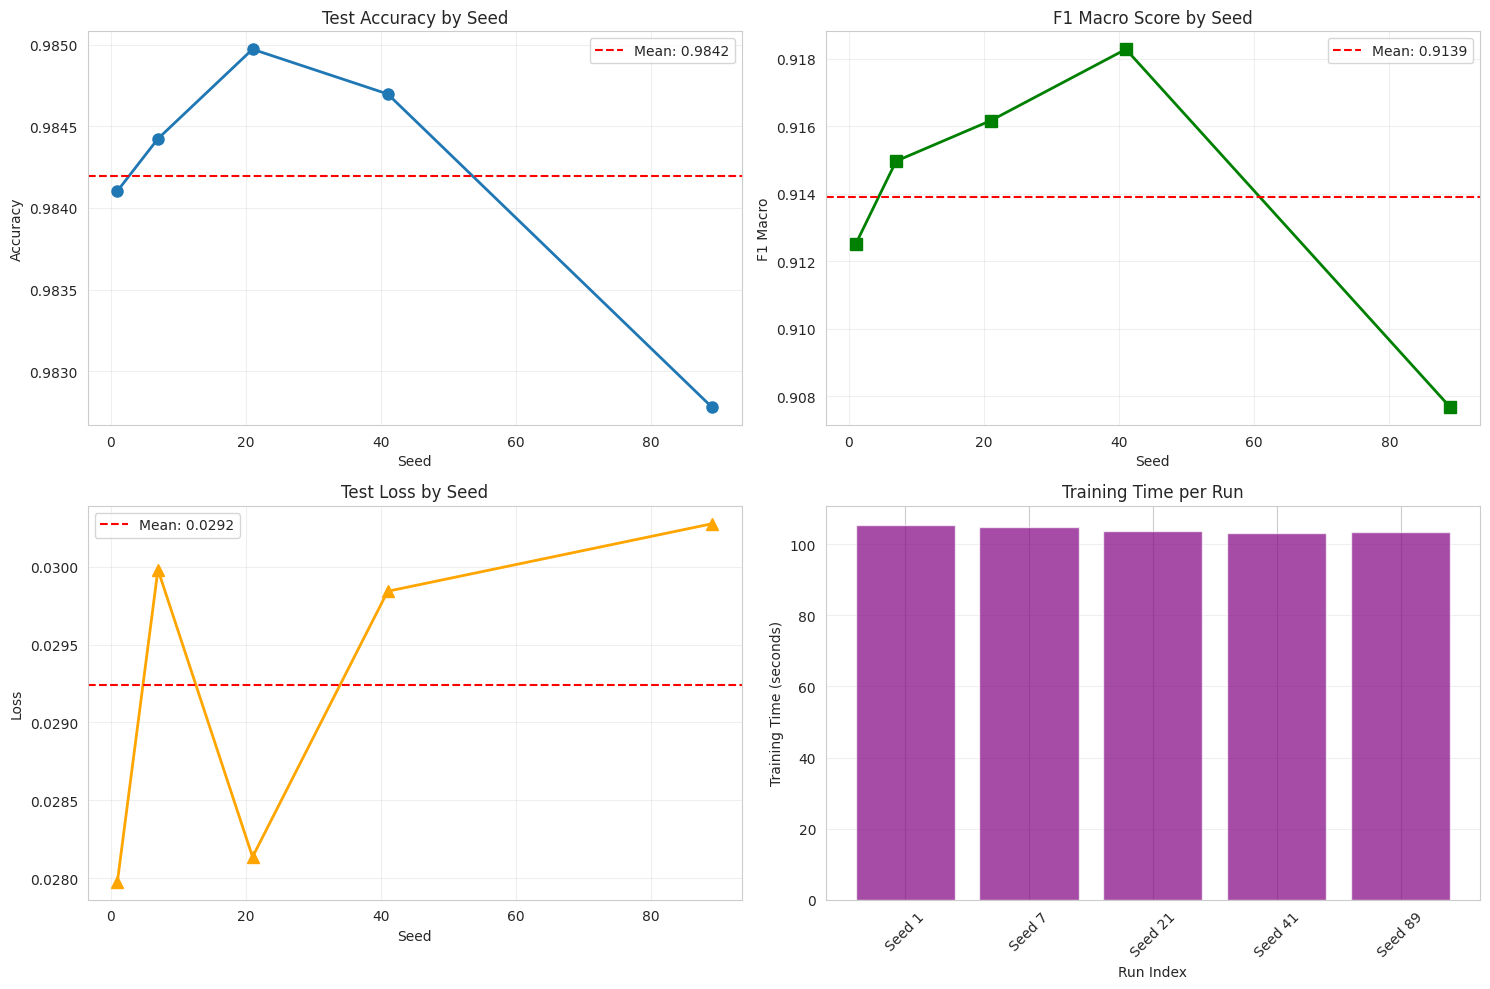

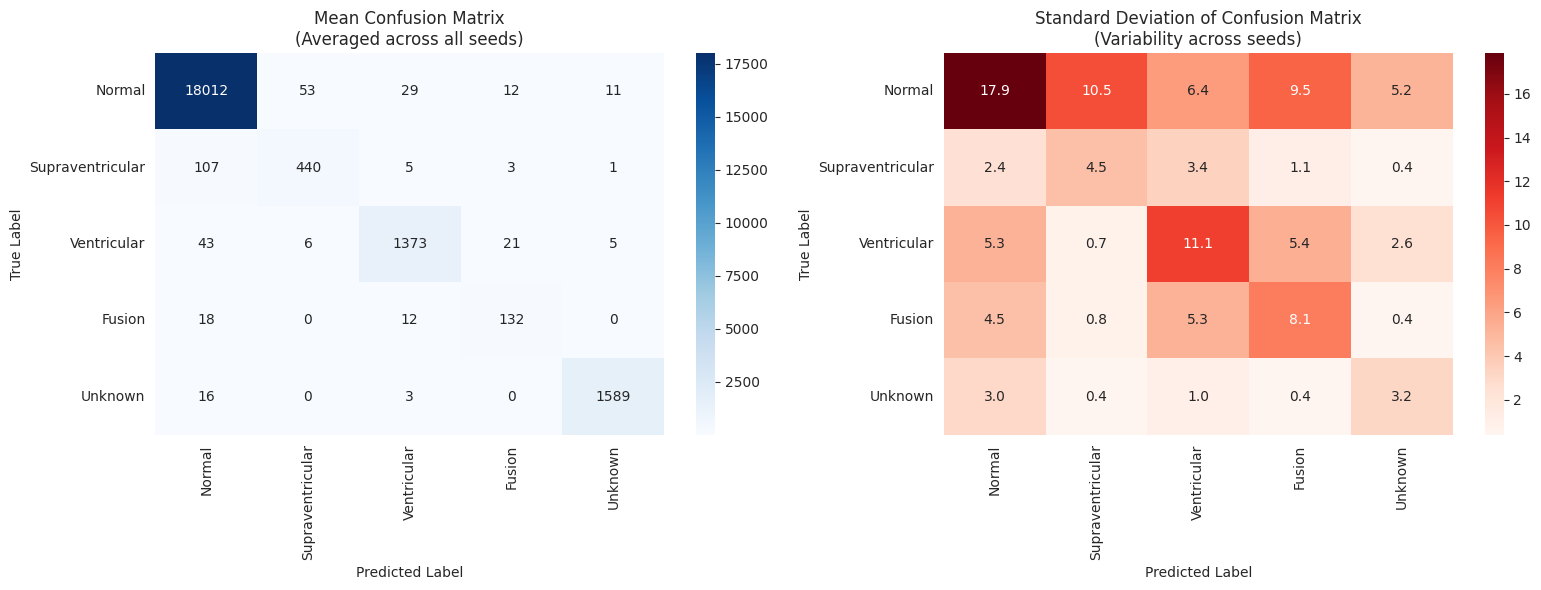

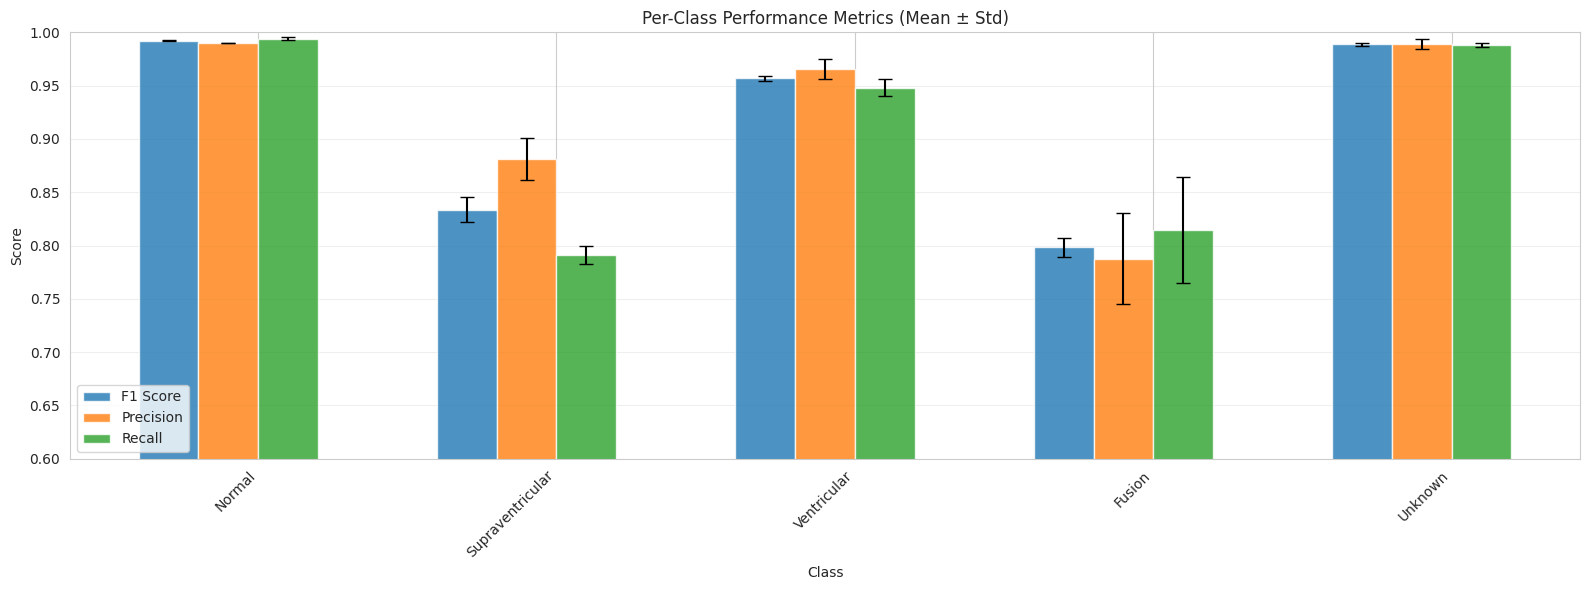

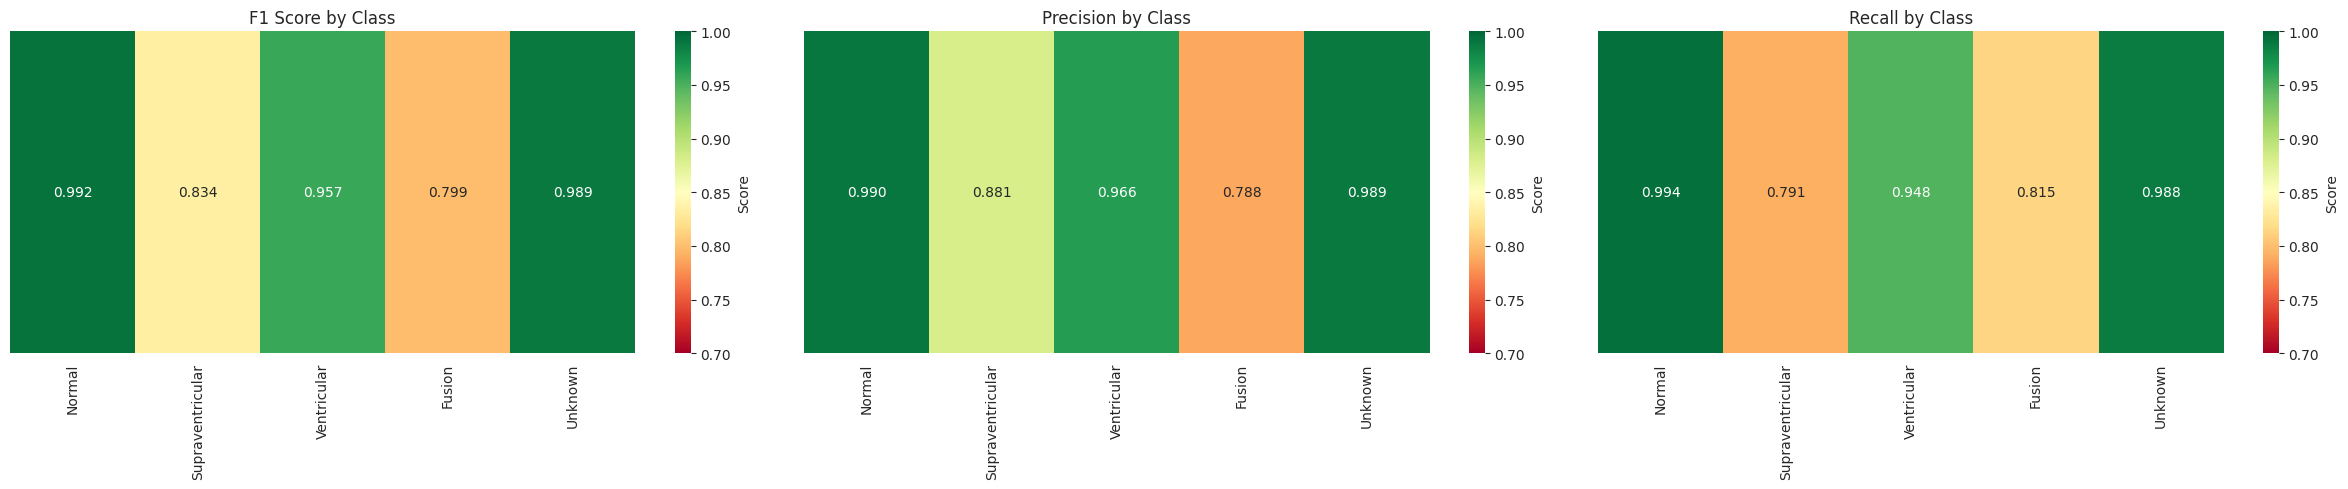

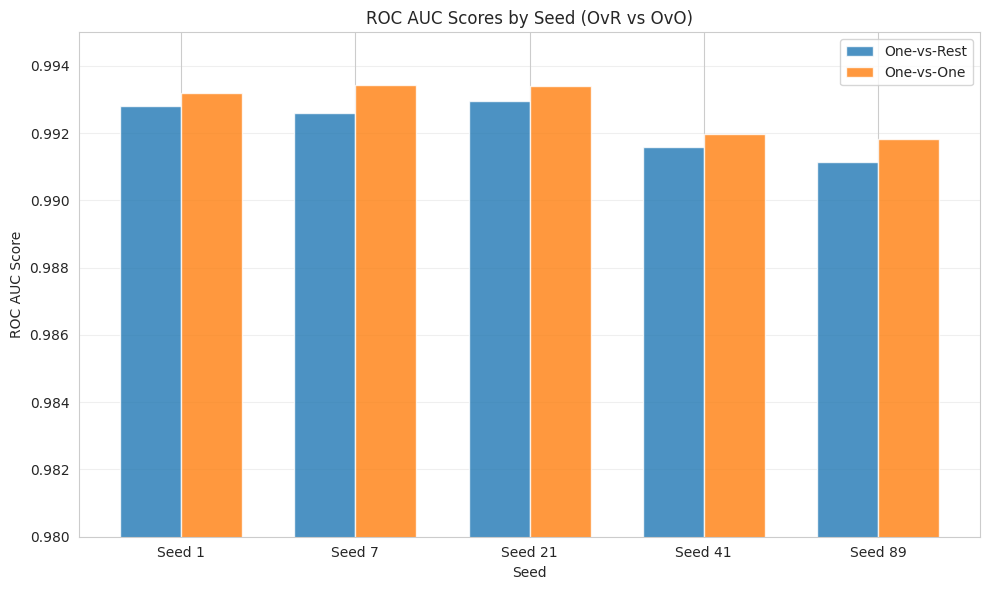


SUMMARY STATISTICS
           Metric       Mean      Std        Min        Max
         Accuracy   0.984195 0.000764   0.982779   0.984972
         F1 Macro   0.913924 0.003639   0.907678   0.918288
        Precision   0.922797 0.005994   0.911453   0.928649
           Recall   0.907249 0.010007   0.894273   0.923667
      Specificity   0.988726 0.000229   0.988426   0.989071
             Loss   0.029243 0.000981   0.027976   0.030278
    ROC AUC (OvR)   0.992220 0.000720   0.991135   0.992960
    ROC AUC (OvO)   0.992768 0.000711   0.991836   0.993431
Training Time (s) 104.116306 0.903774 103.257741 105.523710

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.992±0.000          0.990±0.000       0.994±0.001
Supraventricular   0.834±0.012          0.881±0.020       0.791±0.008
     Ventricular   0.957±0.002          0.966±0.009       0.948±0.008
          Fusion   0.799±0.009          0.788±0.042       0.815±0.050
         Un

In [40]:
output_metrics("../metrics_ECGCNN_3M.json")

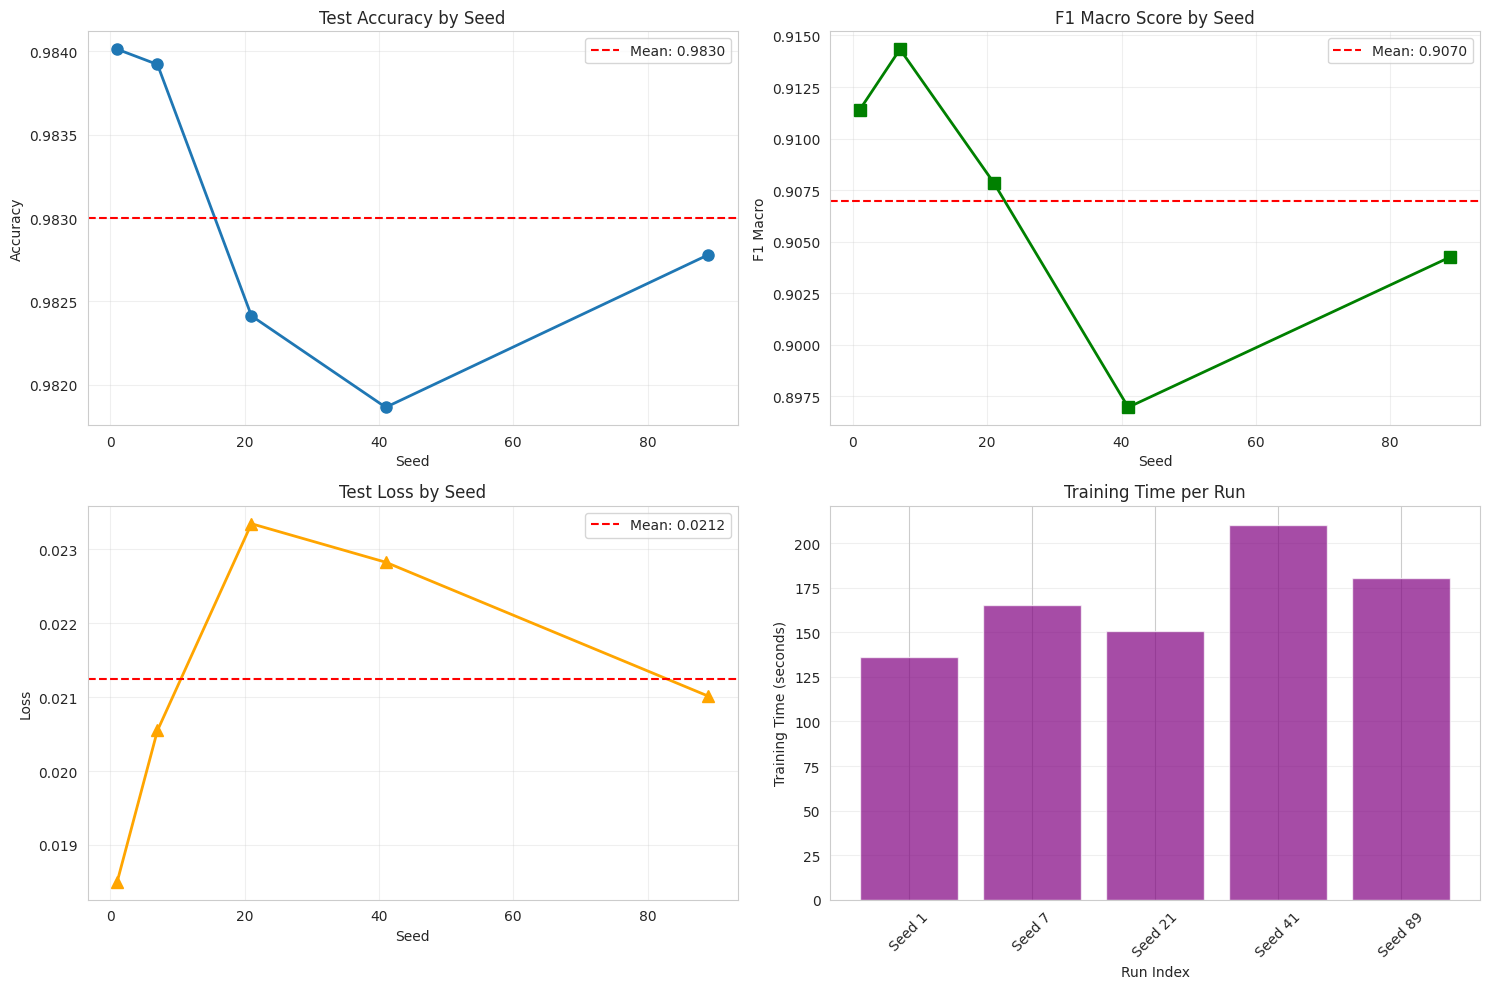

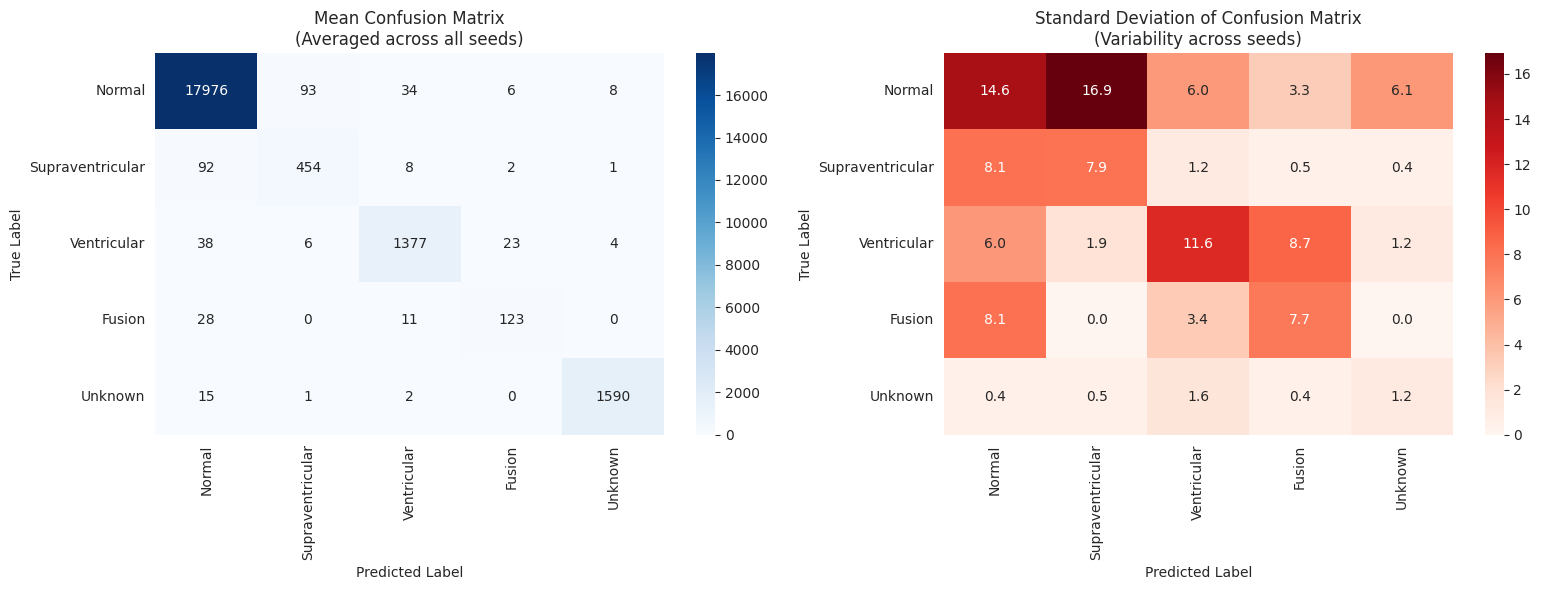

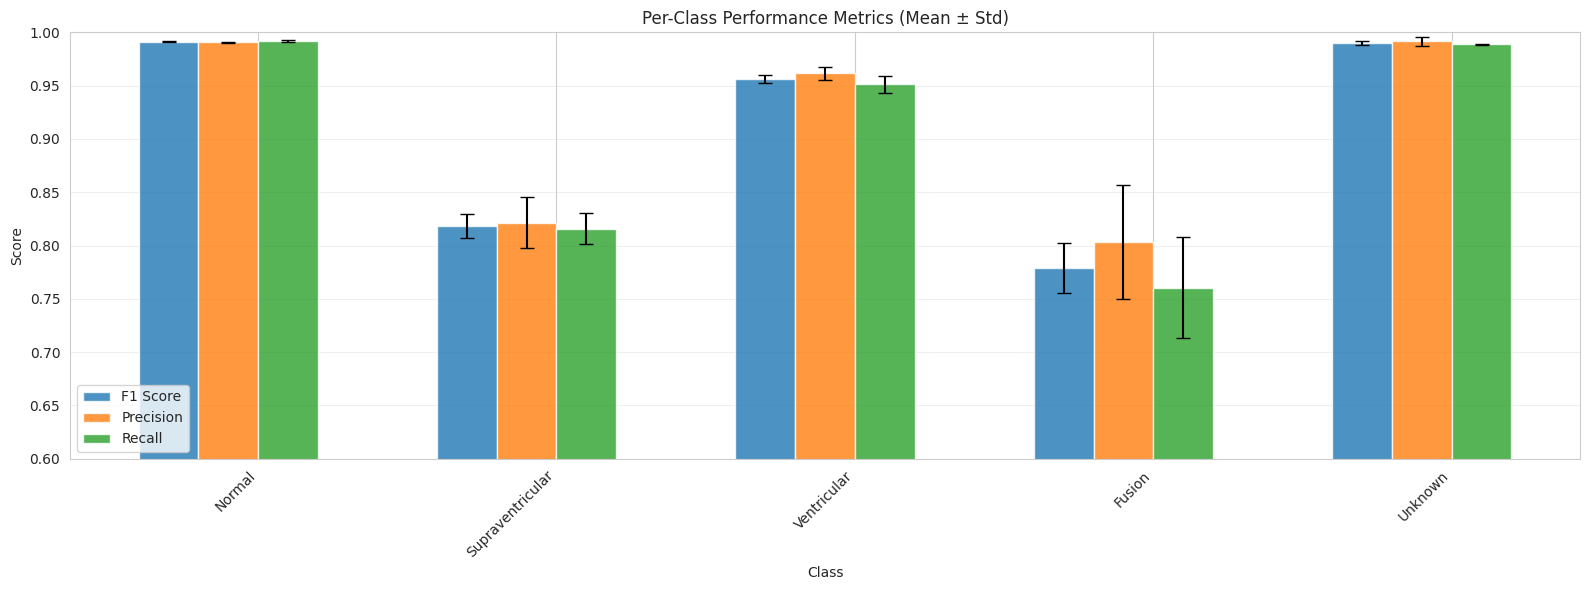

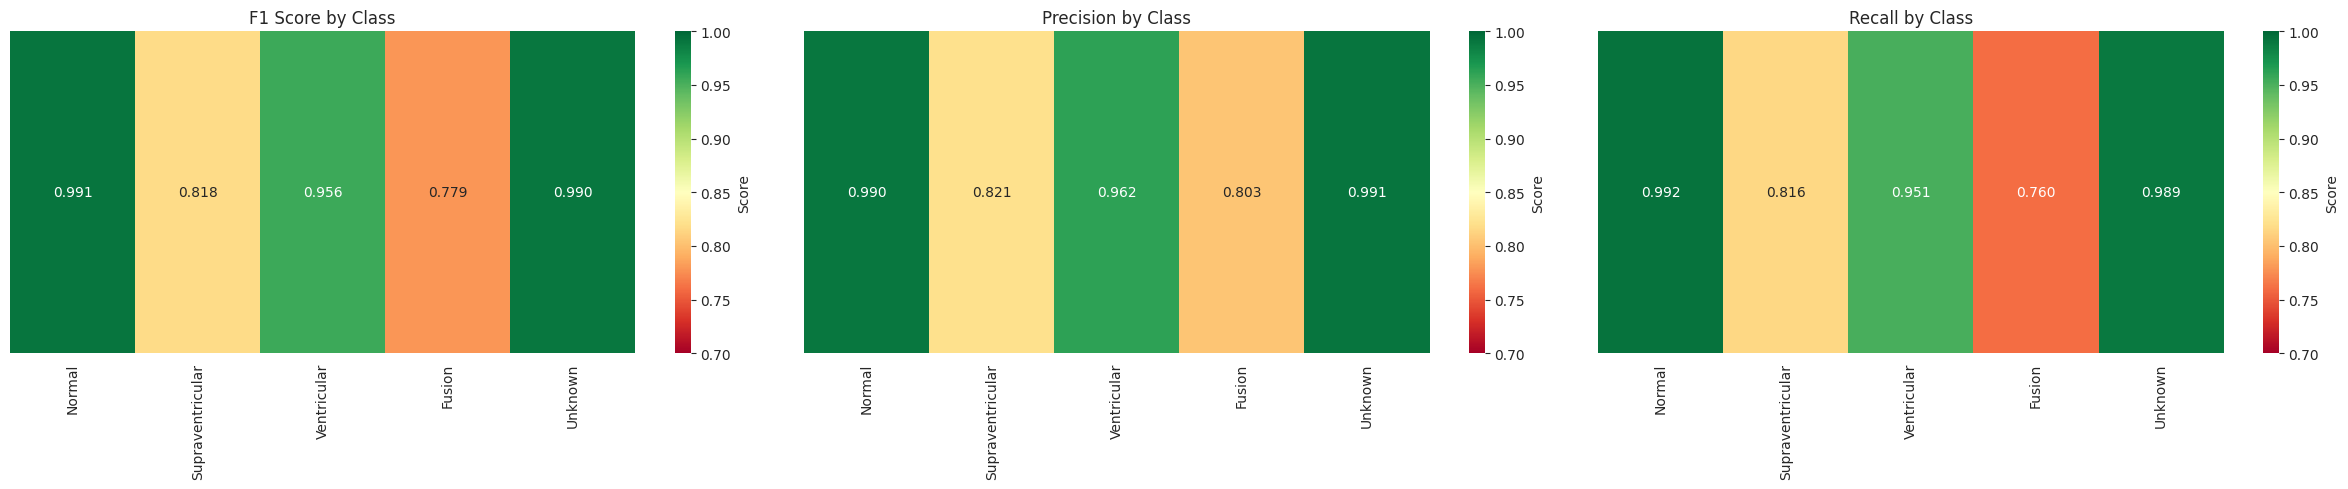

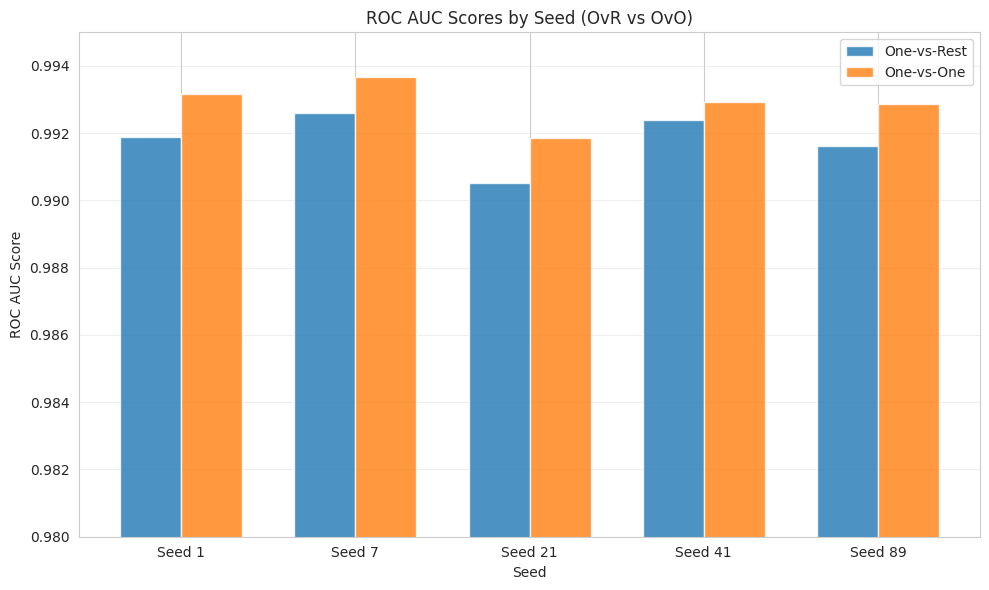


SUMMARY STATISTICS
           Metric       Mean       Std        Min        Max
         Accuracy   0.982998  0.000843   0.981866   0.984012
         F1 Macro   0.906963  0.006030   0.896974   0.914333
        Precision   0.913667  0.010738   0.899424   0.929890
           Recall   0.901679  0.009635   0.889328   0.912265
      Specificity   0.988949  0.000851   0.987593   0.990002
             Loss   0.021248  0.001731   0.018501   0.023347
    ROC AUC (OvR)   0.991800  0.000727   0.990518   0.992596
    ROC AUC (OvO)   0.992896  0.000589   0.991867   0.993674
Training Time (s) 168.642401 25.599851 136.060686 210.483462

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.991±0.001          0.990±0.001       0.992±0.001
Supraventricular   0.818±0.011          0.821±0.024       0.816±0.014
     Ventricular   0.956±0.004          0.962±0.006       0.951±0.008
          Fusion   0.779±0.024          0.803±0.053       0.760±0.048
 

In [41]:
output_metrics("../metrics_ECGCNN_MoE.json")

Found 31 metrics files
Loaded: ECGCNN_MoE_none (5 seeds)
Loaded: ECGCNN_1M_rgan (5 seeds)
Loaded: ECGCNN_LSTM_base (5 seeds)
Loaded: ECGCNN_1M_base (5 seeds)
Loaded: ECGCNN_MoE_smote (5 seeds)
Loaded: ECGCNN_smote (5 seeds)
Loaded: ECGCNN_MoE_Small_LSTM_base (5 seeds)
Loaded: ECGCNN_5M_base (5 seeds)
Loaded: ECGCNN_MoE_Small_smote (5 seeds)
Loaded: ECGCNN_3M_rgan (5 seeds)
Loaded: ECGCNN_5M_rgan (5 seeds)
Loaded: ECGCNN_MoE_Small_LSTM_rgan (5 seeds)
Loaded: ECGCNN_MoE_Small_LSTM_smote (5 seeds)
Loaded: ECGCNN_MoE_Small_base (5 seeds)
Loaded: ECGCNN_base (5 seeds)
Loaded: ECGCNN_4M_rgan (5 seeds)
Loaded: ECGCNN_MoE_LSTM_rgan (5 seeds)
Loaded: ECGCNN_4M_base (5 seeds)
Loaded: ECGCNN_rgan (5 seeds)
Loaded: ECGCNN_3M_base (5 seeds)
Loaded: ECGCNN_MoE_Small_rgan (5 seeds)
Loaded: ECGCNN_none (5 seeds)
Loaded: ECGCNN_MoE_base (5 seeds)
Loaded: ECGCNN_MoE_rgan (5 seeds)
Loaded: ECGCNN_LSTM_smote (5 seeds)
Loaded: ECGCNN_1M_smote (5 seeds)
Loaded: ECGCNN_MoE_LSTM_base (5 seeds)
Loaded: ECGCNN_

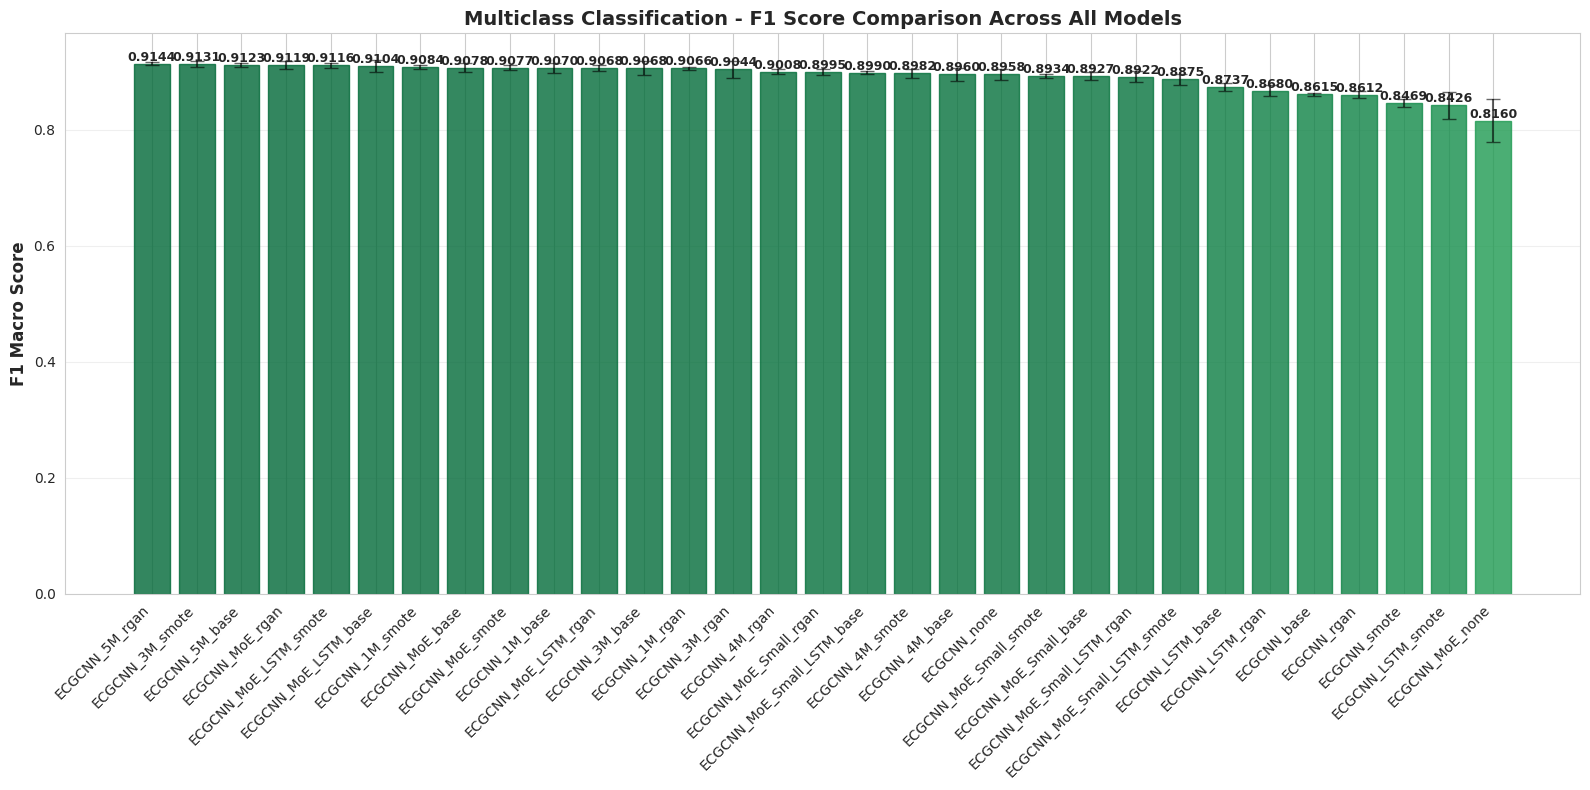

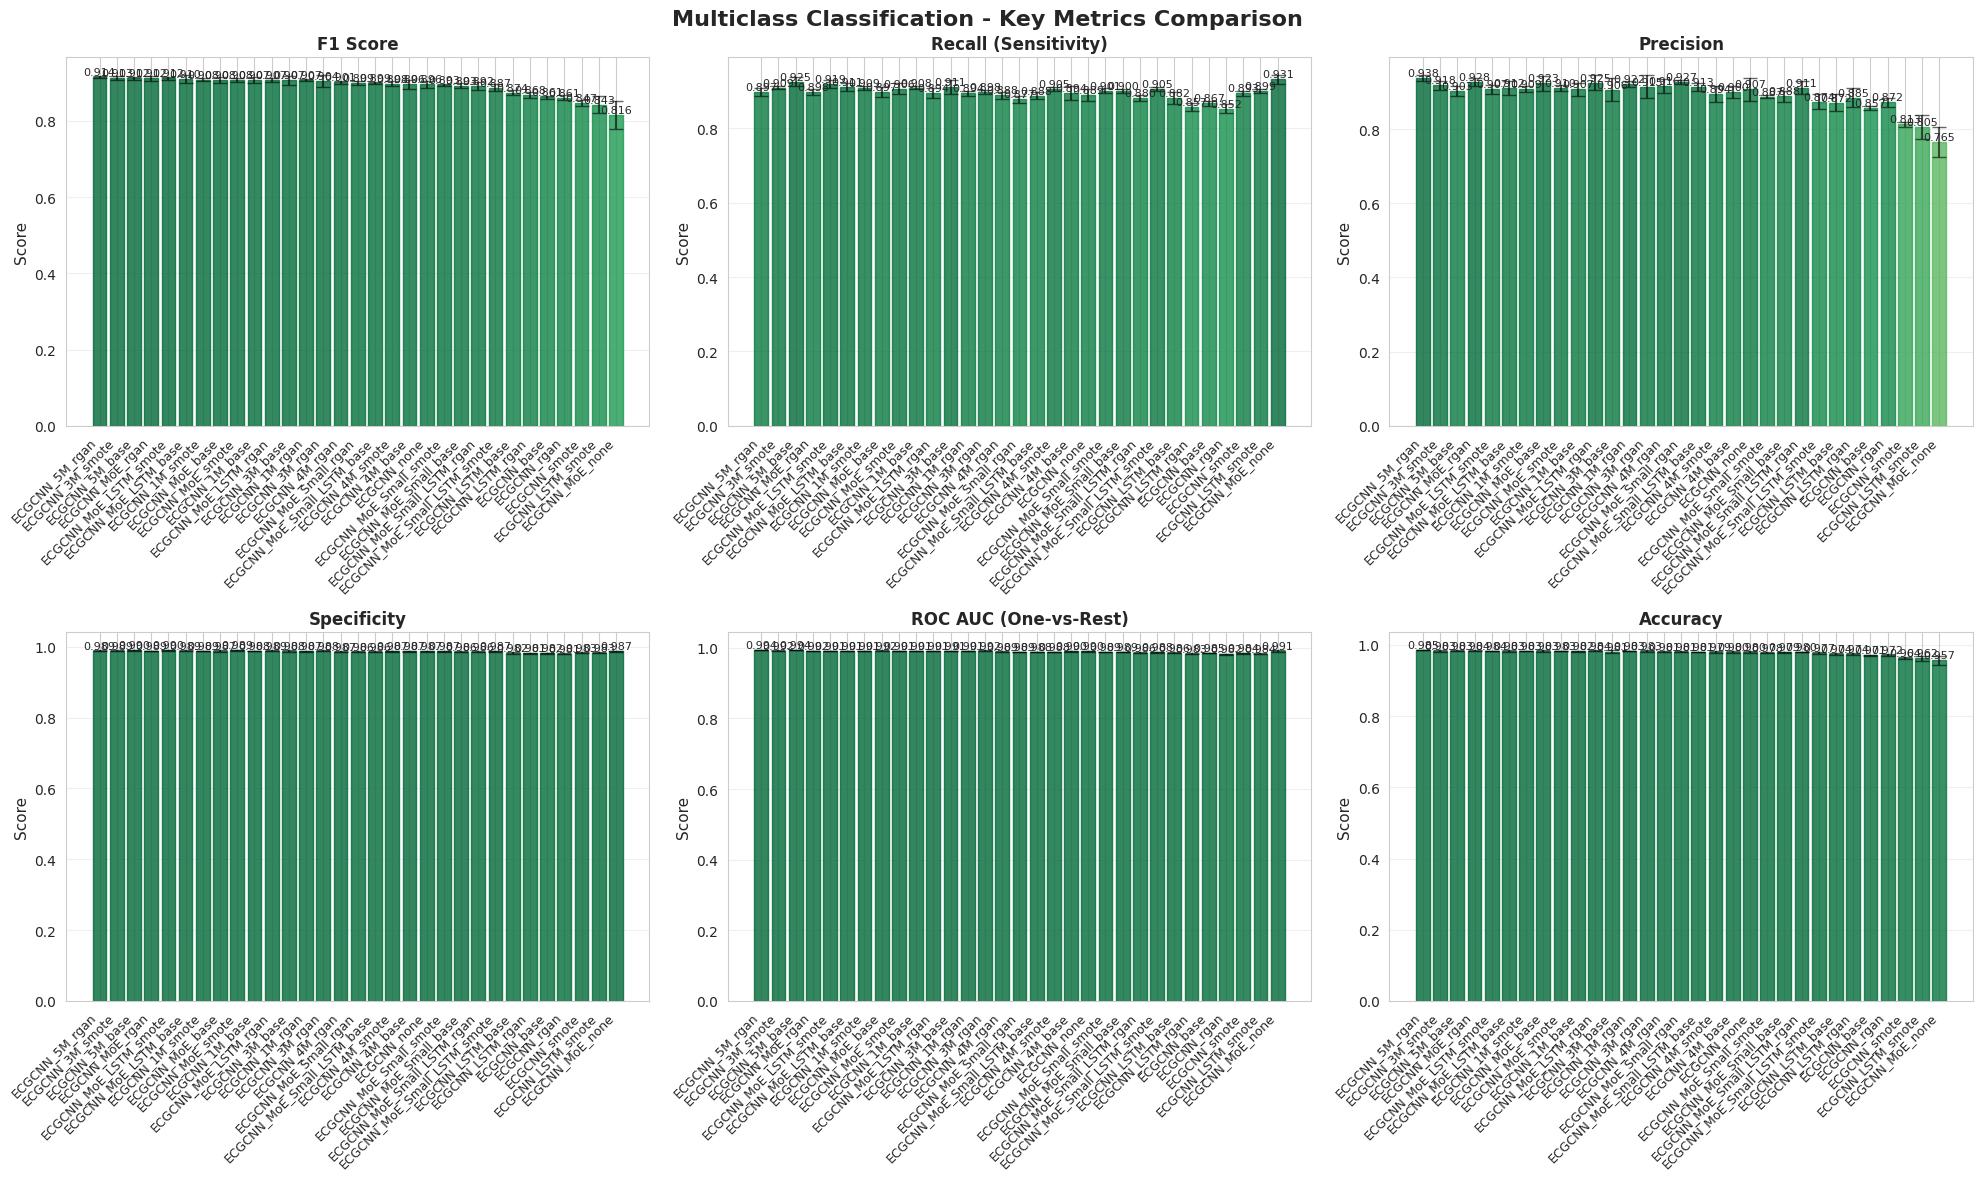

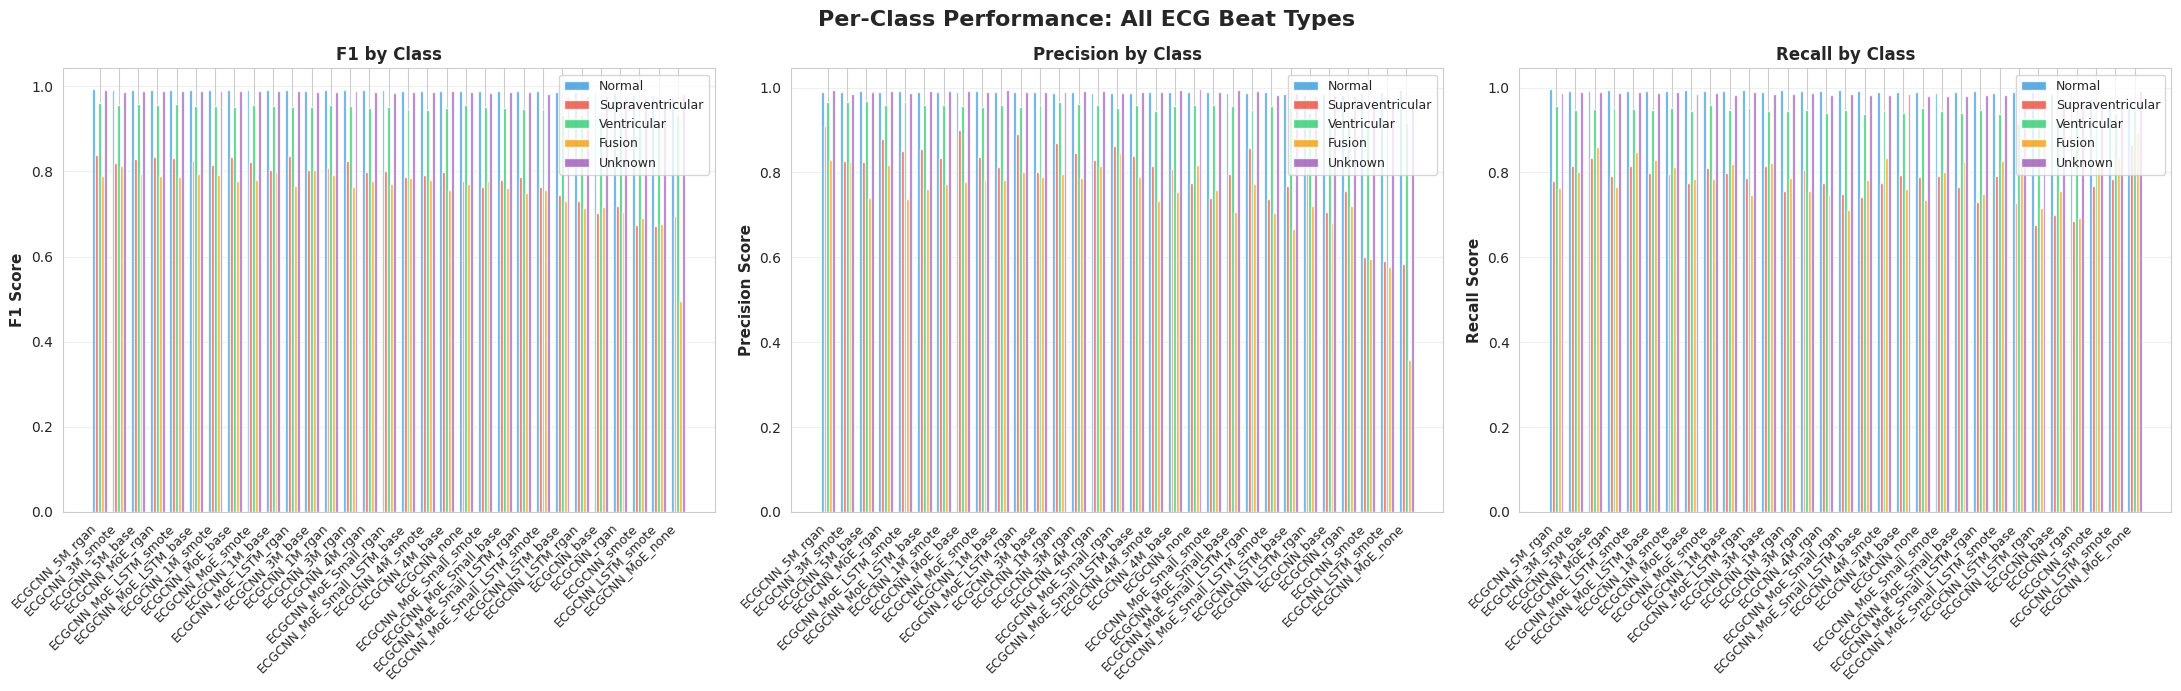

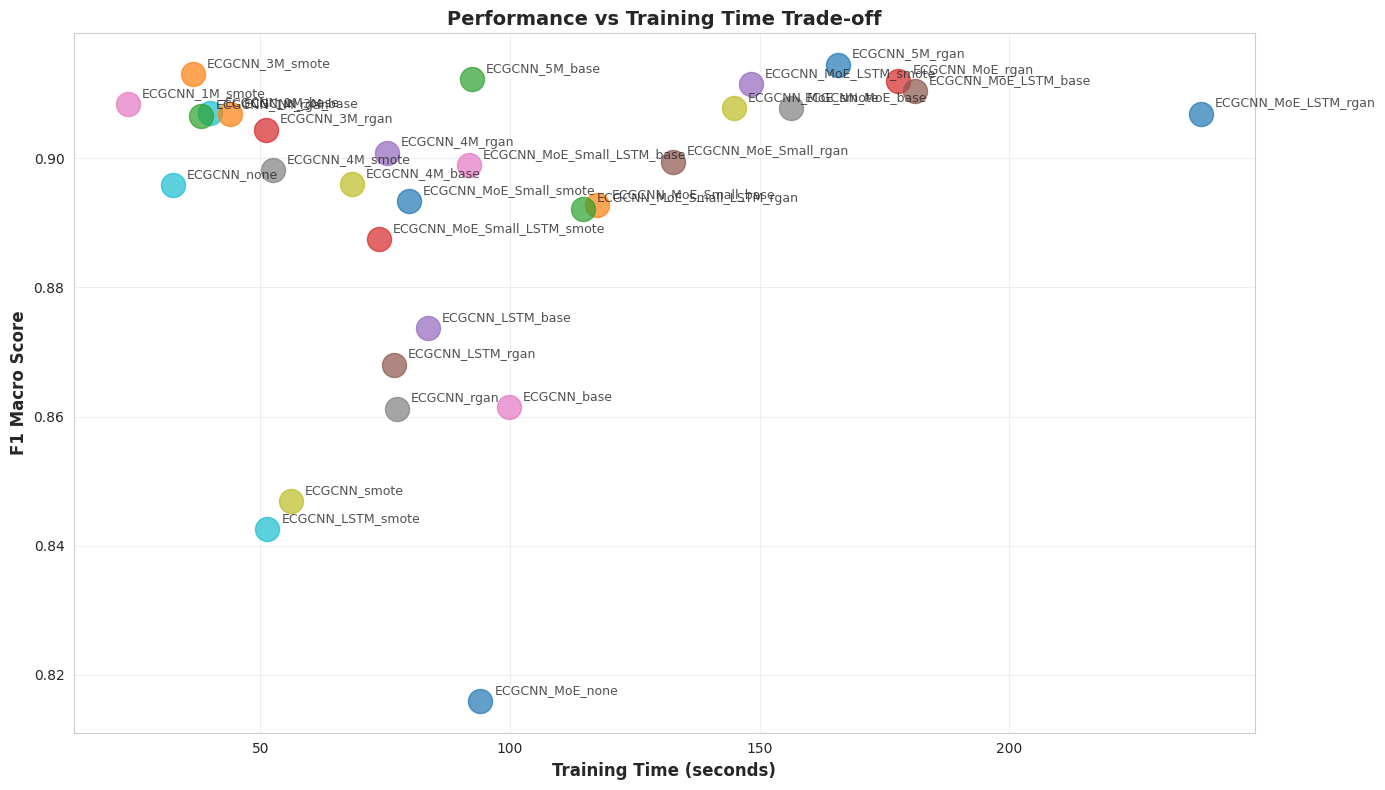

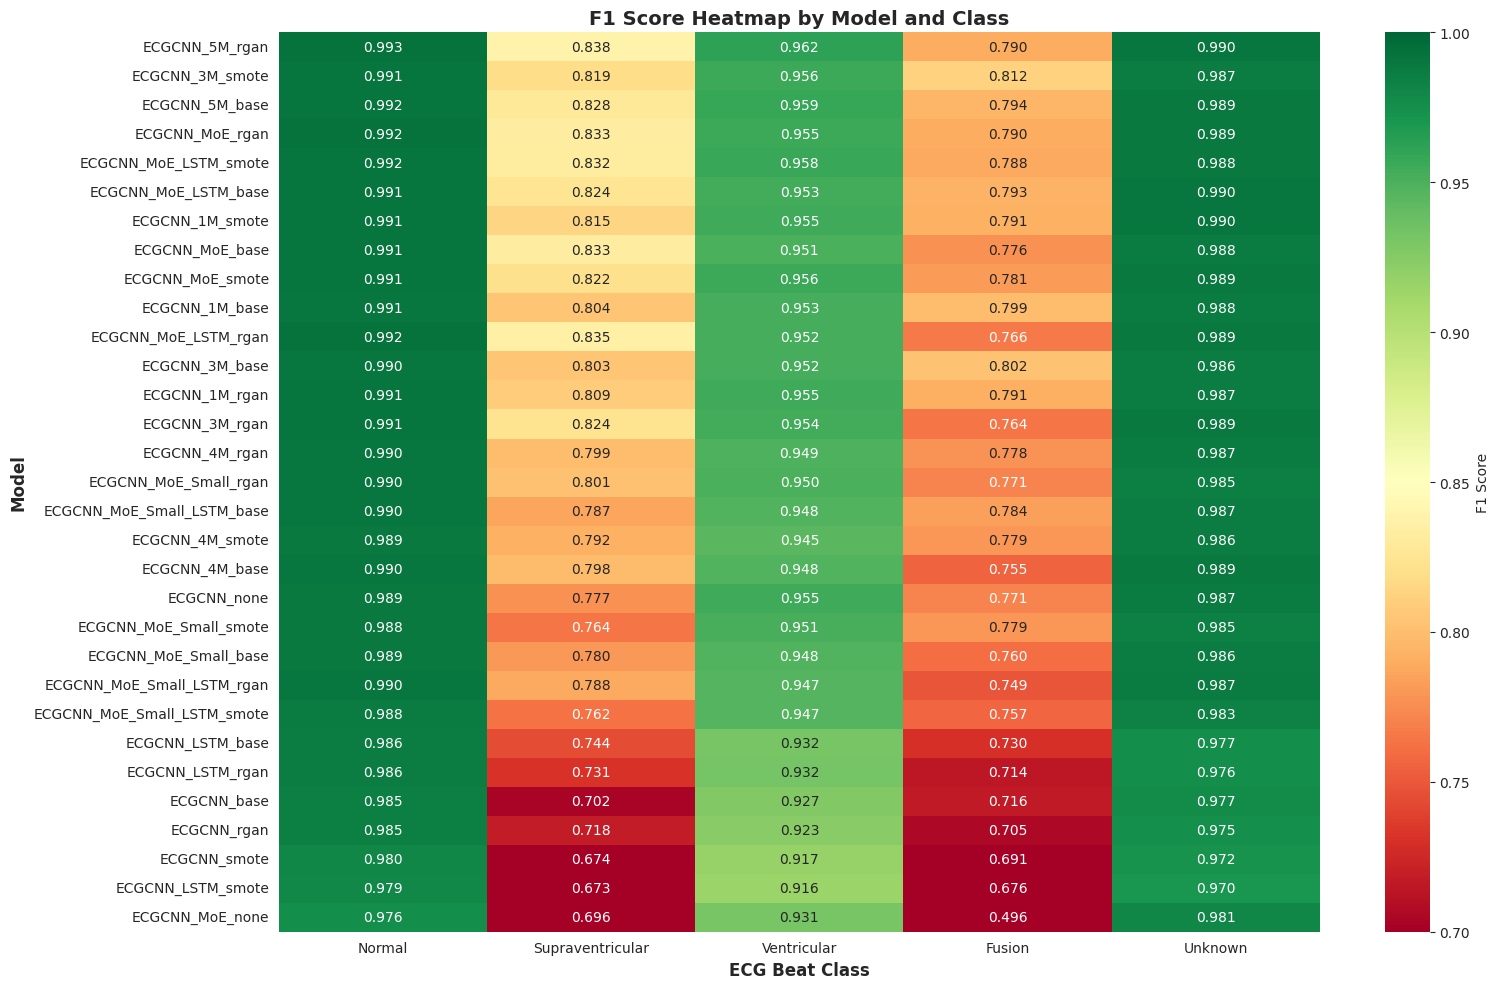

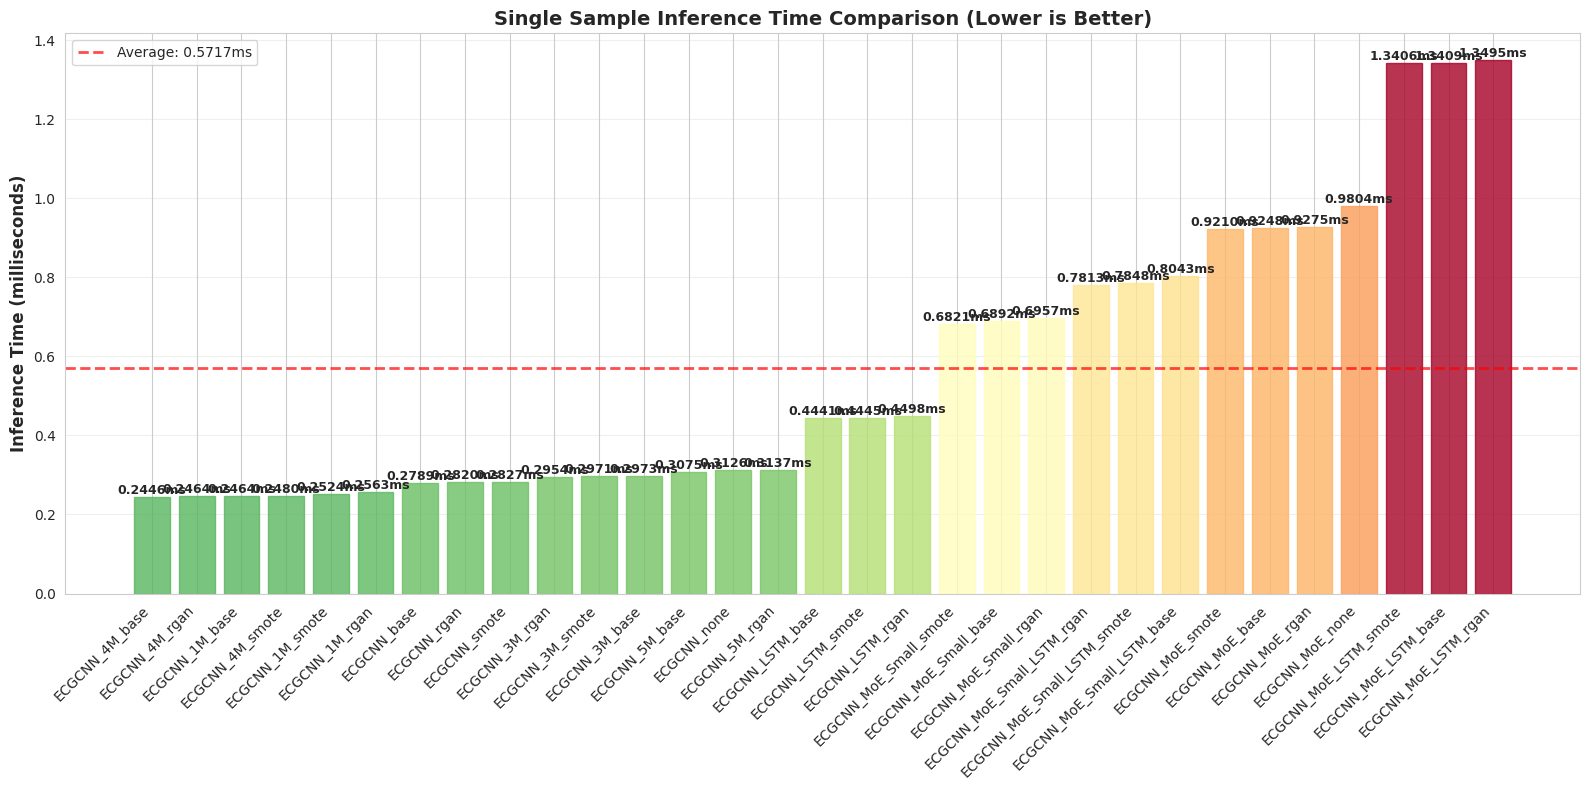


INFERENCE TIME STATISTICS
                      Model  F1_mean Inference_time_ms
             ECGCNN_4M_base 0.896013            0.2446
             ECGCNN_1M_base 0.906984            0.2464
             ECGCNN_4M_rgan 0.900828            0.2464
            ECGCNN_4M_smote 0.898153            0.2480
            ECGCNN_1M_smote 0.908351            0.2524
             ECGCNN_1M_rgan 0.906603            0.2563
                ECGCNN_base 0.861472            0.2789
                ECGCNN_rgan 0.861152            0.2820
               ECGCNN_smote 0.846859            0.2827
             ECGCNN_3M_rgan 0.904406            0.2954
            ECGCNN_3M_smote 0.913051            0.2971
             ECGCNN_3M_base 0.906790            0.2973
             ECGCNN_5M_base 0.912314            0.3075
                ECGCNN_none 0.895805            0.3126
             ECGCNN_5M_rgan 0.914408            0.3137
           ECGCNN_LSTM_base 0.873749            0.4441
          ECGCNN_LSTM_smote 0.842607  

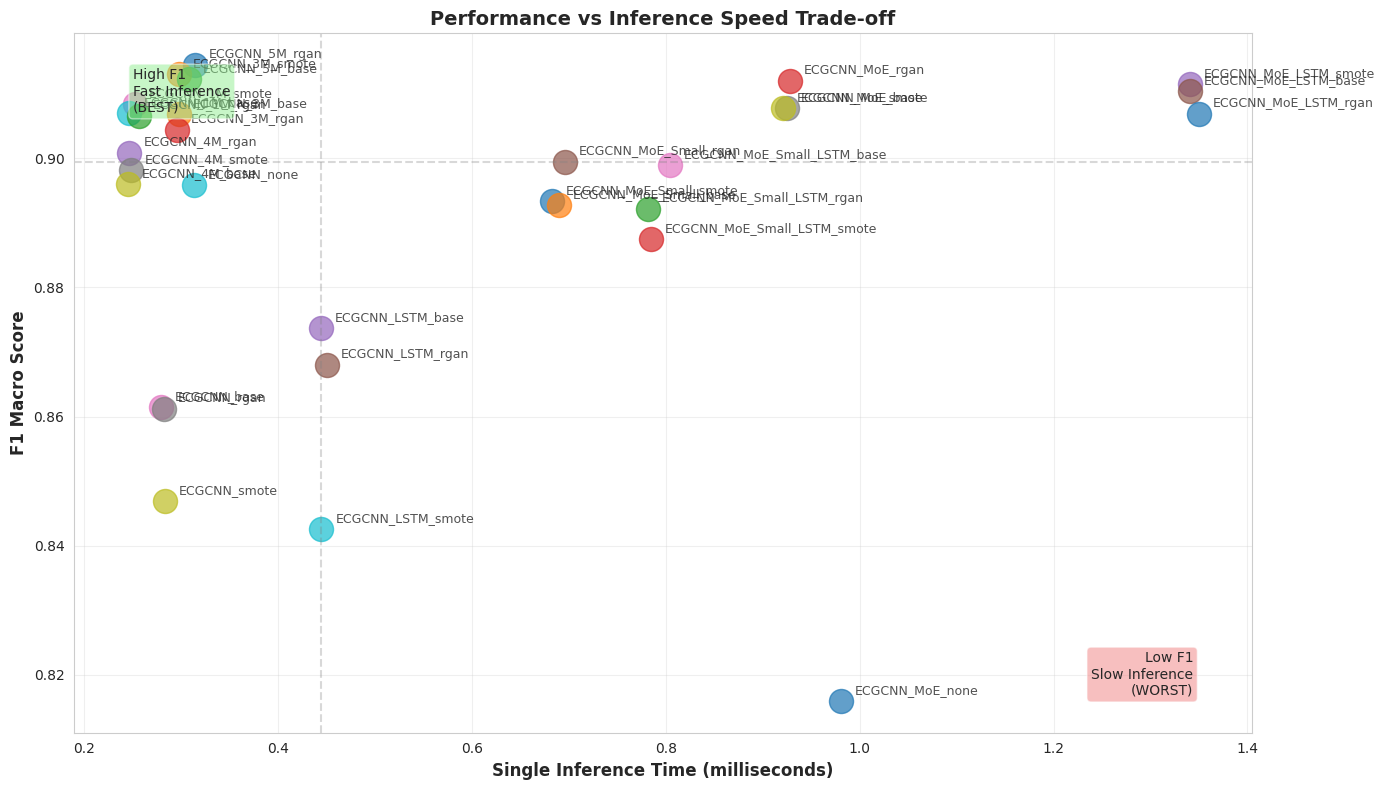

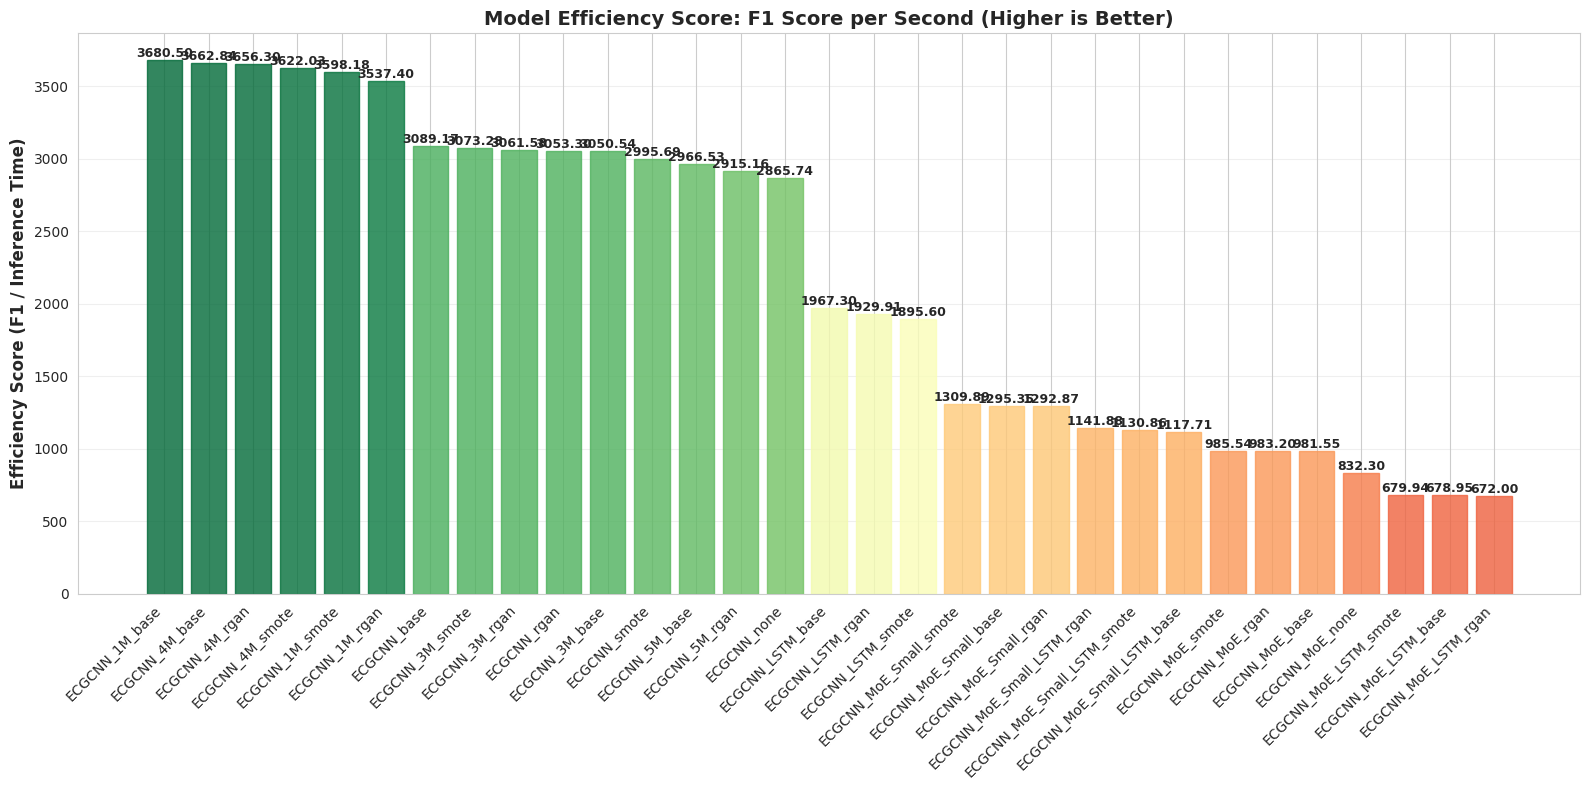


TOP 5 MOST EFFICIENT MODELS (F1 Score / Inference Time)
          Model        F1 Macro  Inference_time_ms  Efficiency_score
 ECGCNN_1M_base 0.9070 ± 0.0083           0.246429       3680.501892
 ECGCNN_4M_base 0.8960 ± 0.0113           0.244622       3662.844369
 ECGCNN_4M_rgan 0.9008 ± 0.0040           0.246377       3656.297646
ECGCNN_4M_smote 0.8982 ± 0.0078           0.247970       3622.028732
ECGCNN_1M_smote 0.9084 ± 0.0032           0.252447       3598.181276


/tmp/ipykernel_5361/441208272.py:581: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


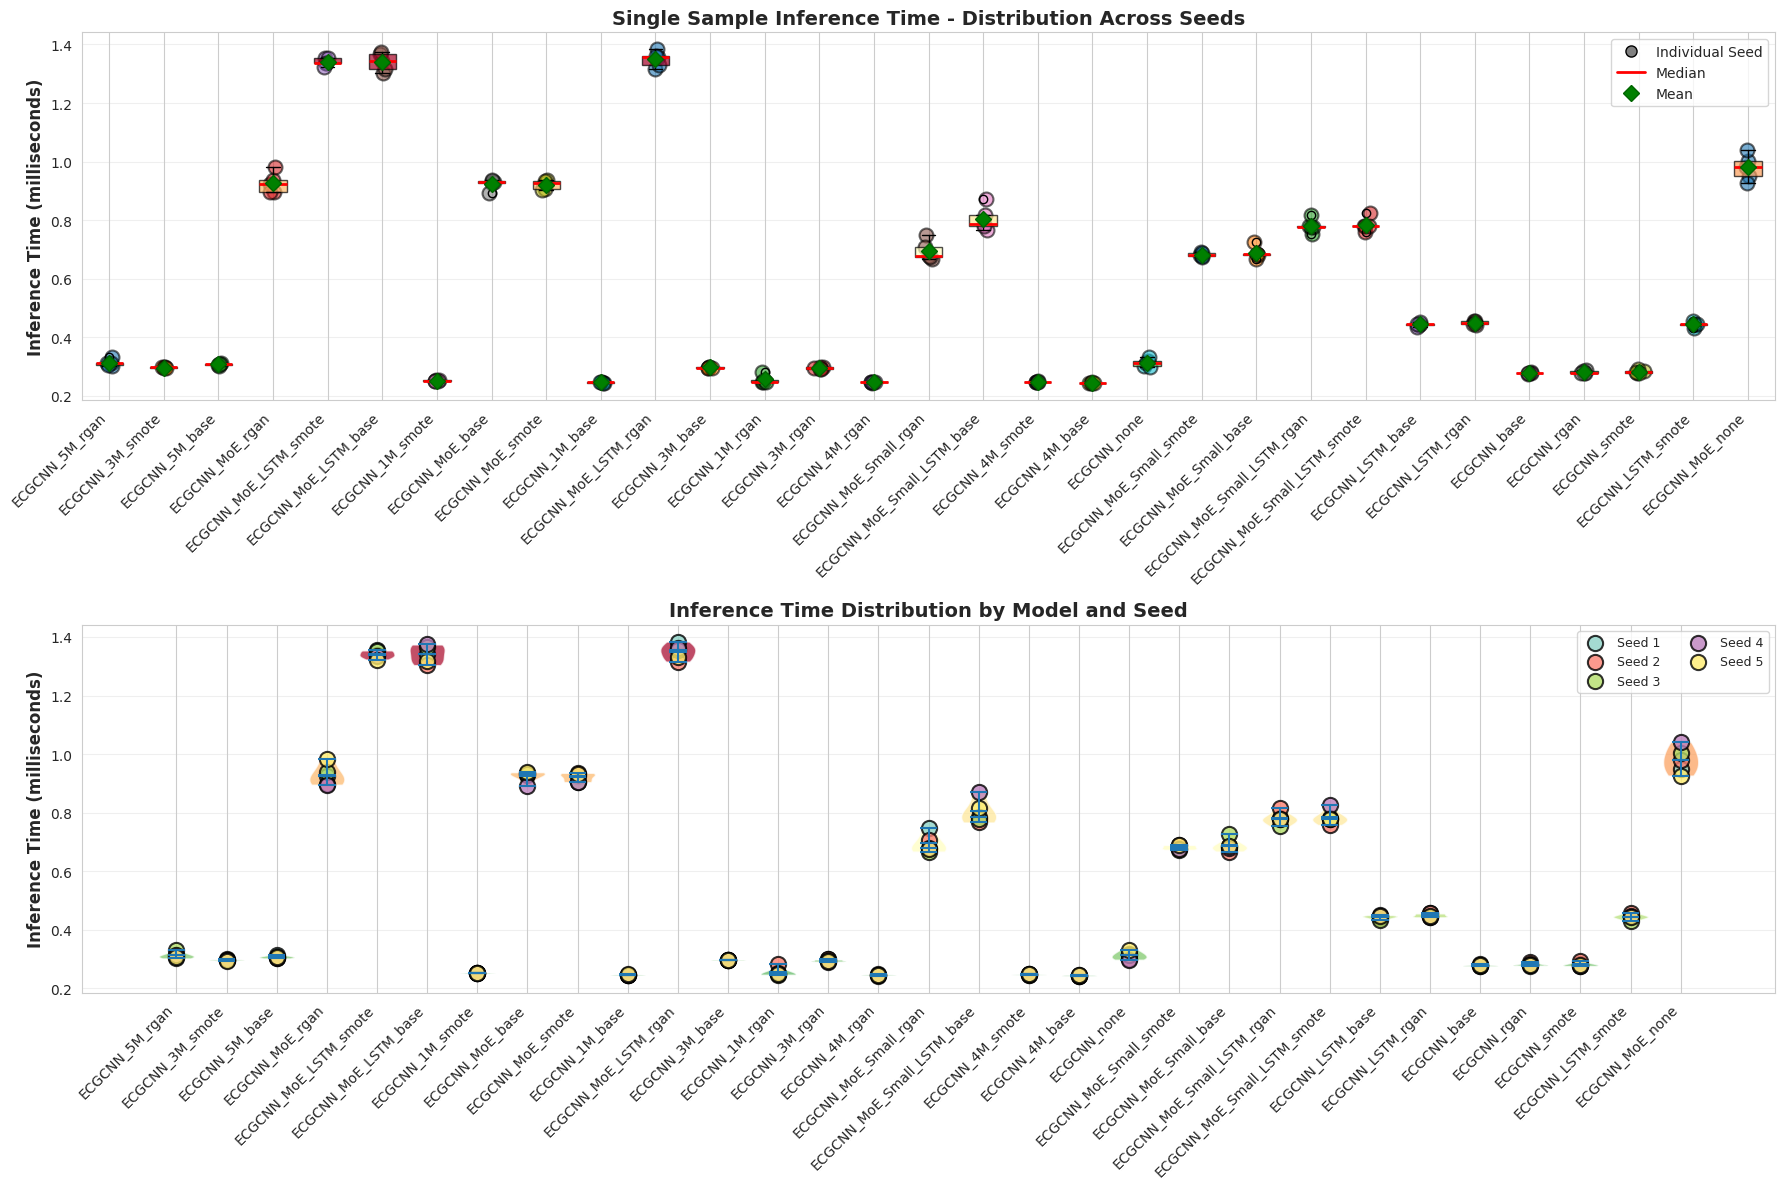


INFERENCE TIME STATISTICS PER SEED (milliseconds)
                      Model Seed 1 Seed 2 Seed 3 Seed 4 Seed 5   Mean    Std    Min    Max  Range   CV%
             ECGCNN_5M_rgan 0.3026 0.3129 0.3329 0.3135 0.3065 0.3137 0.0104 0.3026 0.3329 0.0303 3.32%
            ECGCNN_3M_smote 0.2984 0.2992 0.2978 0.2960 0.2940 0.2971 0.0019 0.2940 0.2992 0.0052 0.63%
             ECGCNN_5M_base 0.3137 0.3086 0.3042 0.3026 0.3086 0.3075 0.0039 0.3026 0.3137 0.0111 1.27%
            ECGCNN_MoE_rgan 0.9246 0.8976 0.9376 0.8956 0.9820 0.9275 0.0316 0.8956 0.9820 0.0863 3.41%
      ECGCNN_MoE_LSTM_smote 1.3542 1.3367 1.3533 1.3361 1.3230 1.3406 0.0118 1.3230 1.3542 0.0312 0.88%
       ECGCNN_MoE_LSTM_base 1.3423 1.3038 1.3665 1.3744 1.3178 1.3409 0.0272 1.3038 1.3744 0.0706 2.03%
            ECGCNN_1M_smote 0.2542 0.2540 0.2513 0.2513 0.2515 0.2524 0.0013 0.2513 0.2542 0.0029 0.53%
            ECGCNN_MoE_base 0.9275 0.9353 0.9309 0.8920 0.9384 0.9248 0.0168 0.8920 0.9384 0.0464 1.82%
           EC

/tmp/ipykernel_5361/441208272.py:757: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


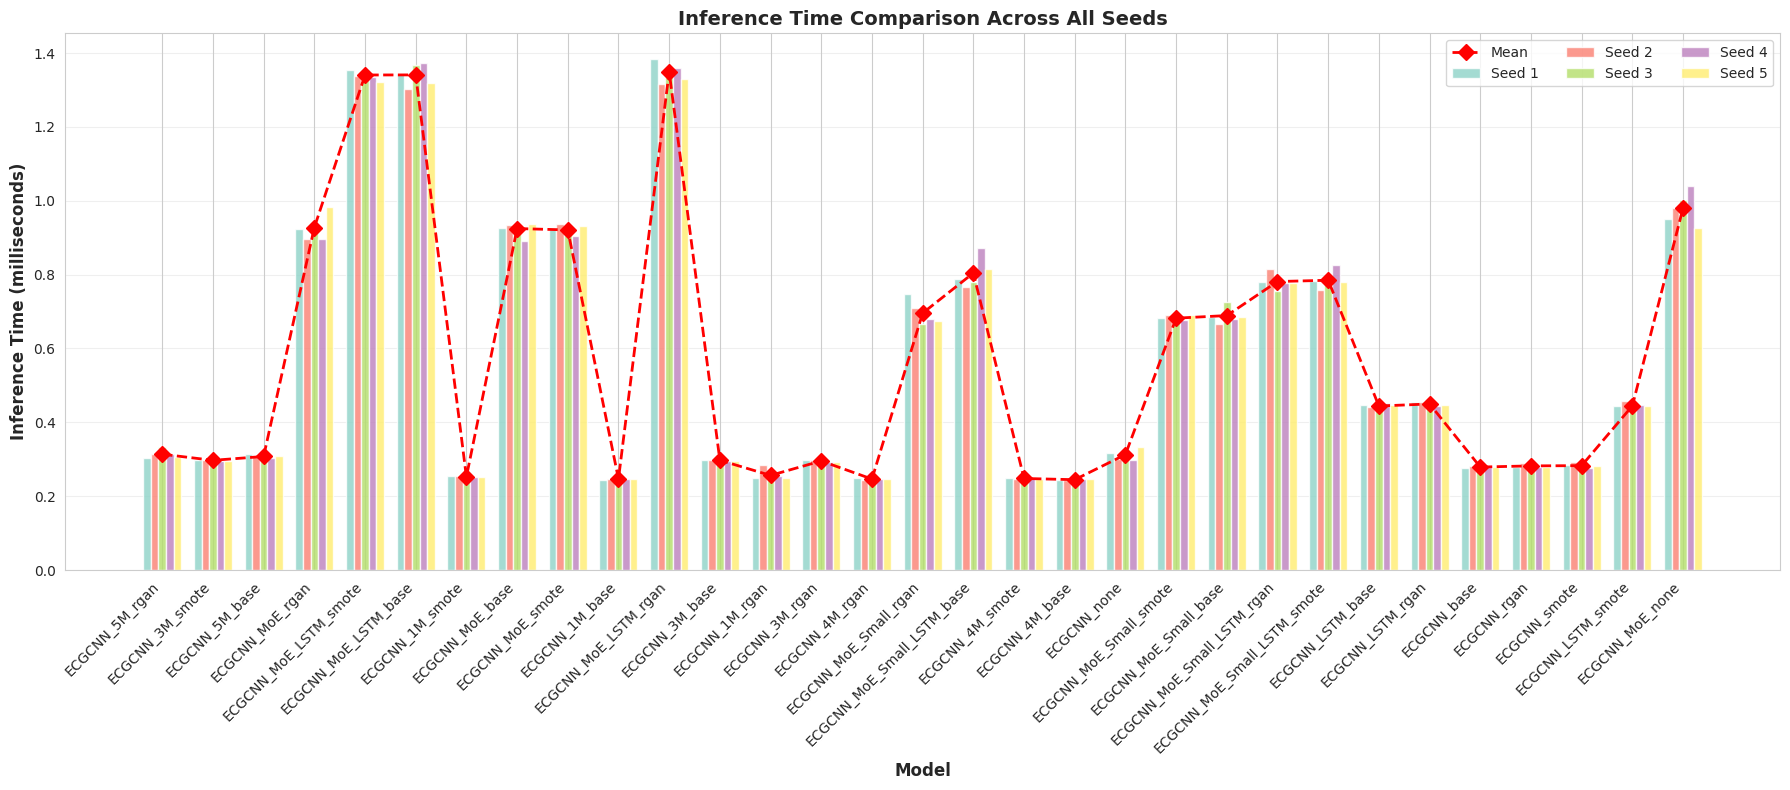


INFERENCE TIME CONSISTENCY ANALYSIS
                      Model  Mean (ms)  Std (ms)     CV % Consistency
             ECGCNN_3M_base   0.297256  0.000957 0.321883        High
            ECGCNN_4M_smote   0.247970  0.000900 0.362906        High
             ECGCNN_1M_base   0.246429  0.001044 0.423625        High
             ECGCNN_4M_base   0.244622  0.001136 0.464461        High
             ECGCNN_4M_rgan   0.246377  0.001302 0.528275        High
            ECGCNN_1M_smote   0.252447  0.001348 0.533869        High
            ECGCNN_3M_smote   0.297093  0.001860 0.625932        High
                ECGCNN_base   0.278869  0.002302 0.825415        High
      ECGCNN_MoE_LSTM_smote   1.340647  0.011762 0.877367        High
     ECGCNN_MoE_Small_smote   0.682058  0.006704 0.982879        High
             ECGCNN_3M_rgan   0.295405  0.003011 1.019126      Medium
           ECGCNN_LSTM_rgan   0.449762  0.005479 1.218299      Medium
           ECGCNN_LSTM_base   0.444136  0.005474 1.23

In [3]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import glob

# Set style
sns.set_style("whitegrid")

# ============================================================================
# 1. LOAD ALL METRICS FILES
# ============================================================================

metrics_multiclass_folder = Path("../metrics_multiclass")
all_metrics = {}

# Load all JSON files from the metrics_multiclass folder
json_files = glob.glob(str(metrics_multiclass_folder / "*.json"))

print(f"Found {len(json_files)} metrics files")

for file_path in json_files:
    with open(file_path, "r") as f:
        data = json.load(f)

        # Extract model name and augmentation technique from config
        if data and len(data) > 0:
            config = data[0]["config"]
            model_name = config["model"]
            aug_technique = config["augmentation_technique"]

            # Create unique identifier
            unique_name = f"{model_name}_{aug_technique}"
            all_metrics[unique_name] = data
            print(f"Loaded: {unique_name} ({len(data)} seeds)")

print(f"\nTotal models loaded: {len(all_metrics)}")

# ============================================================================
# 2. EXTRACT AGGREGATE STATISTICS
# ============================================================================


def get_multiclass_stats(metrics_data, model_name):
    """Extract mean and std for multiclass classification metrics"""
    accuracies = [entry["metrics"]["accuracy"] for entry in metrics_data]
    f1_macros = [entry["metrics"]["f1_macro"] for entry in metrics_data]
    precision_macros = [entry["metrics"]["precision_macro"] for entry in metrics_data]
    recall_macros = [entry["metrics"]["recall_macro"] for entry in metrics_data]
    specificity_macros = [
        entry["metrics"]["specificity_macro"] for entry in metrics_data
    ]
    losses = [entry["metrics"]["avg_loss"] for entry in metrics_data]
    training_times = [entry["training_time"] for entry in metrics_data]
    roc_auc_ovr = [entry["metrics"]["roc_auc_ovr"] for entry in metrics_data]
    roc_auc_ovo = [entry["metrics"]["roc_auc_ovo"] for entry in metrics_data]

    # Per-class metrics (5 classes: Normal, Supraventricular, Ventricular, Fusion, Unknown)
    f1_per_class = np.array(
        [entry["metrics"]["f1_per_class"] for entry in metrics_data]
    )
    precision_per_class = np.array(
        [entry["metrics"]["precision_per_class"] for entry in metrics_data]
    )
    recall_per_class = np.array(
        [entry["metrics"]["recall_per_class"] for entry in metrics_data]
    )

    return {
        "Model": model_name,
        "Accuracy": f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
        "Accuracy_mean": np.mean(accuracies),
        "Accuracy_std": np.std(accuracies),
        "F1 Macro": f"{np.mean(f1_macros):.4f} ± {np.std(f1_macros):.4f}",
        "F1_mean": np.mean(f1_macros),
        "F1_std": np.std(f1_macros),
        "Precision": f"{np.mean(precision_macros):.4f} ± {np.std(precision_macros):.4f}",
        "Precision_mean": np.mean(precision_macros),
        "Precision_std": np.std(precision_macros),
        "Recall": f"{np.mean(recall_macros):.4f} ± {np.std(recall_macros):.4f}",
        "Recall_mean": np.mean(recall_macros),
        "Recall_std": np.std(recall_macros),
        "Specificity": f"{np.mean(specificity_macros):.4f} ± {np.std(specificity_macros):.4f}",
        "Specificity_mean": np.mean(specificity_macros),
        "Specificity_std": np.std(specificity_macros),
        "ROC AUC (OvR)": f"{np.mean(roc_auc_ovr):.4f} ± {np.std(roc_auc_ovr):.4f}",
        "ROC_AUC_OvR_mean": np.mean(roc_auc_ovr),
        "ROC_AUC_OvR_std": np.std(roc_auc_ovr),
        "ROC AUC (OvO)": f"{np.mean(roc_auc_ovo):.4f} ± {np.std(roc_auc_ovo):.4f}",
        "ROC_AUC_OvO_mean": np.mean(roc_auc_ovo),
        "ROC_AUC_OvO_std": np.std(roc_auc_ovo),
        "Loss": f"{np.mean(losses):.4f} ± {np.std(losses):.4f}",
        "Loss_mean": np.mean(losses),
        "Loss_std": np.std(losses),
        "Training Time": f"{np.mean(training_times):.2f} ± {np.std(training_times):.2f}",
        "Training_time_mean": np.mean(training_times),
        # Per-class metrics
        "F1_Normal_mean": np.mean(f1_per_class[:, 0]),
        "F1_Supraventricular_mean": np.mean(f1_per_class[:, 1]),
        "F1_Ventricular_mean": np.mean(f1_per_class[:, 2]),
        "F1_Fusion_mean": np.mean(f1_per_class[:, 3]),
        "F1_Unknown_mean": np.mean(f1_per_class[:, 4]),
        "Recall_Normal_mean": np.mean(recall_per_class[:, 0]),
        "Recall_Supraventricular_mean": np.mean(recall_per_class[:, 1]),
        "Recall_Ventricular_mean": np.mean(recall_per_class[:, 2]),
        "Recall_Fusion_mean": np.mean(recall_per_class[:, 3]),
        "Recall_Unknown_mean": np.mean(recall_per_class[:, 4]),
        "Precision_Normal_mean": np.mean(precision_per_class[:, 0]),
        "Precision_Supraventricular_mean": np.mean(precision_per_class[:, 1]),
        "Precision_Ventricular_mean": np.mean(precision_per_class[:, 2]),
        "Precision_Fusion_mean": np.mean(precision_per_class[:, 3]),
        "Precision_Unknown_mean": np.mean(precision_per_class[:, 4]),
    }


# Create comparison dataframe
comparison_data = [
    get_multiclass_stats(data, name) for name, data in all_metrics.items()
]
comparison_df = pd.DataFrame(comparison_data)

# Sort by F1 Macro score
comparison_df = comparison_df.sort_values("F1_mean", ascending=False)

# Display summary table
print("\n" + "=" * 170)
print("MULTICLASS CLASSIFICATION MODEL COMPARISON - ALL MODELS")
print("=" * 170)
display_df = comparison_df[
    [
        "Model",
        "Accuracy",
        "F1 Macro",
        "Precision",
        "Recall",
        "Specificity",
        "ROC AUC (OvR)",
        "Loss",
        "Training Time",
    ]
]
print(display_df.to_string(index=False))
print("=" * 170)

# ============================================================================
# 3. VISUALIZATIONS
# ============================================================================

# 3a. F1 Score Comparison (Main Focus)
fig, ax = plt.subplots(figsize=(16, 8))

models = comparison_df["Model"]
f1_means = comparison_df["F1_mean"]
f1_stds = comparison_df["F1_std"]

x = np.arange(len(models))
bars = ax.bar(x, f1_means, alpha=0.8)

# Color by performance
colors = plt.cm.RdYlGn(f1_means / f1_means.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add error bars
ax.errorbar(x, f1_means, yerr=f1_stds, fmt="none", color="black", capsize=5, alpha=0.6)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, f1_means)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("F1 Macro Score", fontsize=12, fontweight="bold")
ax.set_title(
    "Multiclass Classification - F1 Score Comparison Across All Models",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# 3b. Multi-Metric Comparison (F1, Recall, Precision, Specificity)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle(
    "Multiclass Classification - Key Metrics Comparison", fontsize=16, fontweight="bold"
)

metrics_to_plot = [
    ("F1_mean", "F1_std", "F1 Score"),
    ("Recall_mean", "Recall_std", "Recall (Sensitivity)"),
    ("Precision_mean", "Precision_std", "Precision"),
    ("Specificity_mean", "Specificity_std", "Specificity"),
    ("ROC_AUC_OvR_mean", "ROC_AUC_OvR_std", "ROC AUC (One-vs-Rest)"),
    ("Accuracy_mean", "Accuracy_std", "Accuracy"),
]

for idx, (mean_col, std_col, title) in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]

    means = comparison_df[mean_col]
    stds = comparison_df[std_col]

    bars = ax.bar(x, means, alpha=0.8)

    # Color by performance
    colors = plt.cm.RdYlGn(means / means.max())
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    # Add error bars
    ax.errorbar(x, means, yerr=stds, fmt="none", color="black", capsize=5, alpha=0.6)

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, means)):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{val:.3f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel("Score", fontsize=11)
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# 3c. Per-Class Performance (All 5 Classes)
class_names = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"]

fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle(
    "Per-Class Performance: All ECG Beat Types",
    fontsize=16,
    fontweight="bold",
)

metrics_per_class = [
    (
        "F1",
        [
            "F1_Normal_mean",
            "F1_Supraventricular_mean",
            "F1_Ventricular_mean",
            "F1_Fusion_mean",
            "F1_Unknown_mean",
        ],
    ),
    (
        "Precision",
        [
            "Precision_Normal_mean",
            "Precision_Supraventricular_mean",
            "Precision_Ventricular_mean",
            "Precision_Fusion_mean",
            "Precision_Unknown_mean",
        ],
    ),
    (
        "Recall",
        [
            "Recall_Normal_mean",
            "Recall_Supraventricular_mean",
            "Recall_Ventricular_mean",
            "Recall_Fusion_mean",
            "Recall_Unknown_mean",
        ],
    ),
]

class_colors = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6"]

for ax_idx, (metric_name, cols) in enumerate(metrics_per_class):
    ax = axes[ax_idx]

    width = 0.15
    x_pos = np.arange(len(models))

    for class_idx, (class_name, col, color) in enumerate(
        zip(class_names, cols, class_colors)
    ):
        offset = (class_idx - 2) * width
        values = comparison_df[col]
        ax.bar(x_pos + offset, values, width, label=class_name, alpha=0.8, color=color)

    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel(f"{metric_name} Score", fontsize=11, fontweight="bold")
    ax.set_title(f"{metric_name} by Class", fontsize=12, fontweight="bold")
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# 3d. Performance vs Training Time Trade-off
fig, ax = plt.subplots(figsize=(14, 8))

for idx, row in comparison_df.iterrows():
    ax.scatter(
        row["Training_time_mean"],
        row["F1_mean"],
        s=300,
        alpha=0.7,
    )
    ax.annotate(
        row["Model"],
        (row["Training_time_mean"], row["F1_mean"]),
        xytext=(10, 5),
        textcoords="offset points",
        fontsize=9,
        alpha=0.8,
    )

ax.set_xlabel("Training Time (seconds)", fontsize=12, fontweight="bold")
ax.set_ylabel("F1 Macro Score", fontsize=12, fontweight="bold")
ax.set_title("Performance vs Training Time Trade-off", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3e. Per-Class Performance Heatmap
fig, ax = plt.subplots(figsize=(16, 10))

# Create heatmap data: models x classes for F1 scores
f1_heatmap_data = comparison_df[
    [
        "F1_Normal_mean",
        "F1_Supraventricular_mean",
        "F1_Ventricular_mean",
        "F1_Fusion_mean",
        "F1_Unknown_mean",
    ]
].values

sns.heatmap(
    f1_heatmap_data,
    annot=True,
    fmt=".3f",
    cmap="RdYlGn",
    xticklabels=class_names,
    yticklabels=comparison_df["Model"],
    ax=ax,
    vmin=0.7,
    vmax=1.0,
    cbar_kws={"label": "F1 Score"},
)

ax.set_title("F1 Score Heatmap by Model and Class", fontsize=14, fontweight="bold")
ax.set_xlabel("ECG Beat Class", fontsize=12, fontweight="bold")
ax.set_ylabel("Model", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

# 3f. Single Inference Time Comparison
fig, ax = plt.subplots(figsize=(16, 8))

# Extract single inference times (convert to milliseconds)
inference_times_ms = []
for model_name in comparison_df["Model"]:
    model_data = all_metrics[model_name]
    avg_inference_time = (
        np.mean([entry["single_inference_time"] for entry in model_data]) * 1000
    )
    inference_times_ms.append(avg_inference_time)

comparison_df["Inference_time_ms"] = inference_times_ms

# Sort by inference time
sorted_indices = np.argsort(inference_times_ms)
sorted_models = [comparison_df["Model"].iloc[i] for i in sorted_indices]
sorted_times = [inference_times_ms[i] for i in sorted_indices]

x_inf = np.arange(len(sorted_models))
bars = ax.bar(x_inf, sorted_times, alpha=0.8)

# Color by inference speed (green = faster)
colors = plt.cm.RdYlGn_r(np.array(sorted_times) / max(sorted_times))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, sorted_times)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}ms",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

ax.set_xticks(x_inf)
ax.set_xticklabels(sorted_models, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_title(
    "Single Sample Inference Time Comparison (Lower is Better)",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")

# Add horizontal line for average
avg_time = np.mean(sorted_times)
ax.axhline(
    y=avg_time,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Average: {avg_time:.4f}ms",
    alpha=0.7,
)
ax.legend()

plt.tight_layout()
plt.show()

# Print inference time statistics
print("\n" + "=" * 100)
print("INFERENCE TIME STATISTICS")
print("=" * 100)
inference_stats = comparison_df[["Model", "F1_mean", "Inference_time_ms"]].copy()
inference_stats["Inference_time_ms"] = inference_stats["Inference_time_ms"].apply(
    lambda x: f"{x:.4f}"
)
inference_stats = inference_stats.sort_values("Inference_time_ms")
print(inference_stats.to_string(index=False))
print("=" * 100)

# 3g. F1 Score vs Inference Time Trade-off
fig, ax = plt.subplots(figsize=(14, 8))

for idx, row in comparison_df.iterrows():
    ax.scatter(
        row["Inference_time_ms"],
        row["F1_mean"],
        s=300,
        alpha=0.7,
    )
    ax.annotate(
        row["Model"],
        (row["Inference_time_ms"], row["F1_mean"]),
        xytext=(10, 5),
        textcoords="offset points",
        fontsize=9,
        alpha=0.8,
    )

ax.set_xlabel("Single Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_ylabel("F1 Macro Score", fontsize=12, fontweight="bold")
ax.set_title("Performance vs Inference Speed Trade-off", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)

# Add quadrant lines
median_f1 = comparison_df["F1_mean"].median()
median_inference = comparison_df["Inference_time_ms"].median()
ax.axhline(y=median_f1, color="gray", linestyle="--", alpha=0.3)
ax.axvline(x=median_inference, color="gray", linestyle="--", alpha=0.3)

# Annotate quadrants
ax.text(
    0.05,
    0.95,
    "High F1\nFast Inference\n(BEST)",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.5),
)
ax.text(
    0.95,
    0.05,
    "Low F1\nSlow Inference\n(WORST)",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="bottom",
    horizontalalignment="right",
    bbox=dict(boxstyle="round", facecolor="lightcoral", alpha=0.5),
)

plt.tight_layout()
plt.show()

# 3h. Efficiency Score (F1 / Inference Time)
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate efficiency score
efficiency_score = comparison_df["F1_mean"] / (
    comparison_df["Inference_time_ms"] / 1000
)
comparison_df["Efficiency_score"] = efficiency_score

sorted_eff = comparison_df.sort_values("Efficiency_score", ascending=False)

x_eff = np.arange(len(sorted_eff))
bars = ax.bar(x_eff, sorted_eff["Efficiency_score"], alpha=0.8)

# Color by efficiency
colors = plt.cm.RdYlGn(
    sorted_eff["Efficiency_score"] / sorted_eff["Efficiency_score"].max()
)
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, sorted_eff["Efficiency_score"])):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

ax.set_xticks(x_eff)
ax.set_xticklabels(sorted_eff["Model"], rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Efficiency Score (F1 / Inference Time)", fontsize=12, fontweight="bold")
ax.set_title(
    "Model Efficiency Score: F1 Score per Second (Higher is Better)",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("TOP 5 MOST EFFICIENT MODELS (F1 Score / Inference Time)")
print("=" * 100)
top_5_efficient = sorted_eff.head(5)[
    ["Model", "F1 Macro", "Inference_time_ms", "Efficiency_score"]
]
print(top_5_efficient.to_string(index=False))
print("=" * 100)

# 3i. Single Inference Time Comparison - WITH SEED VARIABILITY
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Extract single inference times for all seeds
inference_times_per_seed = {}
for model_name in comparison_df["Model"]:
    model_data = all_metrics[model_name]
    times_ms = [entry["single_inference_time"] * 1000 for entry in model_data]
    inference_times_per_seed[model_name] = times_ms

# === SUBPLOT 1: Box Plot with Individual Seed Points ===
ax = axes[0]

models_list = list(inference_times_per_seed.keys())
times_data = [inference_times_per_seed[model] for model in models_list]

# Create box plot
bp = ax.boxplot(
    times_data,
    labels=models_list,
    patch_artist=True,
    showmeans=True,
    meanline=False,
    boxprops=dict(facecolor="lightblue", alpha=0.7),
    medianprops=dict(color="red", linewidth=2),
    meanprops=dict(
        marker="D",
        markerfacecolor="green",
        markersize=8,
        markeredgecolor="darkgreen",
        linewidth=0,
    ),
)

# Overlay individual seed points
for i, (model, times) in enumerate(inference_times_per_seed.items(), 1):
    x = np.random.normal(i, 0.04, size=len(times))
    ax.scatter(
        x,
        times,
        alpha=0.6,
        s=100,
        edgecolors="black",
        linewidths=1.5,
        label="Individual Seeds" if i == 1 else "",
    )

# Color boxes by median performance
medians = [np.median(times) for times in times_data]
colors = plt.cm.RdYlGn_r(np.array(medians) / max(medians))
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

ax.set_ylabel("Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_title(
    "Single Sample Inference Time - Distribution Across Seeds",
    fontsize=14,
    fontweight="bold",
)
ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=10)
ax.grid(True, alpha=0.3, axis="y")

# Add legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Individual Seed",
        markerfacecolor="gray",
        markersize=8,
        markeredgecolor="black",
    ),
    Line2D([0], [0], color="red", linewidth=2, label="Median"),
    Line2D(
        [0],
        [0],
        marker="D",
        color="w",
        label="Mean",
        markerfacecolor="green",
        markersize=8,
        markeredgecolor="darkgreen",
    ),
]
ax.legend(handles=legend_elements, loc="upper right", fontsize=10)

# === SUBPLOT 2: Violin Plot with Seed Points ===
ax = axes[1]

# Create violin plot
parts = ax.violinplot(
    times_data,
    positions=range(1, len(models_list) + 1),
    showmeans=True,
    showmedians=True,
    widths=0.7,
)

# Color violins
for pc, color in zip(parts["bodies"], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

# Overlay individual seed points with different colors per seed
seed_colors = plt.cm.Set3(np.linspace(0, 1, 5))
for i, (model, times) in enumerate(inference_times_per_seed.items(), 1):
    for seed_idx, time_val in enumerate(times):
        ax.scatter(
            i,
            time_val,
            alpha=0.8,
            s=120,
            color=seed_colors[seed_idx],
            edgecolors="black",
            linewidths=1.5,
            label=f"Seed {seed_idx+1}" if i == 1 else "",
        )

ax.set_xticks(range(1, len(models_list) + 1))
ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_title(
    "Inference Time Distribution by Model and Seed", fontsize=14, fontweight="bold"
)
ax.grid(True, alpha=0.3, axis="y")
ax.legend(loc="upper right", fontsize=9, ncol=2)

plt.tight_layout()
plt.show()

# === Print detailed statistics per seed ===
print("\n" + "=" * 120)
print("INFERENCE TIME STATISTICS PER SEED (milliseconds)")
print("=" * 120)

detailed_stats = []
for model_name in models_list:
    times = inference_times_per_seed[model_name]
    detailed_stats.append(
        {
            "Model": model_name,
            "Seed 1": f"{times[0]:.4f}" if len(times) > 0 else "N/A",
            "Seed 2": f"{times[1]:.4f}" if len(times) > 1 else "N/A",
            "Seed 3": f"{times[2]:.4f}" if len(times) > 2 else "N/A",
            "Seed 4": f"{times[3]:.4f}" if len(times) > 3 else "N/A",
            "Seed 5": f"{times[4]:.4f}" if len(times) > 4 else "N/A",
            "Mean": f"{np.mean(times):.4f}",
            "Std": f"{np.std(times):.4f}",
            "Min": f"{np.min(times):.4f}",
            "Max": f"{np.max(times):.4f}",
            "Range": f"{np.max(times) - np.min(times):.4f}",
            "CV%": f"{(np.std(times) / np.mean(times) * 100):.2f}%",
        }
    )

detailed_df = pd.DataFrame(detailed_stats)
print(detailed_df.to_string(index=False))
print("=" * 120)
print("CV% = Coefficient of Variation (lower = more consistent)")
print("=" * 120)

# === Additional visualization: Seed-to-seed comparison ===
fig, ax = plt.subplots(figsize=(18, 8))

# Create grouped bar chart showing each seed
x = np.arange(len(models_list))
width = 0.15

for seed_idx in range(5):
    seed_times = [
        (
            inference_times_per_seed[model][seed_idx]
            if seed_idx < len(inference_times_per_seed[model])
            else 0
        )
        for model in models_list
    ]
    offset = (seed_idx - 2) * width
    ax.bar(
        x + offset,
        seed_times,
        width,
        label=f"Seed {seed_idx+1}",
        alpha=0.8,
        color=seed_colors[seed_idx],
    )

# Add mean line
mean_times = [np.mean(inference_times_per_seed[model]) for model in models_list]
ax.plot(
    x,
    mean_times,
    "k--",
    linewidth=2,
    marker="D",
    markersize=8,
    label="Mean",
    color="red",
)

ax.set_xlabel("Model", fontsize=12, fontweight="bold")
ax.set_ylabel("Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_title(
    "Inference Time Comparison Across All Seeds", fontsize=14, fontweight="bold"
)
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=10)
ax.legend(loc="upper right", fontsize=10, ncol=3)
ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# === Statistical analysis: Variance and consistency ===
print("\n" + "=" * 100)
print("INFERENCE TIME CONSISTENCY ANALYSIS")
print("=" * 100)

consistency_stats = []
for model_name in models_list:
    times = inference_times_per_seed[model_name]
    mean_time = np.mean(times)
    std_time = np.std(times)
    cv = (std_time / mean_time) * 100

    consistency_stats.append(
        {
            "Model": model_name,
            "Mean (ms)": mean_time,
            "Std (ms)": std_time,
            "CV %": cv,
            "Consistency": "High" if cv < 1 else "Medium" if cv < 5 else "Low",
        }
    )

consistency_df = pd.DataFrame(consistency_stats)
consistency_df = consistency_df.sort_values("CV %")

print(consistency_df.to_string(index=False))
print("=" * 100)
print("Models sorted by consistency (lower CV% = more consistent)")
print("=" * 100)

# ============================================================================
# 4. TOP PERFORMERS
# ============================================================================

print("\n" + "=" * 120)
print("TOP 5 MODELS BY F1 SCORE")
print("=" * 120)
top_5_f1 = comparison_df.nlargest(5, "F1_mean")[
    ["Model", "F1 Macro", "Recall", "Precision", "ROC AUC (OvR)", "Training Time"]
]
print(top_5_f1.to_string(index=False))

print("\n" + "=" * 120)
print("TOP 5 MODELS BY RECALL (SENSITIVITY)")
print("=" * 120)
top_5_recall = comparison_df.nlargest(5, "Recall_mean")[
    ["Model", "Recall", "F1 Macro", "Specificity", "Training Time"]
]
print(top_5_recall.to_string(index=False))

print("\n" + "=" * 120)
print("BEST MODELS BY AUGMENTATION TECHNIQUE")
print("=" * 120)
comparison_df["Aug_Technique"] = comparison_df["Model"].str.split("_").str[-1]
best_by_aug = comparison_df.loc[
    comparison_df.groupby("Aug_Technique")["F1_mean"].idxmax()
]
print(
    best_by_aug[
        ["Model", "F1 Macro", "Recall", "ROC AUC (OvR)", "Training Time"]
    ].to_string(index=False)
)

# ============================================================================
# 5. PER-CLASS PERFORMANCE ANALYSIS
# ============================================================================

print("\n" + "=" * 150)
print("PER-CLASS F1 SCORE SUMMARY")
print("=" * 150)

per_class_summary = comparison_df[
    [
        "Model",
        "F1_Normal_mean",
        "F1_Supraventricular_mean",
        "F1_Ventricular_mean",
        "F1_Fusion_mean",
        "F1_Unknown_mean",
    ]
].copy()

per_class_summary.columns = [
    "Model",
    "Normal",
    "Supraventricular",
    "Ventricular",
    "Fusion",
    "Unknown",
]
print(per_class_summary.to_string(index=False))
print("=" * 150)

# Identify challenging classes
print("\n" + "=" * 100)
print("CHALLENGING CLASSES ANALYSIS (Lowest Average F1 Scores)")
print("=" * 100)

class_avg_f1 = {
    "Normal": comparison_df["F1_Normal_mean"].mean(),
    "Supraventricular": comparison_df["F1_Supraventricular_mean"].mean(),
    "Ventricular": comparison_df["F1_Ventricular_mean"].mean(),
    "Fusion": comparison_df["F1_Fusion_mean"].mean(),
    "Unknown": comparison_df["F1_Unknown_mean"].mean(),
}

sorted_classes = sorted(class_avg_f1.items(), key=lambda x: x[1])
for class_name, avg_f1 in sorted_classes:
    print(f"{class_name:20s}: {avg_f1:.4f}")

print("=" * 100)

print("\n✅ Multiclass analysis complete!")

# Binary Fine tuning


BINARY CLASSIFICATION MODEL COMPARISON - AGGREGATE METRICS
           Model        Accuracy              F1       Precision          Recall     Specificity         ROC AUC            Loss Training Time (s) Evaluation Time (s)
     ECGCNN (8K) 0.9689 ± 0.0011 0.9091 ± 0.0026 0.9173 ± 0.0096 0.9012 ± 0.0054 0.9830 ± 0.0022 0.9879 ± 0.0003 0.0132 ± 0.0003      14.67 ± 0.18         0.25 ± 0.00
  ECGCNN_1M (1M) 0.9869 ± 0.0004 0.9617 ± 0.0010 0.9704 ± 0.0031 0.9532 ± 0.0012 0.9939 ± 0.0007 0.9943 ± 0.0002 0.0126 ± 0.0012      12.24 ± 1.99         0.30 ± 0.00
  ECGCNN_3M (3M) 0.9798 ± 0.0003 0.9410 ± 0.0008 0.9470 ± 0.0019 0.9350 ± 0.0019 0.9891 ± 0.0004 0.9919 ± 0.0001 0.0105 ± 0.0001      19.23 ± 0.76         0.33 ± 0.00
      ECGCNN_MoE 0.9880 ± 0.0005 0.9650 ± 0.0013 0.9696 ± 0.0045 0.9605 ± 0.0025 0.9937 ± 0.0010 0.9957 ± 0.0001 0.0080 ± 0.0002      53.60 ± 1.26         0.83 ± 0.03
ECGCNN_MoE_Small 0.9840 ± 0.0011 0.9535 ± 0.0032 0.9575 ± 0.0071 0.9495 ± 0.0032 0.9912 ± 0.0015 0.9926 ± 

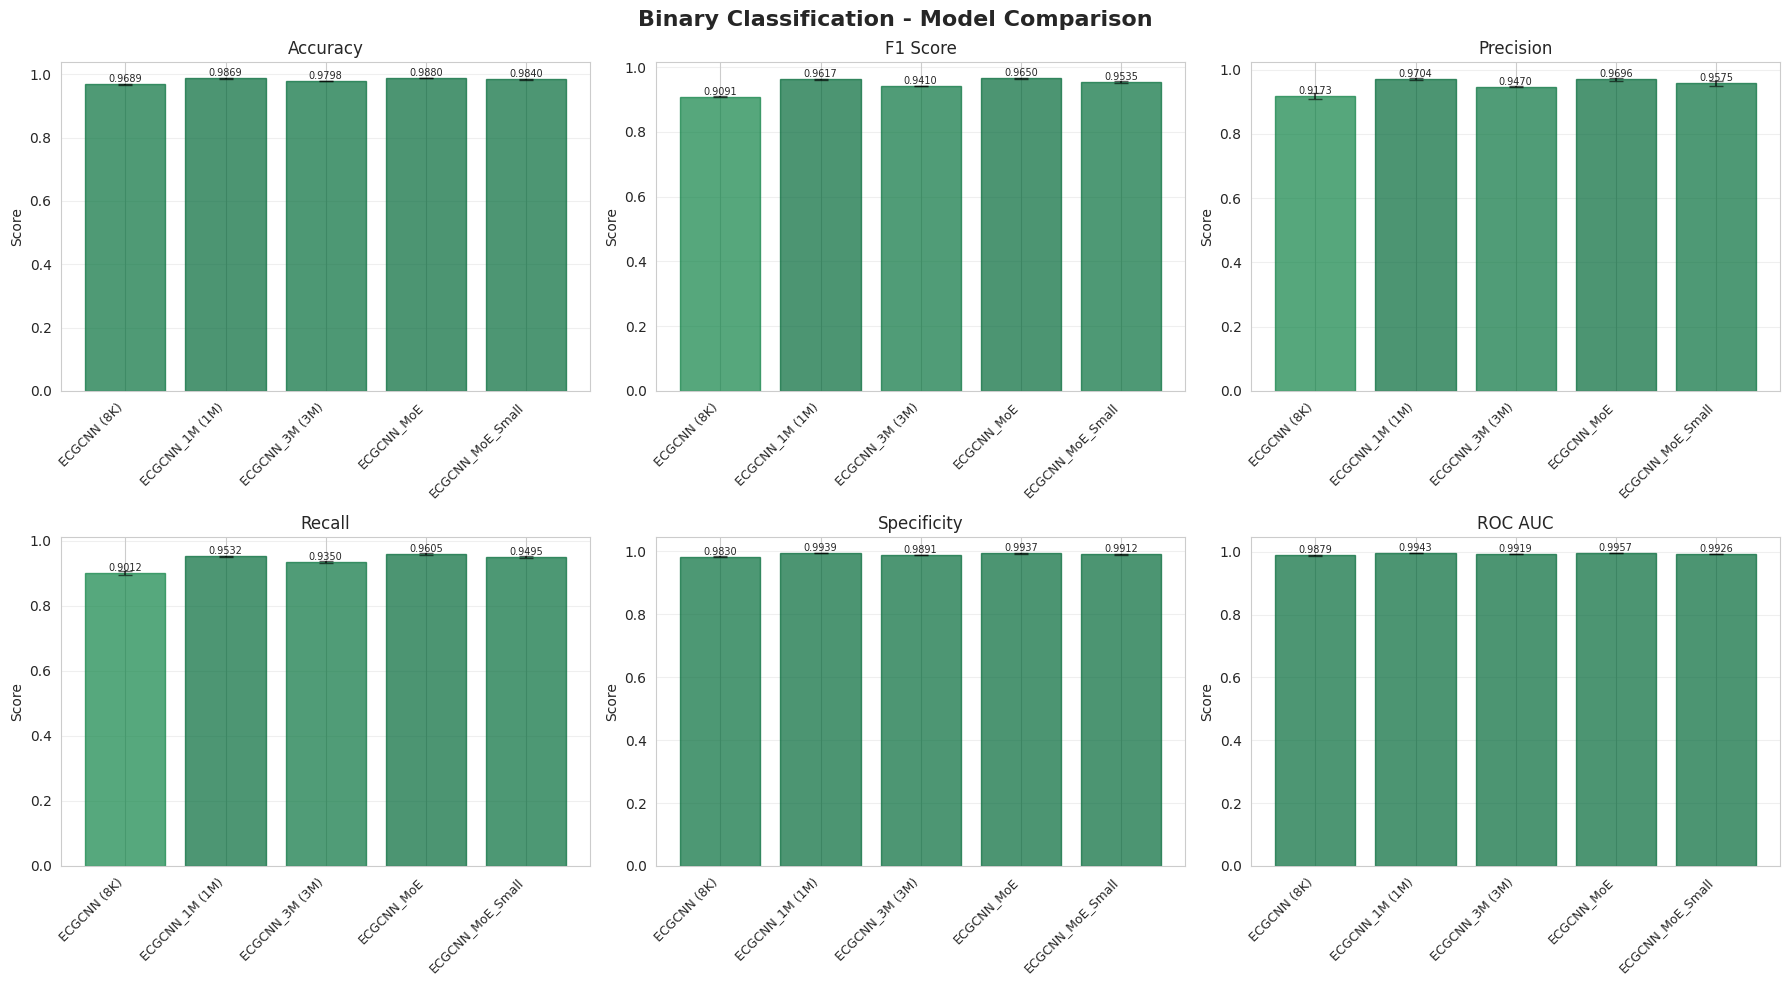

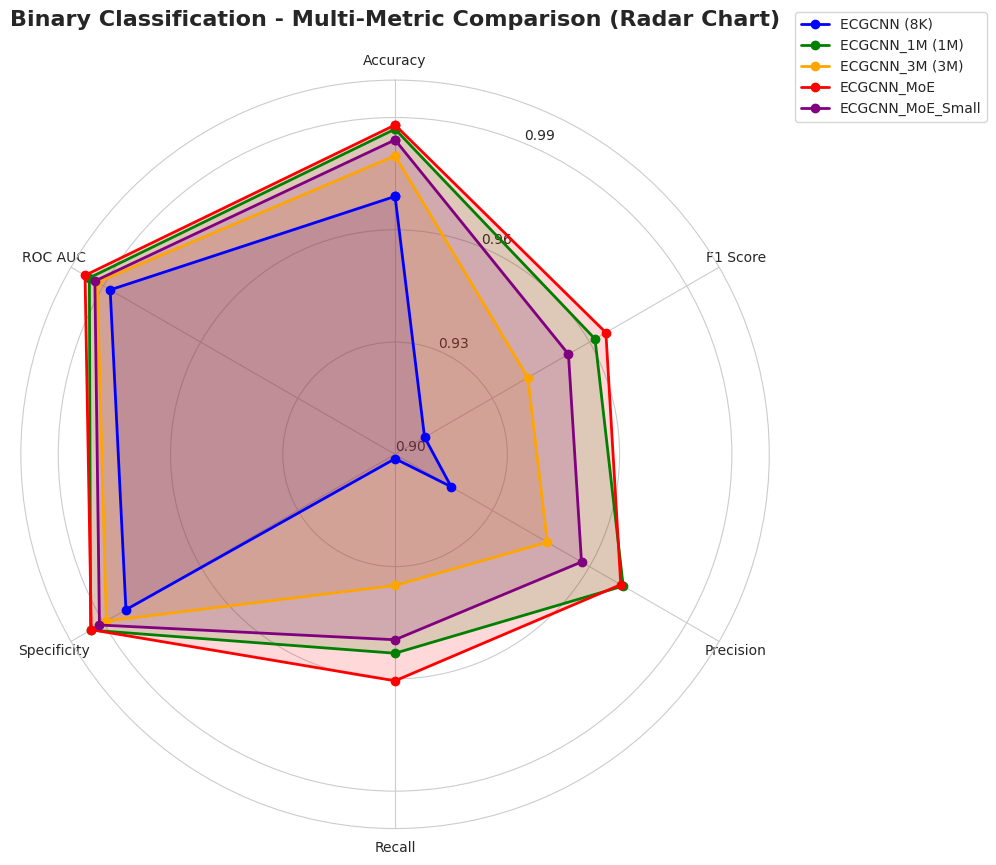

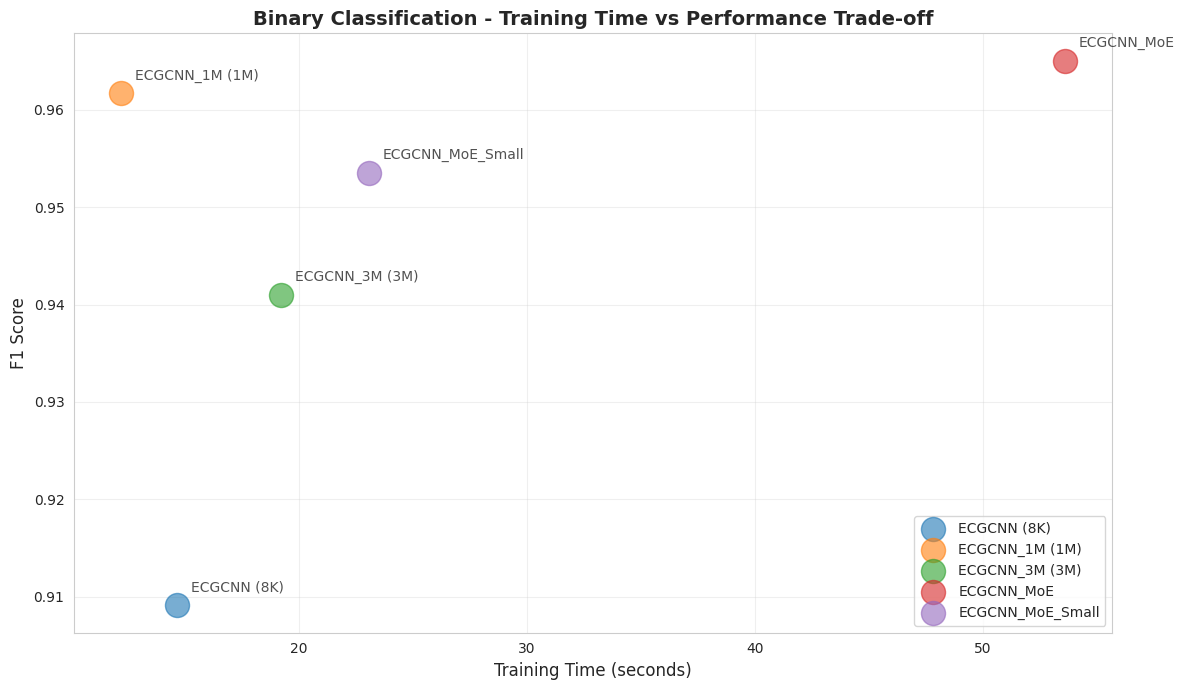

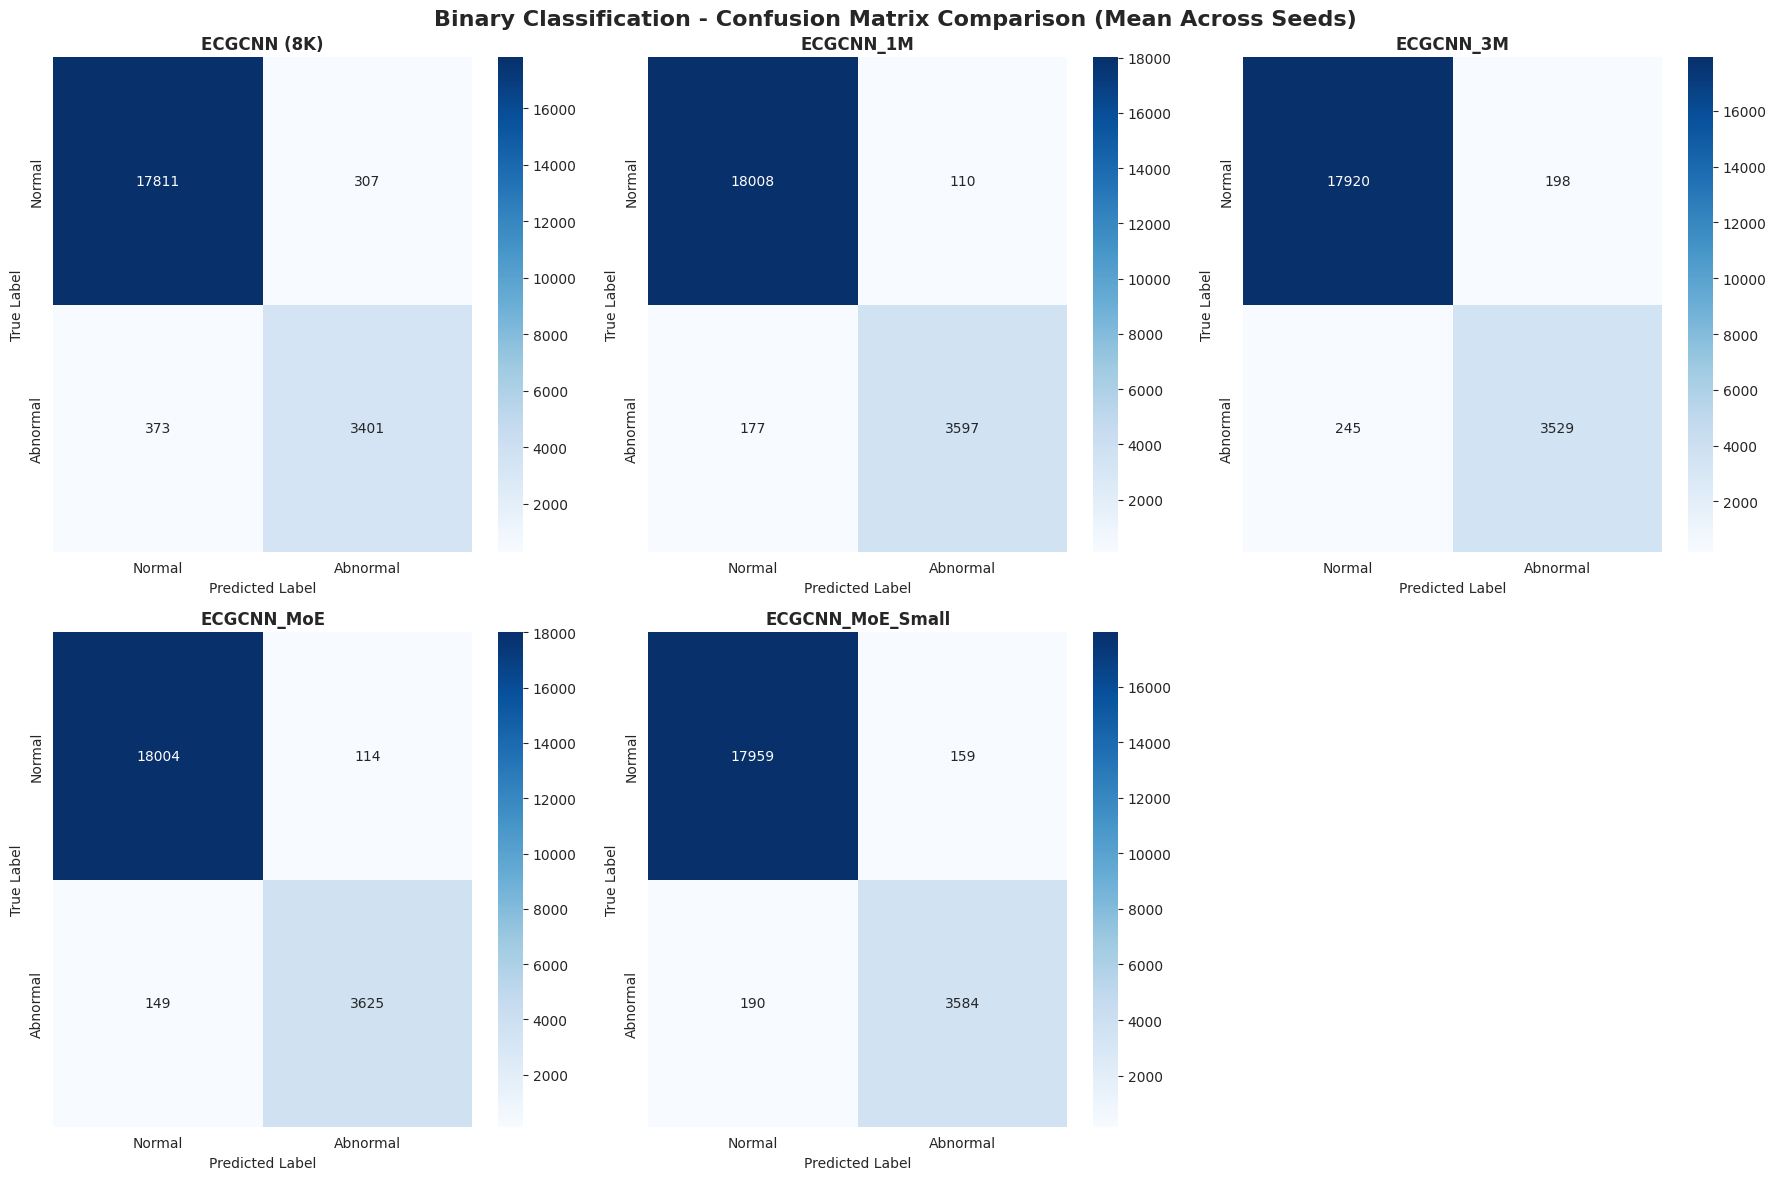

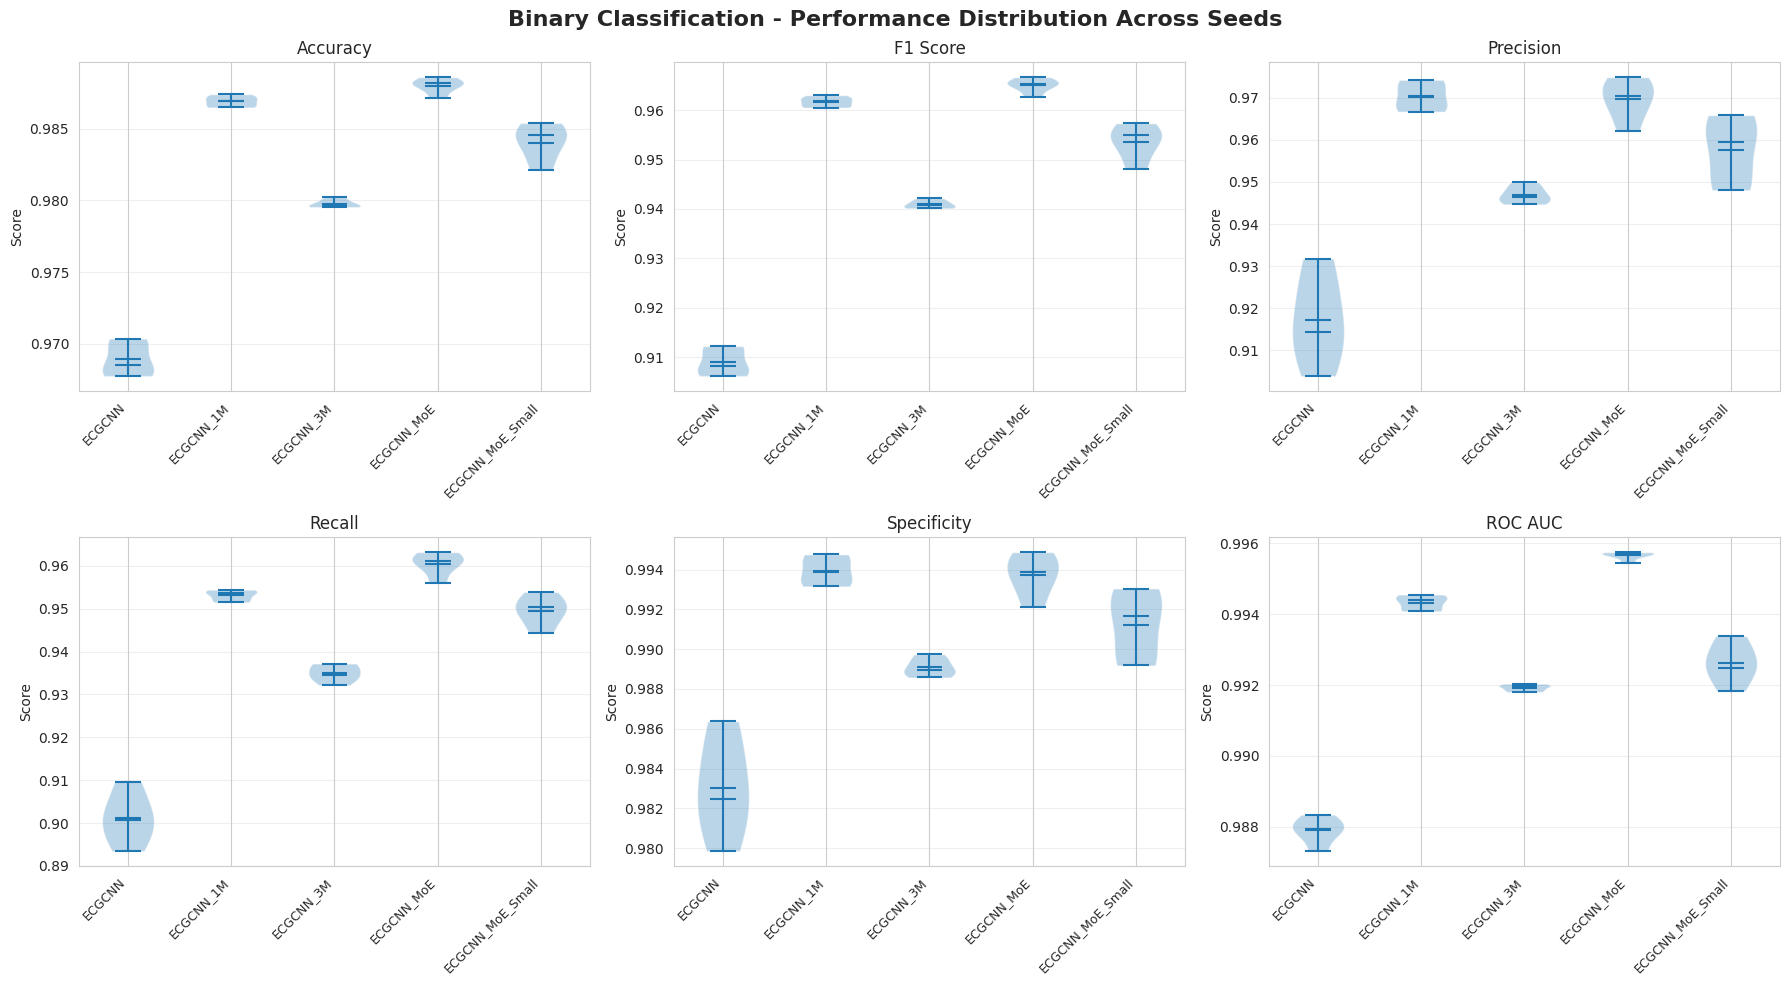


BINARY CLASSIFICATION - STATISTICAL SIGNIFICANCE TESTS (Wilcoxon Signed-Rank)
ECGCNN_1M vs ECGCNN: p-value = 0.0625 ns
ECGCNN_3M vs ECGCNN: p-value = 0.0625 ns
ECGCNN_MoE vs ECGCNN: p-value = 0.0625 ns
ECGCNN_MoE_Small vs ECGCNN: p-value = 0.0625 ns
Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


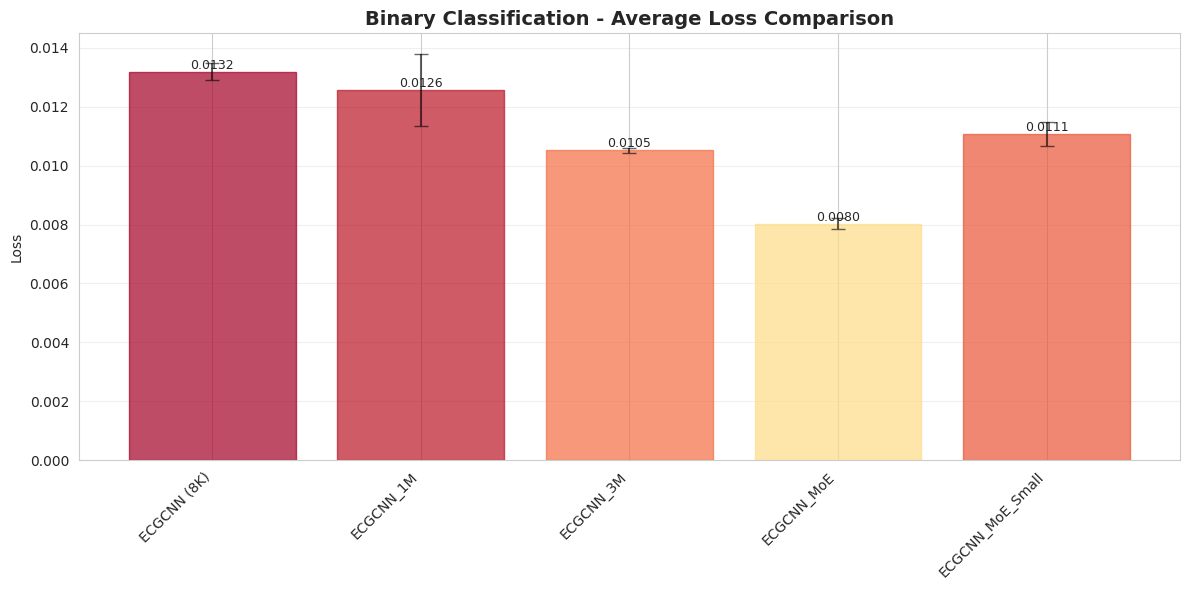

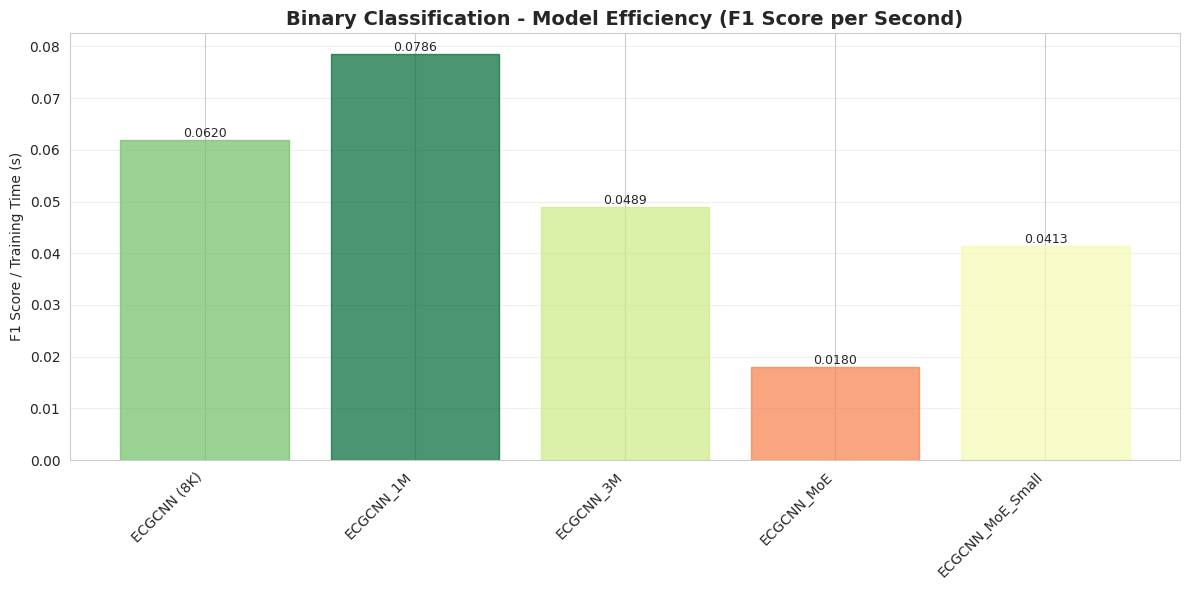

In [43]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load all binary classification model metrics
with open("../binary_metrics_ECGCNN.json", "r") as f:
    binary_8k = json.load(f)
with open("../binary_metrics_ECGCNN_1M.json", "r") as f:
    binary_1m = json.load(f)
with open("../binary_metrics_ECGCNN_3M.json", "r") as f:
    binary_3m = json.load(f)
with open("../binary_metrics_ECGCNN_MoE.json", "r") as f:
    binary_moe = json.load(f)
with open("../binary_metrics_ECGCNN_MoE_Small.json", "r") as f:
    binary_moe_small = json.load(f)


# Function to extract binary model statistics
def get_binary_model_stats(metrics_data, model_name):
    """Extract mean and std for binary classification metrics"""
    accuracies = [entry["metrics"]["accuracy"] for entry in metrics_data]
    f1_scores = [entry["metrics"]["f1"] for entry in metrics_data]
    precisions = [entry["metrics"]["precision"] for entry in metrics_data]
    recalls = [entry["metrics"]["recall"] for entry in metrics_data]
    specificities = [entry["metrics"]["specificity"] for entry in metrics_data]
    roc_aucs = [entry["metrics"]["roc_auc"] for entry in metrics_data]
    losses = [entry["metrics"]["avg_loss"] for entry in metrics_data]
    training_times = [entry["training_time"] for entry in metrics_data]
    evaluation_times = [entry["evaluation_time"] for entry in metrics_data]

    return {
        "Model": model_name,
        "Accuracy": f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
        "Accuracy_mean": np.mean(accuracies),
        "Accuracy_std": np.std(accuracies),
        "F1": f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}",
        "F1_mean": np.mean(f1_scores),
        "F1_std": np.std(f1_scores),
        "Precision": f"{np.mean(precisions):.4f} ± {np.std(precisions):.4f}",
        "Precision_mean": np.mean(precisions),
        "Precision_std": np.std(precisions),
        "Recall": f"{np.mean(recalls):.4f} ± {np.std(recalls):.4f}",
        "Recall_mean": np.mean(recalls),
        "Recall_std": np.std(recalls),
        "Specificity": f"{np.mean(specificities):.4f} ± {np.std(specificities):.4f}",
        "Specificity_mean": np.mean(specificities),
        "Specificity_std": np.std(specificities),
        "ROC AUC": f"{np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}",
        "ROC_AUC_mean": np.mean(roc_aucs),
        "ROC_AUC_std": np.std(roc_aucs),
        "Loss": f"{np.mean(losses):.4f} ± {np.std(losses):.4f}",
        "Loss_mean": np.mean(losses),
        "Loss_std": np.std(losses),
        "Training Time (s)": f"{np.mean(training_times):.2f} ± {np.std(training_times):.2f}",
        "Training_time_mean": np.mean(training_times),
        "Evaluation Time (s)": f"{np.mean(evaluation_times):.2f} ± {np.std(evaluation_times):.2f}",
        "Evaluation_time_mean": np.mean(evaluation_times),
    }


# Aggregate statistics for all binary models
binary_comparison_data = [
    get_binary_model_stats(binary_8k, "ECGCNN (8K)"),
    get_binary_model_stats(binary_1m, "ECGCNN_1M (1M)"),
    get_binary_model_stats(binary_3m, "ECGCNN_3M (3M)"),
    get_binary_model_stats(binary_moe, "ECGCNN_MoE"),
    get_binary_model_stats(binary_moe_small, "ECGCNN_MoE_Small"),
]

# Create comparison DataFrame
binary_comparison_df = pd.DataFrame(binary_comparison_data)

# Display table
print("=" * 140)
print("BINARY CLASSIFICATION MODEL COMPARISON - AGGREGATE METRICS")
print("=" * 140)
display_df = binary_comparison_df[
    [
        "Model",
        "Accuracy",
        "F1",
        "Precision",
        "Recall",
        "Specificity",
        "ROC AUC",
        "Loss",
        "Training Time (s)",
        "Evaluation Time (s)",
    ]
]
print(display_df.to_string(index=False))
print("=" * 140)

# ============================================================================
# VISUALIZATIONS
# ============================================================================

sns.set_style("whitegrid")

# 1. Bar Chart Comparison of Key Metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Binary Classification - Model Comparison", fontsize=16, fontweight="bold")

metrics_to_plot = [
    ("Accuracy_mean", "Accuracy_std", "Accuracy"),
    ("F1_mean", "F1_std", "F1 Score"),
    ("Precision_mean", "Precision_std", "Precision"),
    ("Recall_mean", "Recall_std", "Recall"),
    ("Specificity_mean", "Specificity_std", "Specificity"),
    ("ROC_AUC_mean", "ROC_AUC_std", "ROC AUC"),
]

for idx, (mean_col, std_col, title) in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]

    models = binary_comparison_df["Model"]
    means = binary_comparison_df[mean_col]
    stds = binary_comparison_df[std_col]

    bars = ax.bar(range(len(models)), means, alpha=0.7)

    # Color bars by performance (green = better)
    colors = plt.cm.RdYlGn(means / means.max())
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    # Add error bars
    ax.errorbar(
        range(len(models)),
        means,
        yerr=stds,
        fmt="none",
        color="black",
        capsize=5,
        alpha=0.6,
    )

    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel("Score")
    ax.set_title(title)
    ax.grid(True, alpha=0.3, axis="y")

    # Add value labels on bars
    for i, (bar, val, std) in enumerate(zip(bars, means, stds)):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{val:.4f}",
            ha="center",
            va="bottom",
            fontsize=7,
        )

plt.tight_layout()
plt.show()

# 2. Radar Chart Comparison
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="polar"))

# Metrics for radar chart
metrics_radar = [
    "Accuracy_mean",
    "F1_mean",
    "Precision_mean",
    "Recall_mean",
    "Specificity_mean",
    "ROC_AUC_mean",
]
labels = ["Accuracy", "F1 Score", "Precision", "Recall", "Specificity", "ROC AUC"]

# Number of variables
num_vars = len(metrics_radar)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Plot each model
colors = ["blue", "green", "orange", "red", "purple"]
for idx, (data, color) in enumerate(zip(binary_comparison_data, colors)):
    values = [data[metric] for metric in metrics_radar]
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, "o-", linewidth=2, label=data["Model"], color=color)
    ax.fill(angles, values, alpha=0.15, color=color)

# Fix axis to go in the right order
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Set y-axis limits
ax.set_ylim(0.90, 1.0)
ax.set_yticks([0.90, 0.93, 0.96, 0.99])
ax.set_yticklabels(["0.90", "0.93", "0.96", "0.99"])

ax.set_title(
    "Binary Classification - Multi-Metric Comparison (Radar Chart)",
    size=16,
    fontweight="bold",
    pad=20,
)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

# 3. Training Time vs Performance
fig, ax = plt.subplots(figsize=(12, 7))

for idx, data in enumerate(binary_comparison_data):
    ax.scatter(
        data["Training_time_mean"],
        data["F1_mean"],
        s=300,
        alpha=0.6,
        label=data["Model"],
    )
    ax.annotate(
        data["Model"],
        (data["Training_time_mean"], data["F1_mean"]),
        xytext=(10, 10),
        textcoords="offset points",
        fontsize=10,
        alpha=0.8,
    )

ax.set_xlabel("Training Time (seconds)", fontsize=12)
ax.set_ylabel("F1 Score", fontsize=12)
ax.set_title(
    "Binary Classification - Training Time vs Performance Trade-off",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# 4. Confusion Matrix Comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(
    "Binary Classification - Confusion Matrix Comparison (Mean Across Seeds)",
    fontsize=16,
    fontweight="bold",
)

model_names = [
    "ECGCNN (8K)",
    "ECGCNN_1M",
    "ECGCNN_3M",
    "ECGCNN_MoE",
    "ECGCNN_MoE_Small",
]
all_binary_metrics = [binary_8k, binary_1m, binary_3m, binary_moe, binary_moe_small]

for idx, (metrics, model_name) in enumerate(zip(all_binary_metrics, model_names)):
    ax = axes[idx // 3, idx % 3]

    confusion_matrices = [
        np.array(entry["metrics"]["confusion_matrix"]) for entry in metrics
    ]
    mean_cm = np.mean(confusion_matrices, axis=0)

    sns.heatmap(
        mean_cm,
        annot=True,
        fmt=".0f",
        cmap="Blues",
        xticklabels=["Normal", "Abnormal"],
        yticklabels=["Normal", "Abnormal"],
        ax=ax,
    )
    ax.set_title(f"{model_name}", fontsize=12, fontweight="bold")
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

# Hide the last subplot (we have 5 models, 2x3 grid)
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

# 5. Performance Distribution Violin Plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(
    "Binary Classification - Performance Distribution Across Seeds",
    fontsize=16,
    fontweight="bold",
)

metrics_violin = [
    ("accuracy", "Accuracy"),
    ("f1", "F1 Score"),
    ("precision", "Precision"),
    ("recall", "Recall"),
    ("specificity", "Specificity"),
    ("roc_auc", "ROC AUC"),
]

for idx, (metric_key, metric_name) in enumerate(metrics_violin):
    ax = axes[idx // 3, idx % 3]

    data_for_violin = []
    labels_for_violin = []

    for metrics, model_name in zip(all_binary_metrics, model_names):
        values = [entry["metrics"][metric_key] for entry in metrics]
        data_for_violin.append(values)
        labels_for_violin.append(model_name.split()[0])  # Shortened labels

    parts = ax.violinplot(
        data_for_violin,
        positions=range(len(model_names)),
        showmeans=True,
        showmedians=True,
    )

    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(labels_for_violin, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel("Score")
    ax.set_title(metric_name)
    ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# 6. Statistical Significance Tests (Wilcoxon)
print("\n" + "=" * 80)
print("BINARY CLASSIFICATION - STATISTICAL SIGNIFICANCE TESTS (Wilcoxon Signed-Rank)")
print("=" * 80)

# Compare each model against ECGCNN (baseline)
baseline_f1 = [entry["metrics"]["f1"] for entry in binary_8k]

for metrics, model_name in zip(
    [binary_1m, binary_3m, binary_moe, binary_moe_small],
    ["ECGCNN_1M", "ECGCNN_3M", "ECGCNN_MoE", "ECGCNN_MoE_Small"],
):
    model_f1 = [entry["metrics"]["f1"] for entry in metrics]

    if len(baseline_f1) == len(model_f1):
        statistic, p_value = stats.wilcoxon(baseline_f1, model_f1)
        significance = (
            "***"
            if p_value < 0.001
            else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        )
        print(f"{model_name} vs ECGCNN: p-value = {p_value:.4f} {significance}")
    else:
        print(f"{model_name} vs ECGCNN: Different number of seeds, cannot compare")

print("=" * 80)
print("Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("=" * 80)

# 7. Loss Comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(model_names))
means = binary_comparison_df["Loss_mean"]
stds = binary_comparison_df["Loss_std"]

bars = ax.bar(x, means, alpha=0.7, capsize=5)
ax.errorbar(x, means, yerr=stds, fmt="none", color="black", capsize=5, alpha=0.6)

# Color bars (lower loss = better, so invert colors)
colors = plt.cm.RdYlGn(1 - means / means.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.set_ylabel("Loss")
ax.set_title(
    "Binary Classification - Average Loss Comparison", fontsize=14, fontweight="bold"
)
ax.grid(True, alpha=0.3, axis="y")

# Add value labels
for i, (bar, val) in enumerate(zip(bars, means)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()

# 8. Efficiency Comparison (F1 Score per Second of Training)
fig, ax = plt.subplots(figsize=(12, 6))

efficiency = (
    binary_comparison_df["F1_mean"] / binary_comparison_df["Training_time_mean"]
)
x = np.arange(len(model_names))

bars = ax.bar(x, efficiency, alpha=0.7)

# Color bars
colors = plt.cm.RdYlGn(efficiency / efficiency.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.set_ylabel("F1 Score / Training Time (s)")
ax.set_title(
    "Binary Classification - Model Efficiency (F1 Score per Second)",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")

# Add value labels
for i, (bar, val) in enumerate(zip(bars, efficiency)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()

# Binary Training


Found 27 metrics files
Loaded: ECGCNN_smote (5 seeds)
Loaded: ECGCNN_4M_base (5 seeds)
Loaded: ECGCNN_4M_smote (5 seeds)
Loaded: ECGCNN_rgan (5 seeds)
Loaded: ECGCNN_1M_base (5 seeds)
Loaded: ECGCNN_LSTM_rgan (5 seeds)
Loaded: ECGCNN_1M_smote (5 seeds)
Loaded: ECGCNN_LSTM_smote (5 seeds)
Loaded: ECGCNN_base (5 seeds)
Loaded: ECGCNN_3M_rgan (5 seeds)
Loaded: ECGCNN_MoE_rgan (5 seeds)
Loaded: ECGCNN_3M_base (5 seeds)
Loaded: ECGCNN_3M_smote (5 seeds)
Loaded: ECGCNN_MoE_Small_smote (5 seeds)
Loaded: ECGCNN_1M_rgan (5 seeds)
Loaded: ECGCNN_MoE_Small_rgan (5 seeds)
Loaded: ECGCNN_MoE_Small_LSTM_rgan (5 seeds)
Loaded: ECGCNN_MoE_smote (5 seeds)
Loaded: ECGCNN_4M_rgan (5 seeds)
Loaded: ECGCNN_LSTM_base (5 seeds)
Loaded: ECGCNN_MoE_Small_LSTM_base (5 seeds)
Loaded: ECGCNN_MoE_LSTM_base (5 seeds)
Loaded: ECGCNN_MoE_LSTM_smote (5 seeds)
Loaded: ECGCNN_MoE_LSTM_rgan (5 seeds)
Loaded: ECGCNN_MoE_Small_LSTM_smote (5 seeds)
Loaded: ECGCNN_MoE_base (5 seeds)
Loaded: ECGCNN_MoE_Small_base (5 seeds)

T

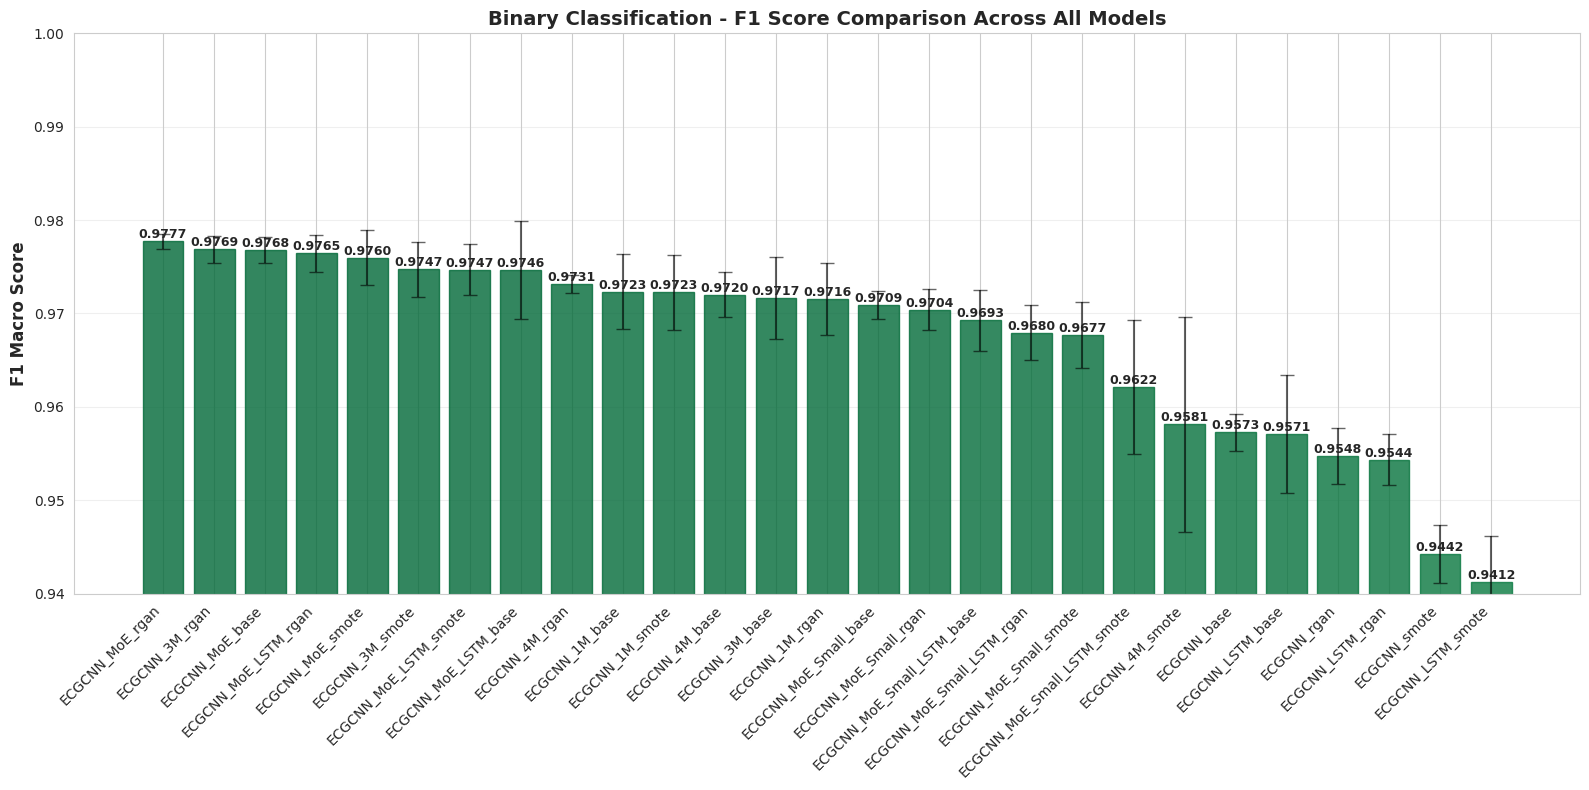

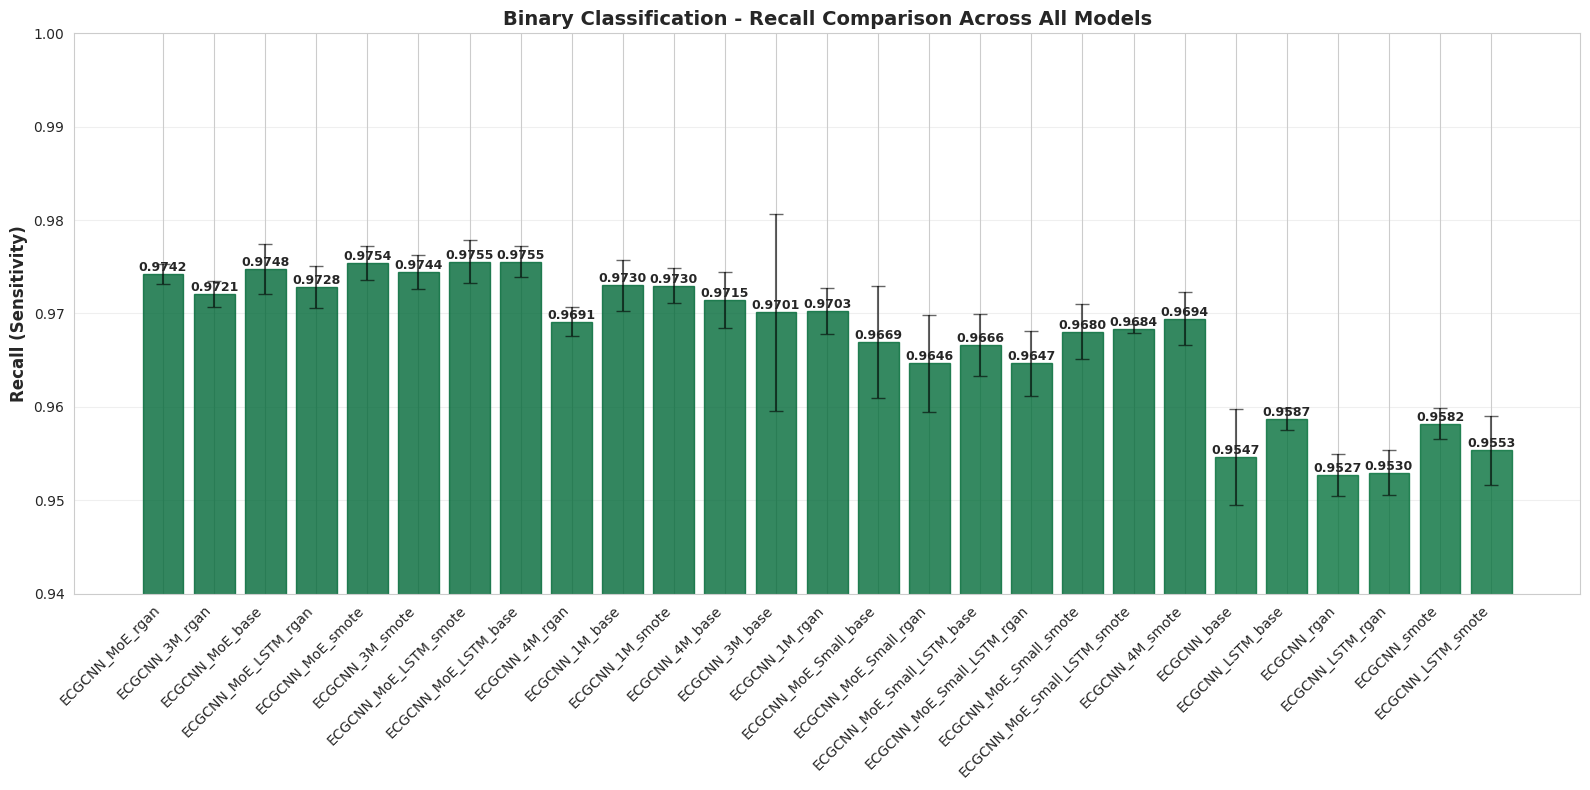

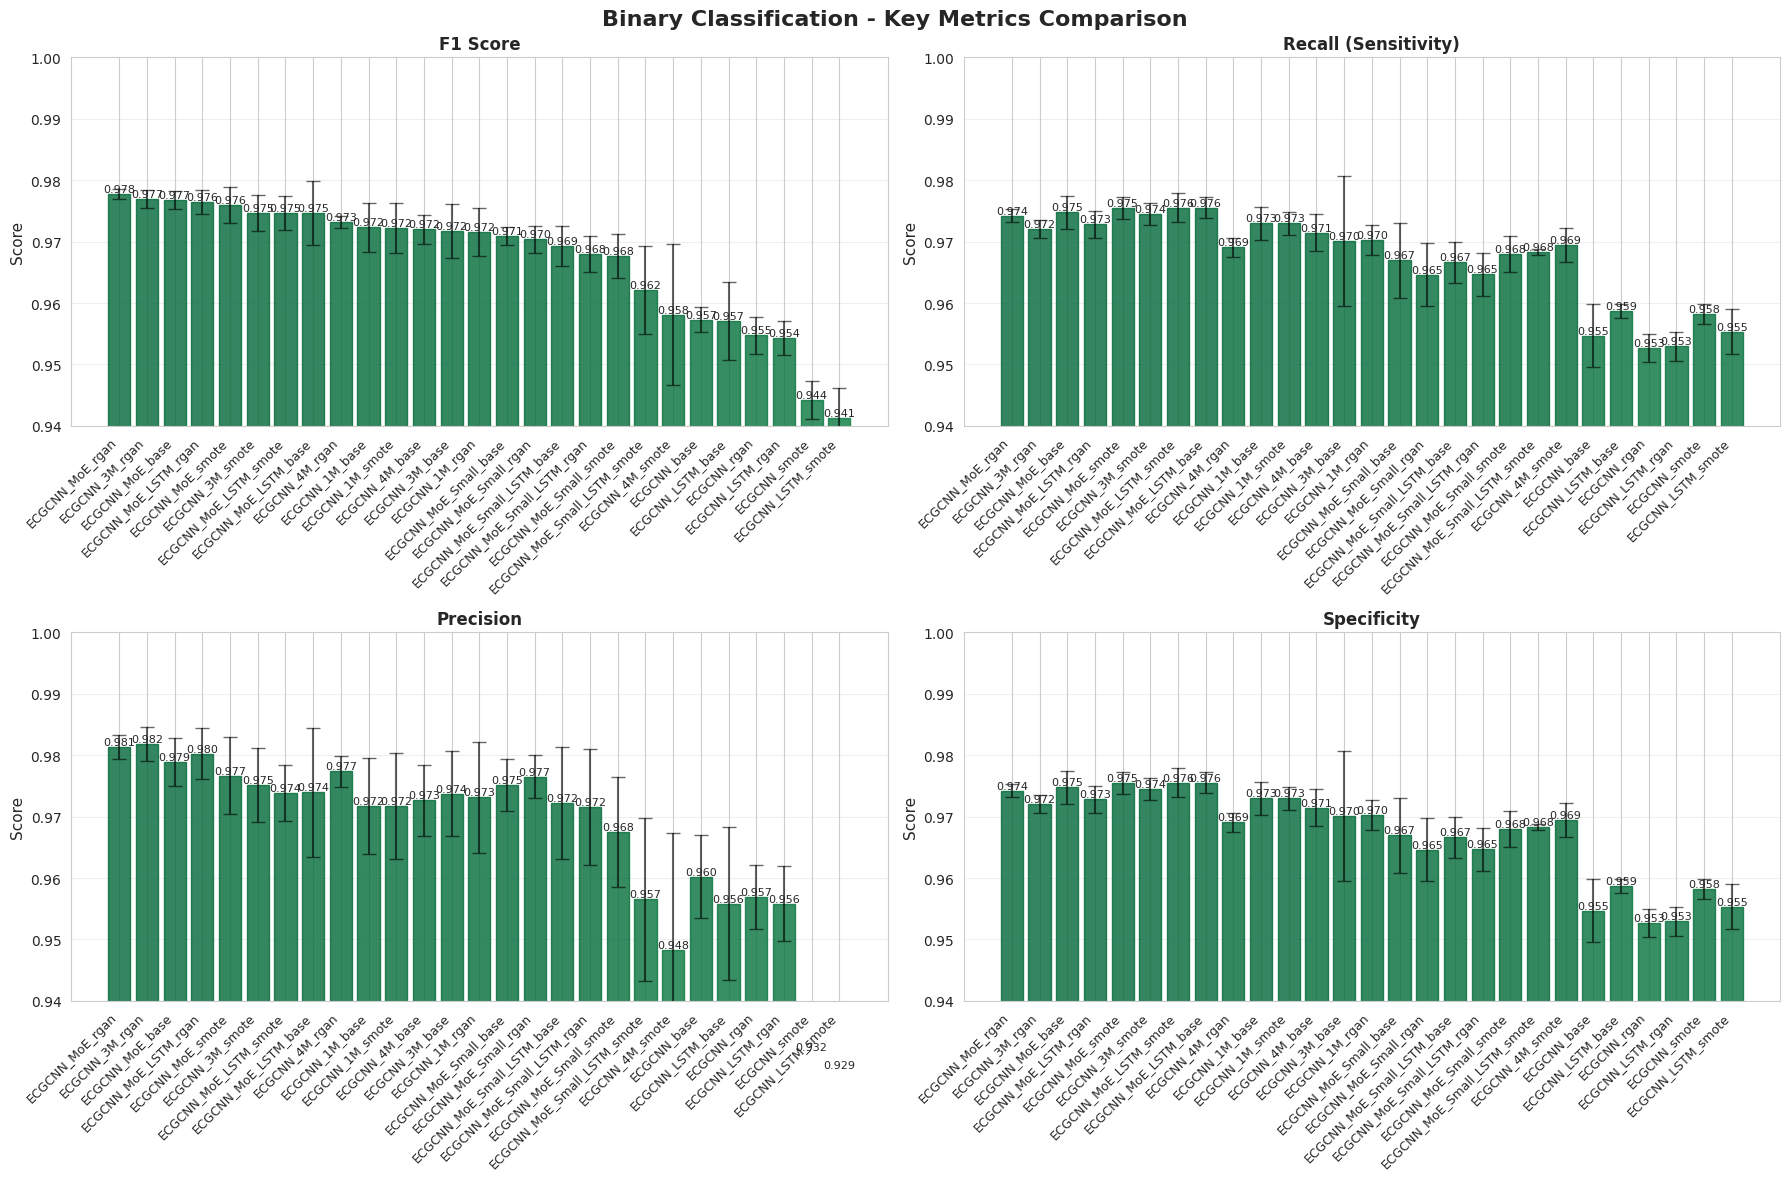

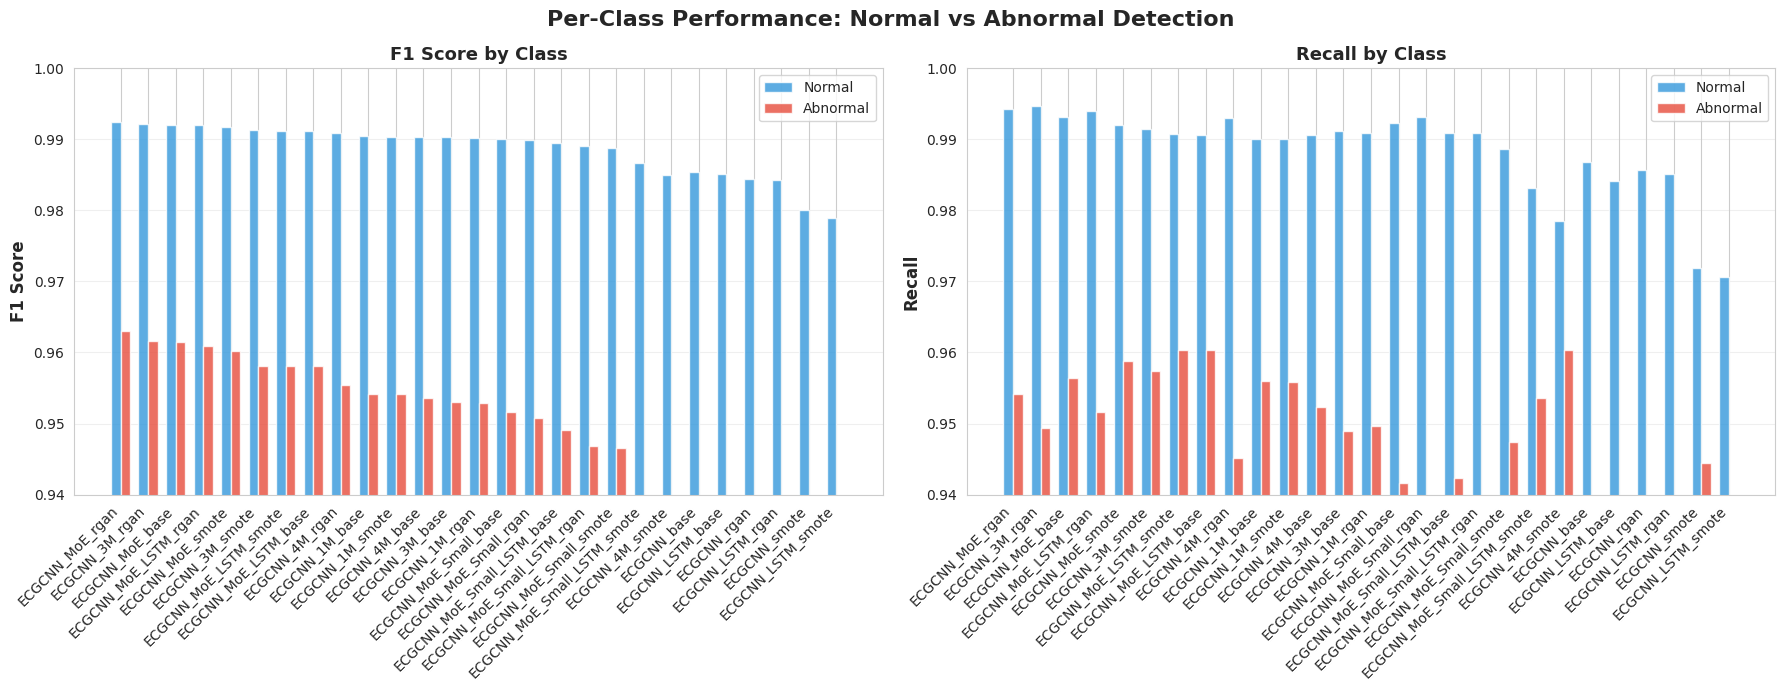

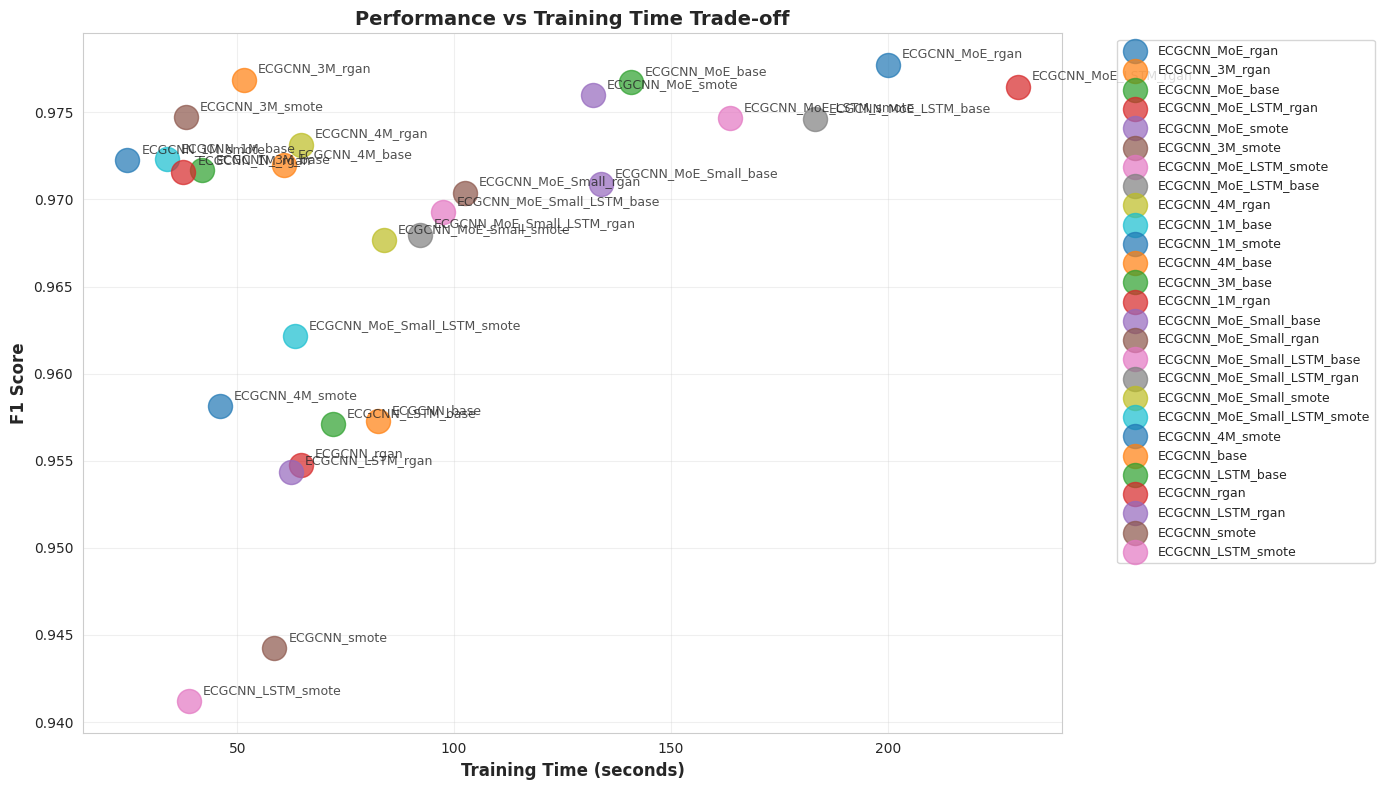

/tmp/ipykernel_5575/372955036.py:399: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(comparison_df["Model"], rotation=45, ha="right", fontsize=9)
/tmp/ipykernel_5575/372955036.py:399: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(comparison_df["Model"], rotation=45, ha="right", fontsize=9)
/tmp/ipykernel_5575/372955036.py:399: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(comparison_df["Model"], rotation=45, ha="right", fontsize=9)
/tmp/ipykernel_5575/372955036.py:399: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(comparison_df["Model"], rotation=45, ha="right", fontsize=9)


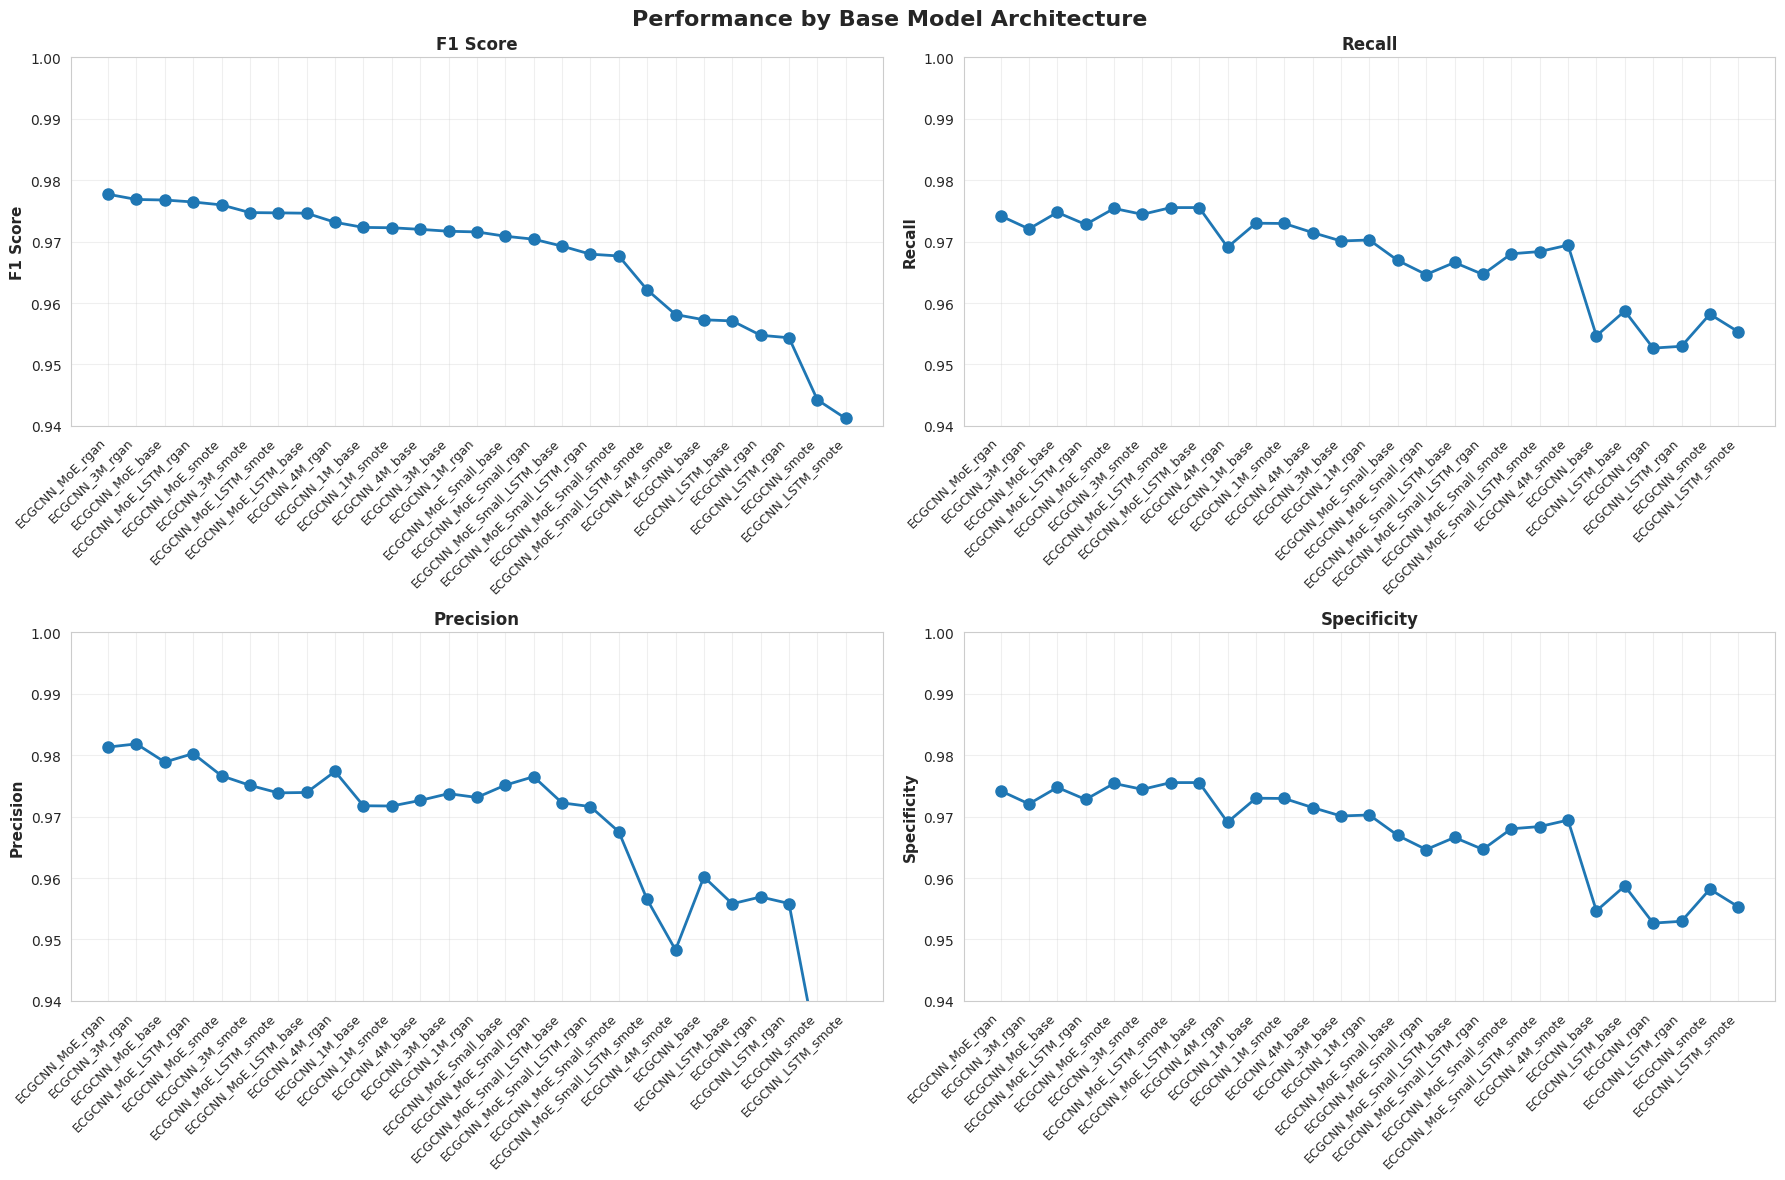

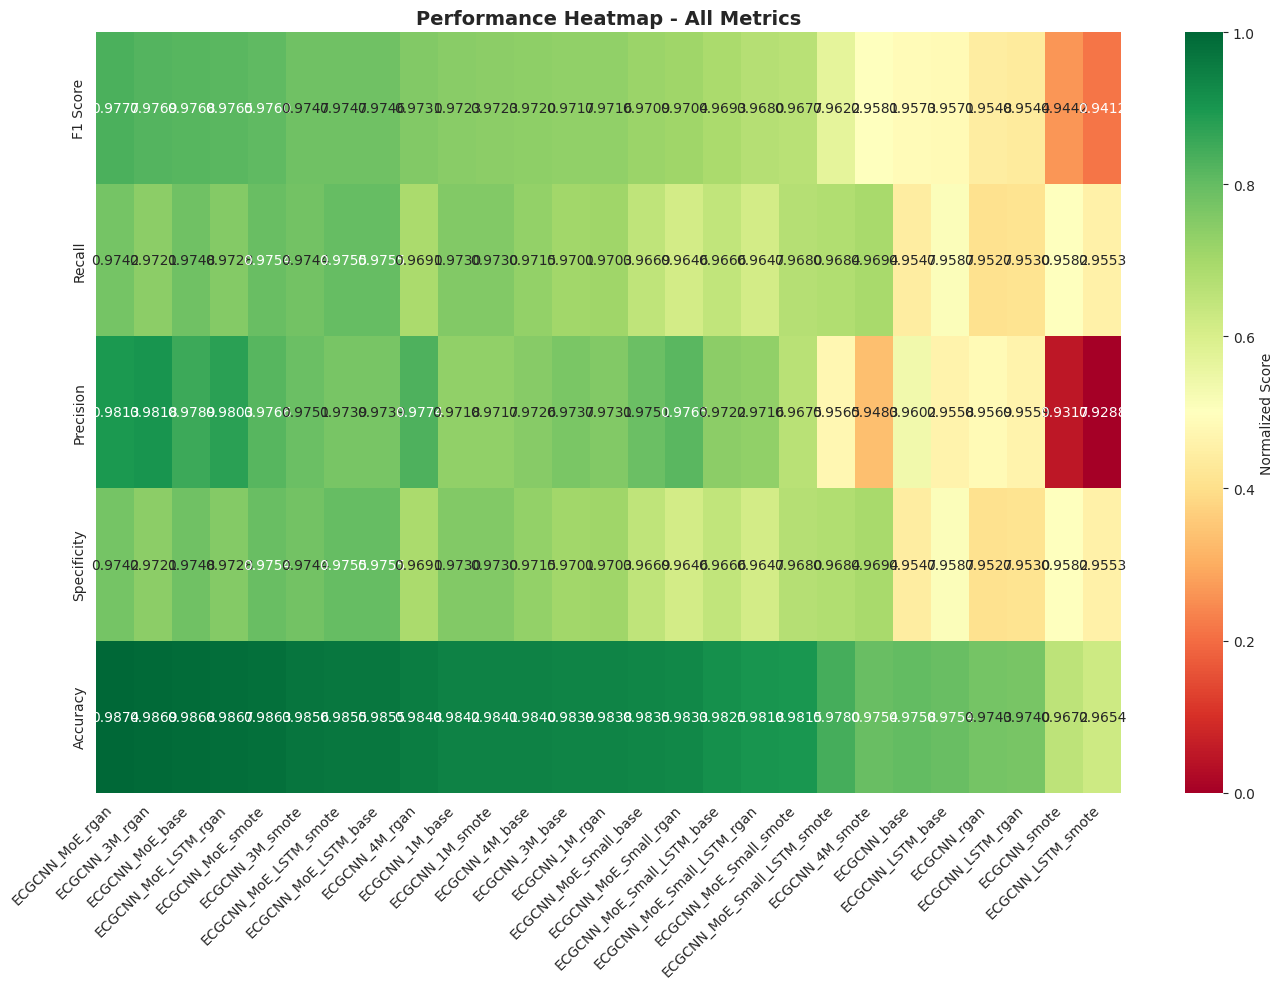

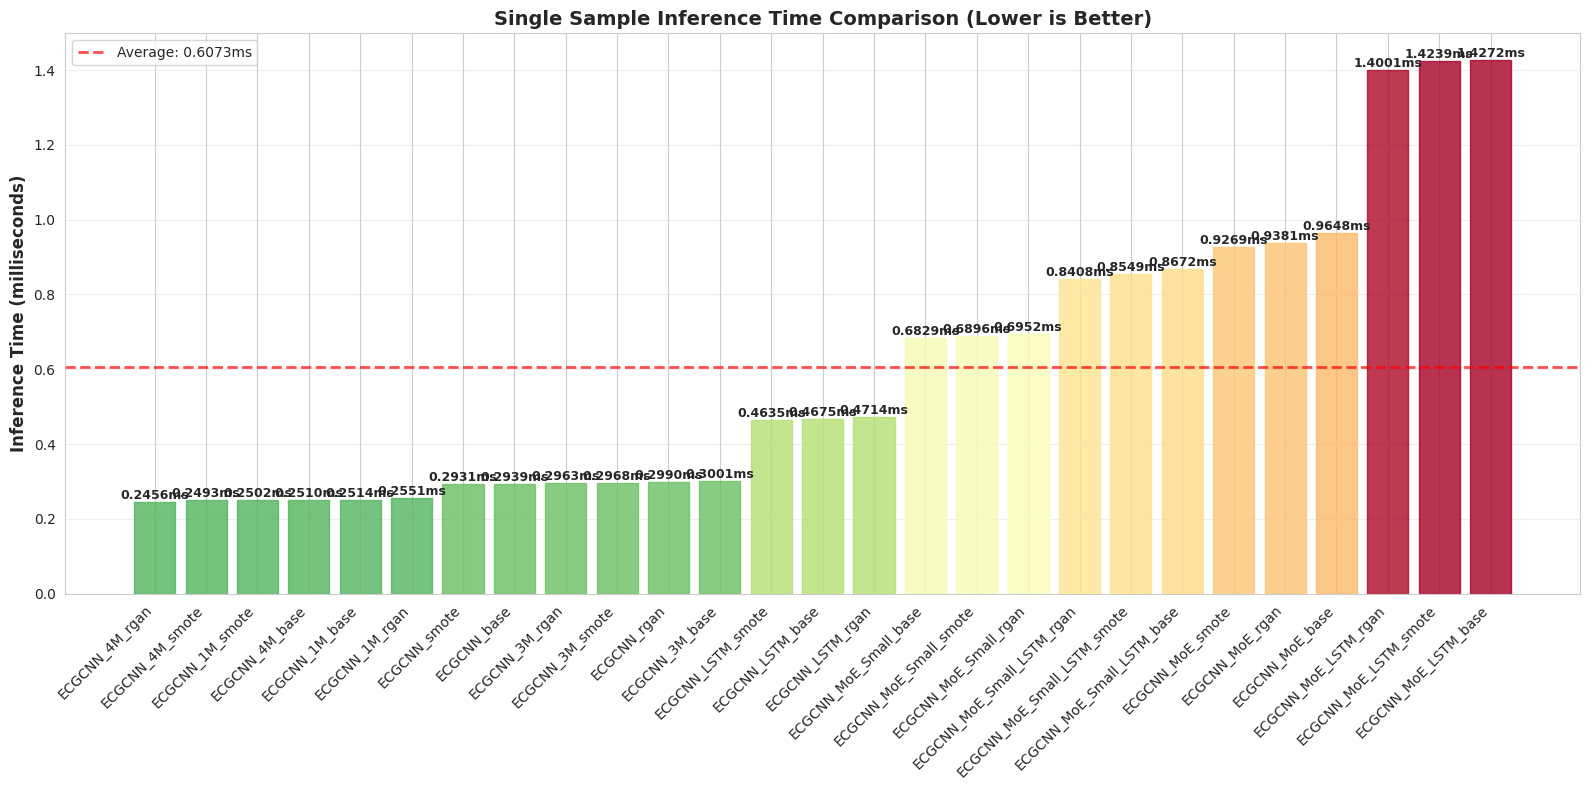


INFERENCE TIME STATISTICS
                      Model  F1_mean Inference_time_ms
             ECGCNN_4M_rgan 0.973149            0.2456
            ECGCNN_4M_smote 0.958132            0.2493
            ECGCNN_1M_smote 0.972258            0.2502
             ECGCNN_4M_base 0.971999            0.2510
             ECGCNN_1M_base 0.972313            0.2514
             ECGCNN_1M_rgan 0.971580            0.2551
               ECGCNN_smote 0.944244            0.2931
                ECGCNN_base 0.957277            0.2939
             ECGCNN_3M_rgan 0.976862            0.2963
            ECGCNN_3M_smote 0.974726            0.2968
                ECGCNN_rgan 0.954757            0.2990
             ECGCNN_3M_base 0.971688            0.3001
          ECGCNN_LSTM_smote 0.941210            0.4635
           ECGCNN_LSTM_base 0.957091            0.4675
           ECGCNN_LSTM_rgan 0.954350            0.4714
      ECGCNN_MoE_Small_base 0.970879            0.6829
     ECGCNN_MoE_Small_smote 0.967664  

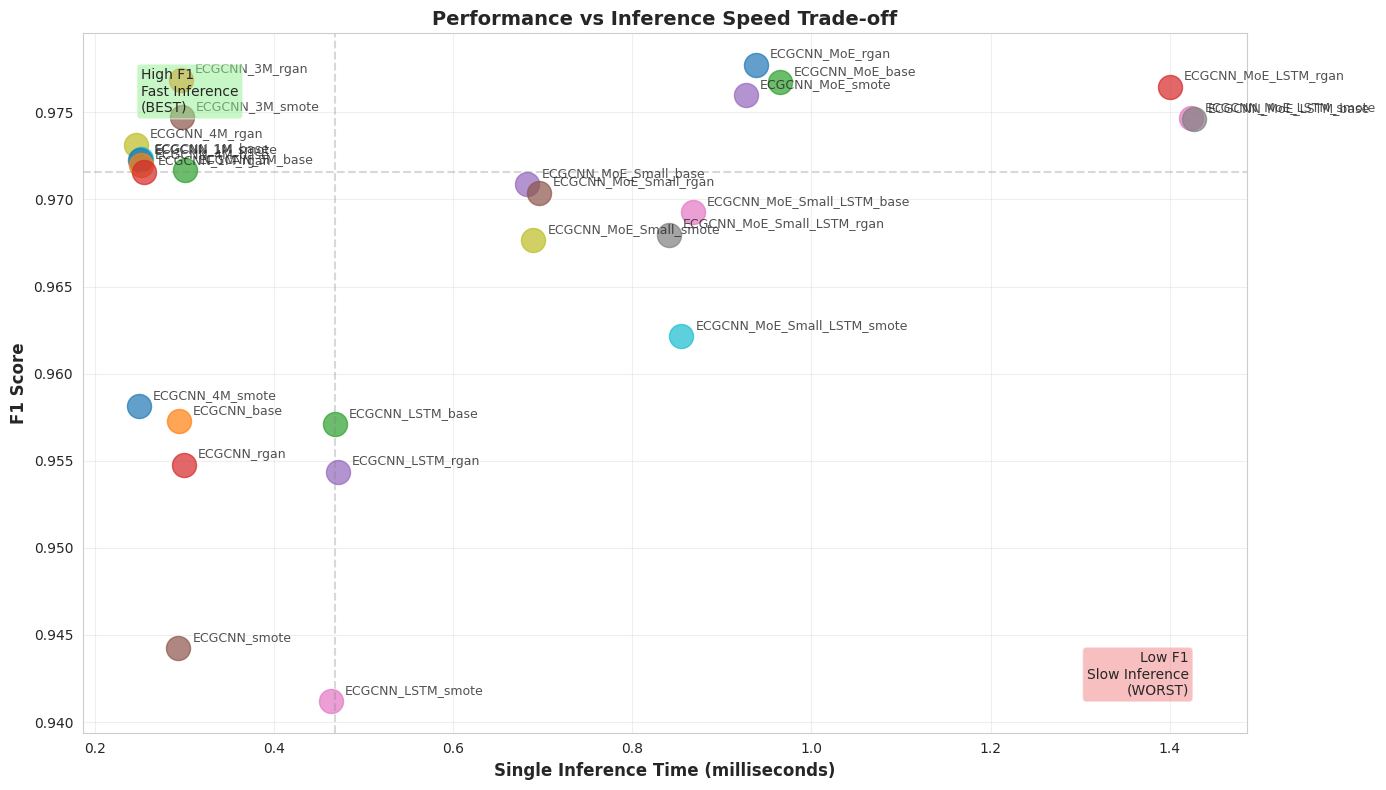

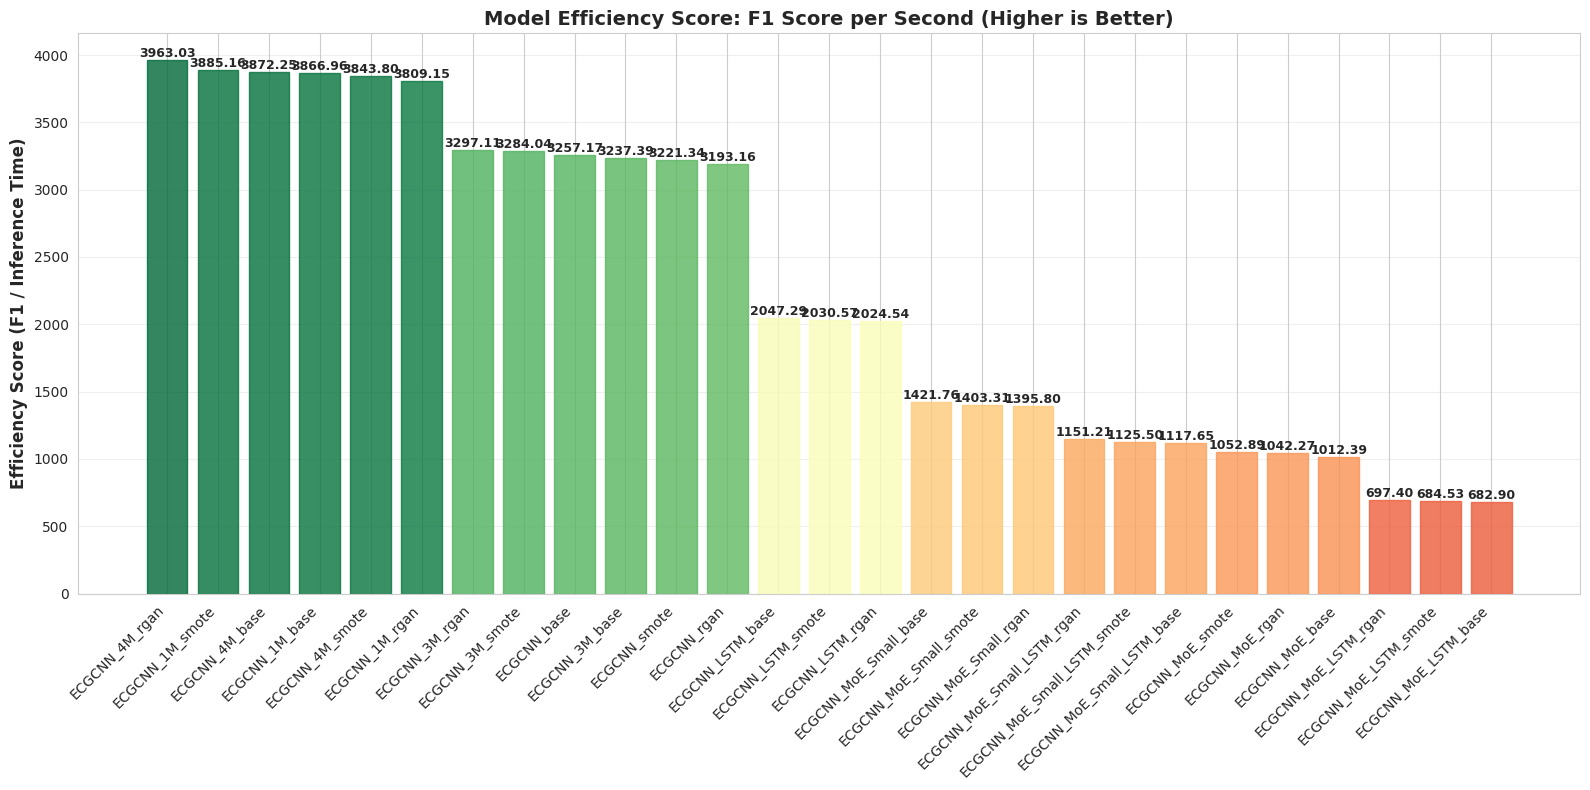


TOP 5 MOST EFFICIENT MODELS (F1 Score / Inference Time)
          Model        F1 Macro  Inference_time_ms  Efficiency_score
 ECGCNN_4M_rgan 0.9731 ± 0.0010           0.245557       3963.029499
ECGCNN_1M_smote 0.9723 ± 0.0041           0.250249       3885.163455
 ECGCNN_4M_base 0.9720 ± 0.0024           0.251017       3872.249158
 ECGCNN_1M_base 0.9723 ± 0.0040           0.251441       3866.961035
ECGCNN_4M_smote 0.9581 ± 0.0115           0.249267       3843.802910


/tmp/ipykernel_5575/372955036.py:643: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


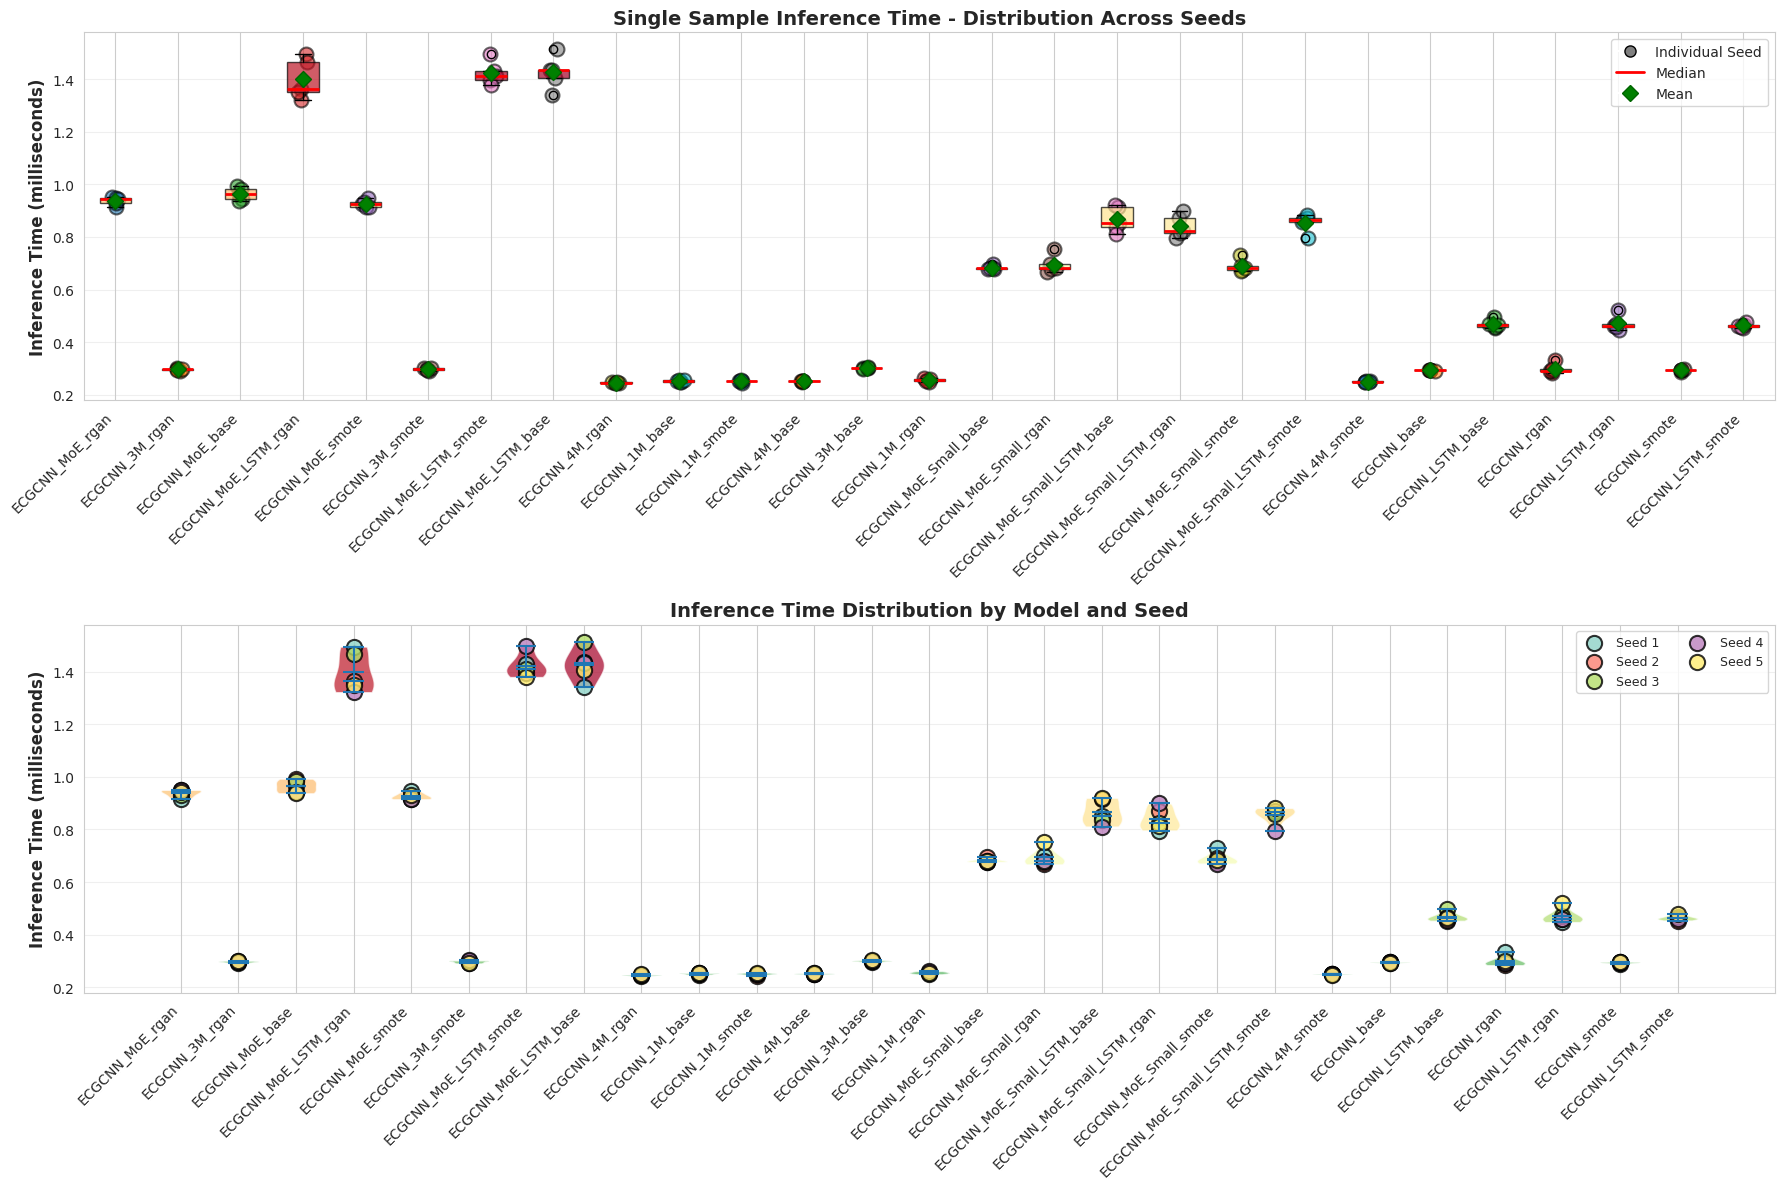


INFERENCE TIME STATISTICS PER SEED (milliseconds)
                      Model Seed 1 Seed 2 Seed 3 Seed 4 Seed 5   Mean    Std    Min    Max  Range   CV%
            ECGCNN_MoE_rgan 0.9161 0.9512 0.9297 0.9489 0.9445 0.9381 0.0133 0.9161 0.9512 0.0351 1.42%
             ECGCNN_3M_rgan 0.3007 0.2971 0.2900 0.2954 0.2982 0.2963 0.0036 0.2900 0.3007 0.0107 1.21%
            ECGCNN_MoE_base 0.9656 0.9937 0.9838 0.9433 0.9378 0.9648 0.0219 0.9378 0.9937 0.0559 2.27%
       ECGCNN_MoE_LSTM_rgan 1.4966 1.3635 1.4674 1.3228 1.3503 1.4001 0.0688 1.3228 1.4966 0.1739 4.91%
           ECGCNN_MoE_smote 0.9468 0.9245 0.9151 0.9154 0.9329 0.9269 0.0119 0.9151 0.9468 0.0317 1.28%
            ECGCNN_3M_smote 0.2899 0.3006 0.2992 0.3018 0.2925 0.2968 0.0047 0.2899 0.3018 0.0119 1.59%
      ECGCNN_MoE_LSTM_smote 1.4313 1.3963 1.4127 1.4986 1.3805 1.4239 0.0410 1.3805 1.4986 0.1180 2.88%
       ECGCNN_MoE_LSTM_base 1.3421 1.4375 1.5156 1.4348 1.4060 1.4272 0.0560 1.3421 1.5156 0.1736 3.92%
             

/tmp/ipykernel_5575/372955036.py:820: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


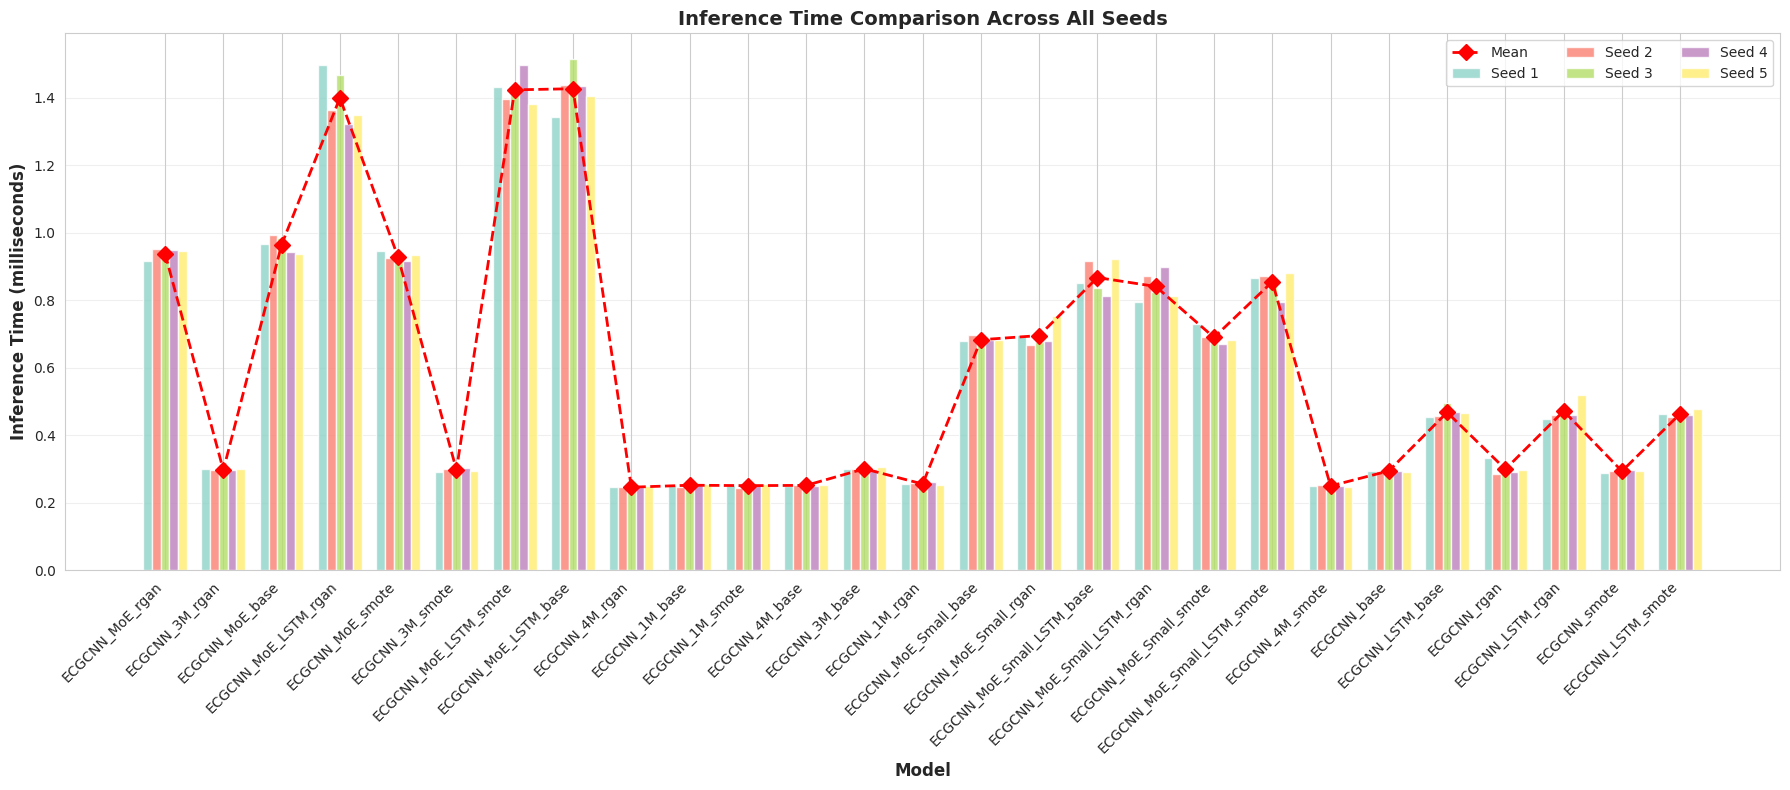


INFERENCE TIME CONSISTENCY ANALYSIS
                      Model  Mean (ms)  Std (ms)     CV % Consistency
            ECGCNN_4M_smote   0.249267  0.001242 0.498215        High
                ECGCNN_base   0.293899  0.001706 0.580331        High
             ECGCNN_4M_base   0.251017  0.001555 0.619452        High
             ECGCNN_4M_rgan   0.245557  0.001771 0.721202        High
             ECGCNN_3M_base   0.300145  0.002737 0.911899        High
             ECGCNN_1M_base   0.251441  0.002624 1.043709      Medium
      ECGCNN_MoE_Small_base   0.682869  0.007394 1.082748      Medium
             ECGCNN_3M_rgan   0.296278  0.003586 1.210416      Medium
               ECGCNN_smote   0.293121  0.003582 1.222144      Medium
           ECGCNN_MoE_smote   0.926948  0.011894 1.283087      Medium
            ECGCNN_MoE_rgan   0.938058  0.013309 1.418799      Medium
            ECGCNN_1M_smote   0.250249  0.003974 1.587944      Medium
            ECGCNN_3M_smote   0.296807  0.004720 1.59

In [46]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import glob

# Set style
sns.set_style("whitegrid")

# ============================================================================
# 1. LOAD ALL METRICS FILES
# ============================================================================

metrics_binary_folder = Path("../metrics_binary")
all_metrics = {}

# Load all JSON files from the metrics_binary folder
json_files = glob.glob(str(metrics_binary_folder / "*.json"))

print(f"Found {len(json_files)} metrics files")

for file_path in json_files:
    with open(file_path, "r") as f:
        data = json.load(f)

        # Extract model name and augmentation technique from config
        if data and len(data) > 0:
            config = data[0]["config"]
            model_name = config["model"]
            aug_technique = config["augmentation_technique"]

            # Create unique identifier
            unique_name = f"{model_name}_{aug_technique}"
            all_metrics[unique_name] = data
            print(f"Loaded: {unique_name} ({len(data)} seeds)")

print(f"\nTotal models loaded: {len(all_metrics)}")

# ============================================================================
# 2. EXTRACT AGGREGATE STATISTICS
# ============================================================================


def get_binary_stats(metrics_data, model_name):
    """Extract mean and std for binary classification metrics"""
    accuracies = [entry["metrics"]["accuracy"] for entry in metrics_data]
    f1_macros = [entry["metrics"]["f1_macro"] for entry in metrics_data]
    precision_macros = [entry["metrics"]["precision_macro"] for entry in metrics_data]
    recall_macros = [entry["metrics"]["recall_macro"] for entry in metrics_data]
    specificity_macros = [
        entry["metrics"]["specificity_macro"] for entry in metrics_data
    ]
    losses = [entry["metrics"]["avg_loss"] for entry in metrics_data]
    training_times = [entry["training_time"] for entry in metrics_data]

    # Per-class metrics (class 0: Normal, class 1: Abnormal)
    f1_per_class = np.array(
        [entry["metrics"]["f1_per_class"] for entry in metrics_data]
    )
    precision_per_class = np.array(
        [entry["metrics"]["precision_per_class"] for entry in metrics_data]
    )
    recall_per_class = np.array(
        [entry["metrics"]["recall_per_class"] for entry in metrics_data]
    )

    return {
        "Model": model_name,
        "Accuracy": f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
        "Accuracy_mean": np.mean(accuracies),
        "Accuracy_std": np.std(accuracies),
        "F1 Macro": f"{np.mean(f1_macros):.4f} ± {np.std(f1_macros):.4f}",
        "F1_mean": np.mean(f1_macros),
        "F1_std": np.std(f1_macros),
        "Precision": f"{np.mean(precision_macros):.4f} ± {np.std(precision_macros):.4f}",
        "Precision_mean": np.mean(precision_macros),
        "Precision_std": np.std(precision_macros),
        "Recall": f"{np.mean(recall_macros):.4f} ± {np.std(recall_macros):.4f}",
        "Recall_mean": np.mean(recall_macros),
        "Recall_std": np.std(recall_macros),
        "Specificity": f"{np.mean(specificity_macros):.4f} ± {np.std(specificity_macros):.4f}",
        "Specificity_mean": np.mean(specificity_macros),
        "Specificity_std": np.std(specificity_macros),
        "Loss": f"{np.mean(losses):.4f} ± {np.std(losses):.4f}",
        "Loss_mean": np.mean(losses),
        "Loss_std": np.std(losses),
        "Training Time": f"{np.mean(training_times):.2f} ± {np.std(training_times):.2f}",
        "Training_time_mean": np.mean(training_times),
        # Per-class metrics
        "F1_Normal_mean": np.mean(f1_per_class[:, 0]),
        "F1_Abnormal_mean": np.mean(f1_per_class[:, 1]),
        "Recall_Normal_mean": np.mean(recall_per_class[:, 0]),
        "Recall_Abnormal_mean": np.mean(recall_per_class[:, 1]),
        "Precision_Normal_mean": np.mean(precision_per_class[:, 0]),
        "Precision_Abnormal_mean": np.mean(precision_per_class[:, 1]),
    }


# Create comparison dataframe
comparison_data = [get_binary_stats(data, name) for name, data in all_metrics.items()]
comparison_df = pd.DataFrame(comparison_data)

# Sort by F1 Macro score
comparison_df = comparison_df.sort_values("F1_mean", ascending=False)

# Display summary table
print("\n" + "=" * 150)
print("BINARY CLASSIFICATION MODEL COMPARISON - ALL MODELS")
print("=" * 150)
display_df = comparison_df[
    [
        "Model",
        "Accuracy",
        "F1 Macro",
        "Precision",
        "Recall",
        "Specificity",
        "Loss",
        "Training Time",
    ]
]
print(display_df.to_string(index=False))
print("=" * 150)

# ============================================================================
# 3. VISUALIZATIONS
# ============================================================================

# 3a. F1 Score Comparison (Main Focus)
fig, ax = plt.subplots(figsize=(16, 8))

models = comparison_df["Model"]
f1_means = comparison_df["F1_mean"]
f1_stds = comparison_df["F1_std"]

x = np.arange(len(models))
bars = ax.bar(x, f1_means, alpha=0.8)

# Color by performance
colors = plt.cm.RdYlGn(f1_means / f1_means.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add error bars
ax.errorbar(x, f1_means, yerr=f1_stds, fmt="none", color="black", capsize=5, alpha=0.6)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, f1_means)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("F1 Macro Score", fontsize=12, fontweight="bold")
ax.set_title(
    "Binary Classification - F1 Score Comparison Across All Models",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.94, 1.0])

plt.tight_layout()
plt.show()

# 3b. Recall Comparison (Second Focus)
fig, ax = plt.subplots(figsize=(16, 8))

recall_means = comparison_df["Recall_mean"]
recall_stds = comparison_df["Recall_std"]

bars = ax.bar(x, recall_means, alpha=0.8)

# Color by performance
colors = plt.cm.RdYlGn(recall_means / recall_means.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add error bars
ax.errorbar(
    x, recall_means, yerr=recall_stds, fmt="none", color="black", capsize=5, alpha=0.6
)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, recall_means)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Recall (Sensitivity)", fontsize=12, fontweight="bold")
ax.set_title(
    "Binary Classification - Recall Comparison Across All Models",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.94, 1.0])

plt.tight_layout()
plt.show()

# 3c. Multi-Metric Comparison (F1, Recall, Precision, Specificity)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle(
    "Binary Classification - Key Metrics Comparison", fontsize=16, fontweight="bold"
)

metrics_to_plot = [
    ("F1_mean", "F1_std", "F1 Score"),
    ("Recall_mean", "Recall_std", "Recall (Sensitivity)"),
    ("Precision_mean", "Precision_std", "Precision"),
    ("Specificity_mean", "Specificity_std", "Specificity"),
]

for idx, (mean_col, std_col, title) in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]

    means = comparison_df[mean_col]
    stds = comparison_df[std_col]

    bars = ax.bar(x, means, alpha=0.8)

    # Color by performance
    colors = plt.cm.RdYlGn(means / means.max())
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    # Add error bars
    ax.errorbar(x, means, yerr=stds, fmt="none", color="black", capsize=5, alpha=0.6)

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, means)):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{val:.3f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel("Score", fontsize=11)
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3, axis="y")
    ax.set_ylim([0.94, 1.0])

plt.tight_layout()
plt.show()

# 3d. Per-Class Performance (Normal vs Abnormal)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle(
    "Per-Class Performance: Normal vs Abnormal Detection",
    fontsize=16,
    fontweight="bold",
)

# F1 Score per class
ax = axes[0]
width = 0.35
x_pos = np.arange(len(models))

bars1 = ax.bar(
    x_pos - width / 2,
    comparison_df["F1_Normal_mean"],
    width,
    label="Normal",
    alpha=0.8,
    color="#3498db",
)
bars2 = ax.bar(
    x_pos + width / 2,
    comparison_df["F1_Abnormal_mean"],
    width,
    label="Abnormal",
    alpha=0.8,
    color="#e74c3c",
)

ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("F1 Score", fontsize=12, fontweight="bold")
ax.set_title("F1 Score by Class", fontsize=13, fontweight="bold")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.94, 1.0])

# Recall per class
ax = axes[1]
bars1 = ax.bar(
    x_pos - width / 2,
    comparison_df["Recall_Normal_mean"],
    width,
    label="Normal",
    alpha=0.8,
    color="#3498db",
)
bars2 = ax.bar(
    x_pos + width / 2,
    comparison_df["Recall_Abnormal_mean"],
    width,
    label="Abnormal",
    alpha=0.8,
    color="#e74c3c",
)

ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Recall", fontsize=12, fontweight="bold")
ax.set_title("Recall by Class", fontsize=13, fontweight="bold")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.94, 1.0])

plt.tight_layout()
plt.show()

# 3e. Performance vs Training Time Trade-off
fig, ax = plt.subplots(figsize=(14, 8))

for idx, row in comparison_df.iterrows():
    ax.scatter(
        row["Training_time_mean"],
        row["F1_mean"],
        s=300,
        alpha=0.7,
        label=row["Model"],
    )
    ax.annotate(
        row["Model"],
        (row["Training_time_mean"], row["F1_mean"]),
        xytext=(10, 5),
        textcoords="offset points",
        fontsize=9,
        alpha=0.8,
    )

ax.set_xlabel("Training Time (seconds)", fontsize=12, fontweight="bold")
ax.set_ylabel("F1 Score", fontsize=12, fontweight="bold")
ax.set_title("Performance vs Training Time Trade-off", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)

plt.tight_layout()
plt.show()

# 3f. Grouped by Model Type (Base Model)
# Extract base model name (before underscore)
comparison_df["Base_Model"] = comparison_df["Model"].str.split("_").str[0]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("Performance by Base Model Architecture", fontsize=16, fontweight="bold")

metrics = [
    ("F1_mean", "F1 Score"),
    ("Recall_mean", "Recall"),
    ("Precision_mean", "Precision"),
    ("Specificity_mean", "Specificity"),
]

for idx, (metric, title) in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]

    # Group by base model
    for base_model in comparison_df["Base_Model"].unique():
        subset = comparison_df[comparison_df["Base_Model"] == base_model]
        ax.plot(
            subset["Model"],
            subset[metric],
            marker="o",
            label=base_model,
            linewidth=2,
            markersize=8,
        )

    ax.set_xticklabels(comparison_df["Model"], rotation=45, ha="right", fontsize=9)
    ax.set_ylabel(title, fontsize=11, fontweight="bold")
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0.94, 1.0])

plt.tight_layout()
plt.show()

# 3g. Heatmap of All Metrics
fig, ax = plt.subplots(figsize=(14, 10))

# Select key metrics for heatmap
heatmap_data = comparison_df[
    ["F1_mean", "Recall_mean", "Precision_mean", "Specificity_mean", "Accuracy_mean"]
].T

# Normalize for better visualization
heatmap_data_normalized = (heatmap_data - heatmap_data.min().min()) / (
    heatmap_data.max().max() - heatmap_data.min().min()
)

sns.heatmap(
    heatmap_data_normalized,
    annot=heatmap_data,
    fmt=".4f",
    cmap="RdYlGn",
    xticklabels=comparison_df["Model"],
    yticklabels=["F1 Score", "Recall", "Precision", "Specificity", "Accuracy"],
    ax=ax,
    cbar_kws={"label": "Normalized Score"},
)

ax.set_title("Performance Heatmap - All Metrics", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3h. Single Inference Time Comparison
fig, ax = plt.subplots(figsize=(16, 8))

# Extract single inference times (convert to milliseconds for better readability)
inference_times_ms = []
for model_name in comparison_df["Model"]:
    model_data = all_metrics[model_name]
    # Average single inference time across all seeds
    avg_inference_time = (
        np.mean([entry["single_inference_time"] for entry in model_data]) * 1000
    )  # Convert to ms
    inference_times_ms.append(avg_inference_time)

comparison_df["Inference_time_ms"] = inference_times_ms

# Sort by inference time for better visualization
sorted_indices = np.argsort(inference_times_ms)
sorted_models = [comparison_df["Model"].iloc[i] for i in sorted_indices]
sorted_times = [inference_times_ms[i] for i in sorted_indices]

x_inf = np.arange(len(sorted_models))
bars = ax.bar(x_inf, sorted_times, alpha=0.8)

# Color by inference speed (green = faster)
colors = plt.cm.RdYlGn_r(np.array(sorted_times) / max(sorted_times))  # Reverse colormap
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, sorted_times)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}ms",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

ax.set_xticks(x_inf)
ax.set_xticklabels(sorted_models, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_title(
    "Single Sample Inference Time Comparison (Lower is Better)",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")

# Add horizontal line for average
avg_time = np.mean(sorted_times)
ax.axhline(
    y=avg_time,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Average: {avg_time:.4f}ms",
    alpha=0.7,
)
ax.legend()

plt.tight_layout()
plt.show()

# Print inference time statistics
print("\n" + "=" * 100)
print("INFERENCE TIME STATISTICS")
print("=" * 100)
inference_stats = comparison_df[["Model", "F1_mean", "Inference_time_ms"]].copy()
inference_stats["Inference_time_ms"] = inference_stats["Inference_time_ms"].apply(
    lambda x: f"{x:.4f}"
)
inference_stats = inference_stats.sort_values("Inference_time_ms")
print(inference_stats.to_string(index=False))
print("=" * 100)

# 3i. F1 Score vs Inference Time Trade-off
fig, ax = plt.subplots(figsize=(14, 8))

for idx, row in comparison_df.iterrows():
    ax.scatter(
        row["Inference_time_ms"],
        row["F1_mean"],
        s=300,
        alpha=0.7,
    )
    ax.annotate(
        row["Model"],
        (row["Inference_time_ms"], row["F1_mean"]),
        xytext=(10, 5),
        textcoords="offset points",
        fontsize=9,
        alpha=0.8,
    )

ax.set_xlabel("Single Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_ylabel("F1 Score", fontsize=12, fontweight="bold")
ax.set_title("Performance vs Inference Speed Trade-off", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)

# Add quadrant lines
median_f1 = comparison_df["F1_mean"].median()
median_inference = comparison_df["Inference_time_ms"].median()
ax.axhline(y=median_f1, color="gray", linestyle="--", alpha=0.3)
ax.axvline(x=median_inference, color="gray", linestyle="--", alpha=0.3)

# Annotate quadrants
ax.text(
    0.05,
    0.95,
    "High F1\nFast Inference\n(BEST)",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="lightgreen", alpha=0.5),
)
ax.text(
    0.95,
    0.05,
    "Low F1\nSlow Inference\n(WORST)",
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment="bottom",
    horizontalalignment="right",
    bbox=dict(boxstyle="round", facecolor="lightcoral", alpha=0.5),
)

plt.tight_layout()
plt.show()

# 3j. Efficiency Score (F1 / Inference Time)
fig, ax = plt.subplots(figsize=(16, 8))

# Calculate efficiency score (higher is better)
efficiency_score = comparison_df["F1_mean"] / (
    comparison_df["Inference_time_ms"] / 1000
)  # F1 per second
comparison_df["Efficiency_score"] = efficiency_score

sorted_eff = comparison_df.sort_values("Efficiency_score", ascending=False)

x_eff = np.arange(len(sorted_eff))
bars = ax.bar(x_eff, sorted_eff["Efficiency_score"], alpha=0.8)

# Color by efficiency
colors = plt.cm.RdYlGn(
    sorted_eff["Efficiency_score"] / sorted_eff["Efficiency_score"].max()
)
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, sorted_eff["Efficiency_score"])):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
        fontweight="bold",
    )

ax.set_xticks(x_eff)
ax.set_xticklabels(sorted_eff["Model"], rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Efficiency Score (F1 / Inference Time)", fontsize=12, fontweight="bold")
ax.set_title(
    "Model Efficiency Score: F1 Score per Second (Higher is Better)",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

print("\n" + "=" * 100)
print("TOP 5 MOST EFFICIENT MODELS (F1 Score / Inference Time)")
print("=" * 100)
top_5_efficient = sorted_eff.head(5)[
    ["Model", "F1 Macro", "Inference_time_ms", "Efficiency_score"]
]
print(top_5_efficient.to_string(index=False))
print("=" * 100)

# 3h. Single Inference Time Comparison - WITH SEED VARIABILITY
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Extract single inference times for all seeds
inference_times_per_seed = {}
for model_name in comparison_df["Model"]:
    model_data = all_metrics[model_name]
    # Get inference times for each seed (convert to milliseconds)
    times_ms = [entry["single_inference_time"] * 1000 for entry in model_data]
    inference_times_per_seed[model_name] = times_ms

# === SUBPLOT 1: Box Plot with Individual Seed Points ===
ax = axes[0]

models_list = list(inference_times_per_seed.keys())
times_data = [inference_times_per_seed[model] for model in models_list]

# Create box plot
bp = ax.boxplot(
    times_data,
    labels=models_list,
    patch_artist=True,
    showmeans=True,
    meanline=False,
    boxprops=dict(facecolor="lightblue", alpha=0.7),
    medianprops=dict(color="red", linewidth=2),
    meanprops=dict(
        marker="D",
        markerfacecolor="green",
        markersize=8,
        markeredgecolor="darkgreen",
        linewidth=0,
    ),
)

# Overlay individual seed points
for i, (model, times) in enumerate(inference_times_per_seed.items(), 1):
    # Add jitter to x-coordinates for better visibility
    x = np.random.normal(i, 0.04, size=len(times))
    ax.scatter(
        x,
        times,
        alpha=0.6,
        s=100,
        edgecolors="black",
        linewidths=1.5,
        label="Individual Seeds" if i == 1 else "",
    )

# Color boxes by median performance
medians = [np.median(times) for times in times_data]
colors = plt.cm.RdYlGn_r(np.array(medians) / max(medians))
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)

ax.set_ylabel("Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_title(
    "Single Sample Inference Time - Distribution Across Seeds",
    fontsize=14,
    fontweight="bold",
)
ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=10)
ax.grid(True, alpha=0.3, axis="y")

# Add legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="Individual Seed",
        markerfacecolor="gray",
        markersize=8,
        markeredgecolor="black",
    ),
    Line2D([0], [0], color="red", linewidth=2, label="Median"),
    Line2D(
        [0],
        [0],
        marker="D",
        color="w",
        label="Mean",
        markerfacecolor="green",
        markersize=8,
        markeredgecolor="darkgreen",
    ),
]
ax.legend(handles=legend_elements, loc="upper right", fontsize=10)

# === SUBPLOT 2: Violin Plot with Seed Points ===
ax = axes[1]

# Create violin plot
parts = ax.violinplot(
    times_data,
    positions=range(1, len(models_list) + 1),
    showmeans=True,
    showmedians=True,
    widths=0.7,
)

# Color violins
for pc, color in zip(parts["bodies"], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

# Overlay individual seed points with different colors per seed
seed_colors = plt.cm.Set3(np.linspace(0, 1, 5))
for i, (model, times) in enumerate(inference_times_per_seed.items(), 1):
    for seed_idx, time_val in enumerate(times):
        ax.scatter(
            i,
            time_val,
            alpha=0.8,
            s=120,
            color=seed_colors[seed_idx],
            edgecolors="black",
            linewidths=1.5,
            label=f"Seed {seed_idx+1}" if i == 1 else "",
        )

ax.set_xticks(range(1, len(models_list) + 1))
ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=10)
ax.set_ylabel("Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_title(
    "Inference Time Distribution by Model and Seed", fontsize=14, fontweight="bold"
)
ax.grid(True, alpha=0.3, axis="y")
ax.legend(loc="upper right", fontsize=9, ncol=2)

plt.tight_layout()
plt.show()

# === Print detailed statistics per seed ===
print("\n" + "=" * 120)
print("INFERENCE TIME STATISTICS PER SEED (milliseconds)")
print("=" * 120)

detailed_stats = []
for model_name in models_list:
    times = inference_times_per_seed[model_name]
    detailed_stats.append(
        {
            "Model": model_name,
            "Seed 1": f"{times[0]:.4f}" if len(times) > 0 else "N/A",
            "Seed 2": f"{times[1]:.4f}" if len(times) > 1 else "N/A",
            "Seed 3": f"{times[2]:.4f}" if len(times) > 2 else "N/A",
            "Seed 4": f"{times[3]:.4f}" if len(times) > 3 else "N/A",
            "Seed 5": f"{times[4]:.4f}" if len(times) > 4 else "N/A",
            "Mean": f"{np.mean(times):.4f}",
            "Std": f"{np.std(times):.4f}",
            "Min": f"{np.min(times):.4f}",
            "Max": f"{np.max(times):.4f}",
            "Range": f"{np.max(times) - np.min(times):.4f}",
            "CV%": f"{(np.std(times) / np.mean(times) * 100):.2f}%",
        }
    )

detailed_df = pd.DataFrame(detailed_stats)
print(detailed_df.to_string(index=False))
print("=" * 120)
print("CV% = Coefficient of Variation (lower = more consistent)")
print("=" * 120)

# === Additional visualization: Seed-to-seed comparison ===
fig, ax = plt.subplots(figsize=(18, 8))

# Create grouped bar chart showing each seed
x = np.arange(len(models_list))
width = 0.15

for seed_idx in range(5):
    seed_times = [
        (
            inference_times_per_seed[model][seed_idx]
            if seed_idx < len(inference_times_per_seed[model])
            else 0
        )
        for model in models_list
    ]
    offset = (seed_idx - 2) * width
    ax.bar(
        x + offset,
        seed_times,
        width,
        label=f"Seed {seed_idx+1}",
        alpha=0.8,
        color=seed_colors[seed_idx],
    )

# Add mean line
mean_times = [np.mean(inference_times_per_seed[model]) for model in models_list]
ax.plot(
    x,
    mean_times,
    "k--",
    linewidth=2,
    marker="D",
    markersize=8,
    label="Mean",
    color="red",
)

ax.set_xlabel("Model", fontsize=12, fontweight="bold")
ax.set_ylabel("Inference Time (milliseconds)", fontsize=12, fontweight="bold")
ax.set_title(
    "Inference Time Comparison Across All Seeds", fontsize=14, fontweight="bold"
)
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=45, ha="right", fontsize=10)
ax.legend(loc="upper right", fontsize=10, ncol=3)
ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# === Statistical analysis: Variance and consistency ===
print("\n" + "=" * 100)
print("INFERENCE TIME CONSISTENCY ANALYSIS")
print("=" * 100)

consistency_stats = []
for model_name in models_list:
    times = inference_times_per_seed[model_name]
    mean_time = np.mean(times)
    std_time = np.std(times)
    cv = (std_time / mean_time) * 100  # Coefficient of variation

    consistency_stats.append(
        {
            "Model": model_name,
            "Mean (ms)": mean_time,
            "Std (ms)": std_time,
            "CV %": cv,
            "Consistency": "High" if cv < 1 else "Medium" if cv < 5 else "Low",
        }
    )

consistency_df = pd.DataFrame(consistency_stats)
consistency_df = consistency_df.sort_values("CV %")

print(consistency_df.to_string(index=False))
print("=" * 100)
print("Models sorted by consistency (lower CV% = more consistent)")
print("=" * 100)

# ============================================================================
# 4. TOP PERFORMERS
# ============================================================================

print("\n" + "=" * 100)
print("TOP 5 MODELS BY F1 SCORE")
print("=" * 100)
top_5_f1 = comparison_df.nlargest(5, "F1_mean")[
    ["Model", "F1 Macro", "Recall", "Precision", "Training Time"]
]
print(top_5_f1.to_string(index=False))

print("\n" + "=" * 100)
print("TOP 5 MODELS BY RECALL (SENSITIVITY)")
print("=" * 100)
top_5_recall = comparison_df.nlargest(5, "Recall_mean")[
    ["Model", "Recall", "F1 Macro", "Specificity", "Training Time"]
]
print(top_5_recall.to_string(index=False))

print("\n" + "=" * 100)
print("BEST MODELS BY AUGMENTATION TECHNIQUE")
print("=" * 100)
comparison_df["Aug_Technique"] = comparison_df["Model"].str.split("_").str[-1]
best_by_aug = comparison_df.loc[
    comparison_df.groupby("Aug_Technique")["F1_mean"].idxmax()
]
print(
    best_by_aug[["Model", "F1 Macro", "Recall", "Training Time"]].to_string(index=False)
)

print("\n✅ Analysis complete!")

# Mixture of Experts Fine Tune vs Trained


In [45]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load fine-tuned binary classification metrics
with open("../binary_metrics_ECGCNN_MoE.json", "r") as f:
    finetuned_moe = json.load(f)

# Load fully-trained binary classification metrics
with open("../metrics_binary_ECGCNN_MoE.json", "r") as f:
    trained_moe = json.load(f)

sns.set_style("whitegrid")

# ============================================================================
# 1. AGGREGATE STATISTICS COMPARISON
# ============================================================================


def get_stats(metrics_data, approach_name):
    """Extract statistics for comparison"""
    return {
        "Approach": approach_name,
        "Accuracy": f"{np.mean([m['metrics']['accuracy'] for m in metrics_data]):.4f} ± {np.std([m['metrics']['accuracy'] for m in metrics_data]):.4f}",
        "Accuracy_mean": np.mean([m["metrics"]["accuracy"] for m in metrics_data]),
        "Accuracy_std": np.std([m["metrics"]["accuracy"] for m in metrics_data]),
        "F1": f"{np.mean([m['metrics'].get('f1', m['metrics'].get('f1_macro')) for m in metrics_data]):.4f} ± {np.std([m['metrics'].get('f1', m['metrics'].get('f1_macro')) for m in metrics_data]):.4f}",
        "F1_mean": np.mean(
            [m["metrics"].get("f1", m["metrics"].get("f1_macro")) for m in metrics_data]
        ),
        "F1_std": np.std(
            [m["metrics"].get("f1", m["metrics"].get("f1_macro")) for m in metrics_data]
        ),
        "Precision": f"{np.mean([m['metrics'].get('precision', m['metrics'].get('precision_macro')) for m in metrics_data]):.4f} ± {np.std([m['metrics'].get('precision', m['metrics'].get('precision_macro')) for m in metrics_data]):.4f}",
        "Precision_mean": np.mean(
            [
                m["metrics"].get("precision", m["metrics"].get("precision_macro"))
                for m in metrics_data
            ]
        ),
        "Recall": f"{np.mean([m['metrics'].get('recall', m['metrics'].get('recall_macro')) for m in metrics_data]):.4f} ± {np.std([m['metrics'].get('recall', m['metrics'].get('recall_macro')) for m in metrics_data]):.4f}",
        "Recall_mean": np.mean(
            [
                m["metrics"].get("recall", m["metrics"].get("recall_macro"))
                for m in metrics_data
            ]
        ),
        "Specificity": f"{np.mean([m['metrics'].get('specificity', m['metrics'].get('specificity_macro')) for m in metrics_data]):.4f} ± {np.std([m['metrics'].get('specificity', m['metrics'].get('specificity_macro')) for m in metrics_data]):.4f}",
        "Specificity_mean": np.mean(
            [
                m["metrics"].get("specificity", m["metrics"].get("specificity_macro"))
                for m in metrics_data
            ]
        ),
        "Loss": f"{np.mean([m['metrics']['avg_loss'] for m in metrics_data]):.4f} ± {np.std([m['metrics']['avg_loss'] for m in metrics_data]):.4f}",
        "Loss_mean": np.mean([m["metrics"]["avg_loss"] for m in metrics_data]),
        "Loss_std": np.std([m["metrics"]["avg_loss"] for m in metrics_data]),
        "Training Time (s)": f"{np.mean([m['training_time'] for m in metrics_data]):.2f} ± {np.std([m['training_time'] for m in metrics_data]):.2f}",
        "Training_time_mean": np.mean([m["training_time"] for m in metrics_data]),
        "Evaluation Time (s)": f"{np.mean([m['evaluation_time'] for m in metrics_data]):.2f} ± {np.std([m['evaluation_time'] for m in metrics_data]):.2f}",
        "Evaluation_time_mean": np.mean([m["evaluation_time"] for m in metrics_data]),
    }


comparison_data = [
    get_stats(finetuned_moe, "Fine-Tuned (10 epochs)"),
    get_stats(trained_moe, "Trained from Scratch (25 epochs)"),
]

comparison_df = pd.DataFrame(comparison_data)

print("=" * 140)
print("ECGCNN_MoE BINARY CLASSIFICATION: FINE-TUNING vs TRAINING FROM SCRATCH")
print("=" * 140)
display_df = comparison_df[
    [
        "Approach",
        "Accuracy",
        "F1",
        "Precision",
        "Recall",
        "Specificity",
        "Loss",
        "Training Time (s)",
        "Evaluation Time (s)",
    ]
]
print(display_df.to_string(index=False))
print("=" * 140)

# ============================================================================
# 2. PERFORMANCE METRICS COMPARISON (BAR CHARTS)
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(
    "ECGCNN_MoE Binary Classification: Fine-Tuning vs Training from Scratch",
    fontsize=16,
    fontweight="bold",
)

metrics_to_plot = [
    ("Accuracy_mean", "Accuracy_std", "Accuracy"),
    ("F1_mean", "F1_std", "F1 Score"),
    ("Precision_mean", None, "Precision"),
    ("Recall_mean", None, "Recall (Sensitivity)"),
    ("Specificity_mean", None, "Specificity"),
    ("Loss_mean", "Loss_std", "Test Loss"),
]

approaches = ["Fine-Tuned", "Trained"]
colors_scheme = ["#2ecc71", "#3498db"]  # Green for fine-tuned, Blue for trained

for idx, (mean_col, std_col, title) in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]

    means = comparison_df[mean_col].values

    bars = ax.bar(range(len(approaches)), means, alpha=0.8, color=colors_scheme)

    # Add error bars if std is available
    if std_col and std_col in comparison_df.columns:
        stds = comparison_df[std_col].values
        ax.errorbar(
            range(len(approaches)),
            means,
            yerr=stds,
            fmt="none",
            color="black",
            capsize=5,
            alpha=0.6,
        )

    ax.set_xticks(range(len(approaches)))
    ax.set_xticklabels(approaches, fontsize=11)
    ax.set_ylabel("Score", fontsize=11)
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3, axis="y")

    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, means)):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{val:.4f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Highlight differences
    if len(means) == 2:
        diff = means[0] - means[1]
        diff_pct = (diff / means[1]) * 100
        color = (
            "green"
            if (diff > 0 and "Loss" not in title) or (diff < 0 and "Loss" in title)
            else "red"
        )
        ax.text(
            0.5,
            0.95,
            f"Δ: {diff:+.4f} ({diff_pct:+.2f}%)",
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.3),
        )

plt.tight_layout()
plt.show()

# ============================================================================
# 3. TRAINING EFFICIENCY COMPARISON
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 3a. Training Time Comparison
ax = axes[0]
training_times = comparison_df["Training_time_mean"].values
bars = ax.bar(range(len(approaches)), training_times, alpha=0.8, color=colors_scheme)

ax.set_xticks(range(len(approaches)))
ax.set_xticklabels(approaches, fontsize=12)
ax.set_ylabel("Training Time (seconds)", fontsize=12, fontweight="bold")
ax.set_title("Training Time Comparison", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3, axis="y")

for i, (bar, val) in enumerate(zip(bars, training_times)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.1f}s",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

# Add speedup annotation
speedup = training_times[1] / training_times[0]
ax.text(
    0.5,
    0.9,
    f"Fine-tuning is {speedup:.2f}× faster",
    transform=ax.transAxes,
    ha="center",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.5", facecolor="yellow", alpha=0.5),
    fontweight="bold",
)

# 3b. Performance vs Training Time
ax = axes[1]
f1_scores = comparison_df["F1_mean"].values

for i, (time, f1, label, color) in enumerate(
    zip(training_times, f1_scores, approaches, colors_scheme)
):
    ax.scatter(
        time, f1, s=500, alpha=0.7, color=color, edgecolors="black", linewidths=2
    )
    ax.annotate(
        label,
        (time, f1),
        xytext=(15, 15) if i == 0 else (-15, -15),
        textcoords="offset points",
        fontsize=11,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.5", facecolor=color, alpha=0.3),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0", lw=2),
    )

ax.set_xlabel("Training Time (seconds)", fontsize=12, fontweight="bold")
ax.set_ylabel("F1 Score", fontsize=12, fontweight="bold")
ax.set_title("Performance vs Training Time Trade-off", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 4. CONFUSION MATRIX COMPARISON
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(
    "Confusion Matrix Comparison (Mean Across Seeds)",
    fontsize=16,
    fontweight="bold",
)

for idx, (metrics, label, ax, color) in enumerate(
    zip([finetuned_moe, trained_moe], approaches, axes, colors_scheme)
):
    cms = [np.array(m["metrics"]["confusion_matrix"]) for m in metrics]
    mean_cm = np.mean(cms, axis=0)

    sns.heatmap(
        mean_cm,
        annot=True,
        fmt=".0f",
        cmap="Blues",
        xticklabels=["Normal", "Abnormal"],
        yticklabels=["Normal", "Abnormal"],
        ax=ax,
        cbar_kws={"label": "Count"},
        annot_kws={"fontsize": 14, "fontweight": "bold"},
    )
    ax.set_title(f"{label}", fontsize=14, fontweight="bold")
    ax.set_ylabel("True Label", fontsize=12, fontweight="bold")
    ax.set_xlabel("Predicted Label", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

# ============================================================================
# 5. PERFORMANCE DISTRIBUTION ACROSS SEEDS
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(
    "Performance Distribution Across Seeds: Fine-Tuning vs Training from Scratch",
    fontsize=16,
    fontweight="bold",
)

metrics_violin = [
    ("accuracy", "Accuracy"),
    ("f1_macro" if "f1_macro" in trained_moe[0]["metrics"] else "f1", "F1 Score"),
    (
        (
            "precision_macro"
            if "precision_macro" in trained_moe[0]["metrics"]
            else "precision"
        ),
        "Precision",
    ),
    (
        "recall_macro" if "recall_macro" in trained_moe[0]["metrics"] else "recall",
        "Recall",
    ),
    (
        (
            "specificity_macro"
            if "specificity_macro" in trained_moe[0]["metrics"]
            else "specificity"
        ),
        "Specificity",
    ),
    ("avg_loss", "Loss"),
]

for idx, (metric_key, metric_name) in enumerate(metrics_violin):
    ax = axes[idx // 3, idx % 3]

    # Extract data
    finetuned_values = [
        m["metrics"].get(metric_key, m["metrics"].get(metric_key.replace("_macro", "")))
        for m in finetuned_moe
    ]
    trained_values = [
        m["metrics"].get(metric_key, m["metrics"].get(metric_key.replace("_macro", "")))
        for m in trained_moe
    ]

    data_for_violin = [finetuned_values, trained_values]

    parts = ax.violinplot(
        data_for_violin,
        positions=[0, 1],
        showmeans=True,
        showmedians=True,
        widths=0.7,
    )

    # Color the violins
    for pc, color in zip(parts["bodies"], colors_scheme):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

    ax.set_xticks([0, 1])
    ax.set_xticklabels(approaches, fontsize=11)
    ax.set_ylabel("Score", fontsize=11, fontweight="bold")
    ax.set_title(metric_name, fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# ============================================================================
# 6. STATISTICAL SIGNIFICANCE TEST
# ============================================================================

print("\n" + "=" * 100)
print("STATISTICAL SIGNIFICANCE TEST (Wilcoxon Signed-Rank)")
print("=" * 100)

finetuned_f1 = [
    m["metrics"].get("f1", m["metrics"].get("f1_macro")) for m in finetuned_moe
]
trained_f1 = [m["metrics"].get("f1", m["metrics"].get("f1_macro")) for m in trained_moe]

if len(finetuned_f1) == len(trained_f1):
    statistic, p_value = stats.wilcoxon(finetuned_f1, trained_f1)
    significance = (
        "***"
        if p_value < 0.001
        else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    )
    mean_diff = np.mean(finetuned_f1) - np.mean(trained_f1)

    print(f"Fine-Tuned vs Trained from Scratch:")
    print(f"  p-value: {p_value:.6f} {significance}")
    print(f"  Mean F1 difference: {mean_diff:+.4f}")
    print(f"  Fine-Tuned F1: {np.mean(finetuned_f1):.4f} ± {np.std(finetuned_f1):.4f}")
    print(f"  Trained F1: {np.mean(trained_f1):.4f} ± {np.std(trained_f1):.4f}")

    if p_value >= 0.05:
        print(f"\n  ✅ No significant difference (p ≥ 0.05)")
        print(
            f"  💡 Fine-tuning achieves comparable performance in {speedup:.2f}× less training time!"
        )
    else:
        print(f"\n  ⚠️  Significant difference detected (p < 0.05)")
        if mean_diff > 0:
            print(f"  ✅ Fine-tuning performs significantly better")
        else:
            print(f"  ⚠️  Training from scratch performs significantly better")
else:
    print("Different number of seeds, cannot compare")

print("=" * 100)
print("Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("=" * 100)

# ============================================================================
# 7. SUMMARY COMPARISON TABLE
# ============================================================================

print("\n" + "=" * 100)
print("SUMMARY: KEY ADVANTAGES")
print("=" * 100)

advantages = {
    "Metric": [
        "Training Time",
        "Training Speedup",
        "F1 Score Difference",
        "Parameters Trained",
    ],
    "Fine-Tuned": [
        f"{comparison_df.loc[0, 'Training_time_mean']:.1f}s",
        f"{speedup:.2f}× faster",
        f"{mean_diff:+.4f}",
        "Final classification layers only",
    ],
    "Trained from Scratch": [
        f"{comparison_df.loc[1, 'Training_time_mean']:.1f}s",
        "Baseline",
        "Baseline",
        "All model parameters",
    ],
}

advantages_df = pd.DataFrame(advantages)
print(advantages_df.to_string(index=False))
print("=" * 100)

FileNotFoundError: [Errno 2] No such file or directory: '../metrics_binary_ECGCNN_MoE.json'